In [23]:

import os 
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset
import torch

import random
import tensorflow as tf
# Python environment
random.seed(42)
np.random.seed(42)

# TensorFlow
tf.random.set_seed(42)


print("Current Working Directory:", os.getcwd())
#the code is tested on vscode interactive window


#wandb.init(project="aml-final")

data = np.load('../Datasets/pneumoniamnist.npz')
print(list(data.keys()))


Current Working Directory: /Users/zarius/Documents/AMLS_assignment23_24/A
['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [4]:
train_images = data['train_images']
train_labels = data['train_labels']
val_images = data['val_images']
val_labels = data['val_labels']
test_images = data['test_images']
test_labels = data['test_labels']

In [4]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        # Convert to tensor and scale to [0, 1]
        image = T.functional.to_tensor(image)

        if self.transform:
            image = self.transform(image)

        return image, label


In [5]:
# Define transformations
transform = transforms.Compose([
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])  # Adjust these values based on your dataset

# Create datasets
train_dataset = CustomDataset(train_images, train_labels, transform=transform)
val_dataset = CustomDataset(val_images, val_labels, transform=transform)
test_dataset = CustomDataset(test_images, test_labels, transform=transform)


In [6]:
x_train = train_images.reshape(-1,28*28).astype('float32')
y_train = train_labels.flatten().astype('float32')
x_test = test_images.reshape(-1,28*28).astype('float32')
y_test = test_labels.flatten().astype('float32')

x_val = val_images.reshape(-1,28*28).astype('float32')
y_val = val_labels.flatten().astype('float32')

print(x_train.dtype)
#print(test_images.reshape)

float32


In [7]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(x_train, y_train)
print("score on test: " + str(mnb.score(x_test, y_test)))
print("score on train: "+ str(mnb.score(x_train, y_train)))

score on test: 0.8333333333333334
score on train: 0.8914613423959218


In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
print("score on test: " + str(lr.score(x_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

score on test: 0.8221153846153846
score on train: 1.0


/Users/zarius/miniconda3/envs/aml-final/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
y_train.shape

(4708,)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def apply_fft(data):
    f_shift = np.fft.fftshift(data)
    
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1e-10)
    return magnitude_spectrum

x_train_fft = apply_fft(x_train)
x_test_fft = apply_fft(x_test)
x_val_fft = apply_fft(x_val)

#X = np.where(np.isinf(x_train_fft), np.nan, x_train_fft)

#print(X)
if np.isinf(x_train_fft).any() or np.isnan(x_train_fft).any():
    raise ValueError("X still contains NaN or Inf values")
#plt.imshow(train_images[0])
#plt.imshow(magnitude_spectrum)

In [103]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
x_train_fft_normalized = scaler.fit_transform(x_train_fft)
x_test_fft_normalized = scaler.transform(x_test_fft)
x_val_fft_normalized = scaler.transform(x_val_fft)


train shape: (4708, 784)
score on test: 0.8589743589743589
score on train: 0.973661852166525


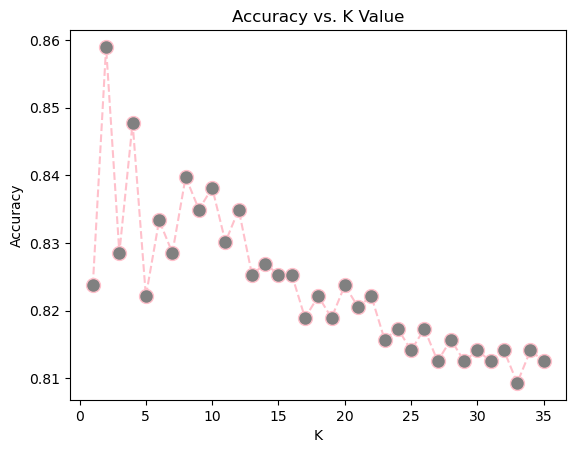

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
print("train shape: " + str(x_train.shape))
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))



import matplotlib.pyplot as plt

#Try a Range of k Values on the Test Set:
score_list = []
for i in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score_list.append(knn.score(x_test, y_test))

plt.plot(range(1,36),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()


In [11]:
# Cross-validation
from sklearn.model_selection import cross_val_score
# List to store average cross-validation scores
cv_scores = []

# Range of k to test for KNN
k_values = range(1, 36)

for k in k_values:
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation
    scores = cross_val_score(knn, x_train, y_train, cv=10)  # Using 10-fold cross-validation

    # Calculate average score
    average_score = np.mean(scores)

    # Append to list
    cv_scores.append(average_score)

# Determine the best K
optimal_k = k_values[np.argmax(cv_scores)]
max_accuracy = max(cv_scores)
print(f"Optimal K: {optimal_k} with accuracy {max_accuracy}")

Optimal K: 8 with accuracy 0.9500876360843836


In [8]:
#normalize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)
x_val_normalized = scaler.transform(x_val)

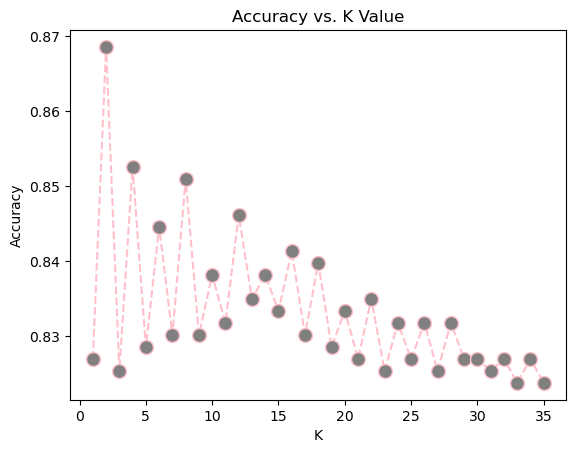

In [12]:
#apply knn on normalized data
score_list = []
for i in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_normalized, y_train)
    score_list.append(knn.score(x_test_normalized, y_test))

plt.plot(range(1,36),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [19]:
best_accuracy = 0
best_k = 0
for k in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_normalized, y_train)
    accuracy = knn.score(x_val_normalized, y_val)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Retrain with best K and evaluate on test set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))
test_accuracy = knn.score(x_test, y_test)

print(f"Best K: {best_k}, Test Set Accuracy: {test_accuracy}")

Best K: 7, Test Set Accuracy: 0.8285256410256411


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(2,36),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
# Create GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train_normalized, y_train)

# Check the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrieve the best estimator
best_model = grid_search.best_estimator_

# Evaluate on the test set
test_accuracy = best_model.score(x_test_normalized, y_test)
print("Test set accuracy:", test_accuracy)
#print(grid_search.cv_results_)

Fitting 5 folds for each of 136 candidates, totalling 680 fits
[CV 2/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.936 total time=   0.2s
[CV 3/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.935 total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.930 total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.933 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.940 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.943 total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.939 total time=   0.3s
[CV 3/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.933 total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.929 total time=   0.3s
[CV 5/5] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.943 t

In [26]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

/Users/zarius/miniconda3/envs/aml-final/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


score on test: 0.844551282051282
score on train: 0.9864061172472387


/Users/zarius/miniconda3/envs/aml-final/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],  # Type of SVM kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
    # Add more parameters here if needed
}

# Create GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train_normalized, y_train)

# Check the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Retrieve the best estimator
best_model = grid_search.best_estimator_

# Evaluate on the test set
test_accuracy = best_model.score(x_test_normalized, y_test)
print("Test set accuracy:", test_accuracy)
print(grid_search.cv_results_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 3/5] END C=0.001, gamma=scale, kernel=linear;, score=0.953 total time=   3.2s
[CV 1/5] END C=0.001, gamma=scale, kernel=linear;, score=0.947 total time=   3.2s
[CV 5/5] END C=0.001, gamma=scale, kernel=linear;, score=0.953 total time=   3.3s
[CV 4/5] END C=0.001, gamma=scale, kernel=linear;, score=0.963 total time=   3.3s
[CV 2/5] END C=0.001, gamma=scale, kernel=linear;, score=0.967 total time=   3.3s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.742 total time=  11.2s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.742 total time=  11.3s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.742 total time=  11.5s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.742 total time=  11.3s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.743 total time=  11.3s
[CV 3/5] END .C=0.001, gamma=scale, kernel=poly;, score=0.742 total time=  11.3s
[CV 1/5] END .C=0.001, gamma=scale, kernel

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))

score on test: 0.8012820512820513
score on train: 1.0


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier())
adb.fit(x_train, y_train)
print("score on test: " + str(adb.score(x_test, y_test)))
print("score on train: "+ str(adb.score(x_train, y_train)))

score on test: 0.8044871794871795
score on train: 1.0


In [24]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier()
rf.fit(x_train_normalized, y_train)
print("score on test: " + str(rf.score(x_test_normalized, y_test)))
print("score on train: "+ str(rf.score(x_train_normalized, y_train)))

score on test: 0.8461538461538461
score on train: 1.0


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)


(4708, 784)
(4708,)
(624, 784)
(624,)
(16, 25676)
(524,)


In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
# split an additional validation dataset
#x_validation=x_train[:1000]
#x_partial_train=x_train[1000:]
#y_validation=y_train[:1000]
#y_partial_train=y_train[1000:]
model=models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_val,y_val))
print("score on test: " + str(model.evaluate(x_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(x_train,y_train)[1]))

Epoch 1/50
148/148 [==============================] - 0s 862us/step - loss: 6.2262 - accuracy: 0.6328 - val_loss: 0.3898 - val_accuracy: 0.8263
Epoch 2/50
148/148 [==============================] - 0s 465us/step - loss: 1.0770 - accuracy: 0.7630 - val_loss: 0.2839 - val_accuracy: 0.8721
Epoch 3/50
148/148 [==============================] - 0s 474us/step - loss: 0.7998 - accuracy: 0.8167 - val_loss: 1.8744 - val_accuracy: 0.7424
Epoch 4/50
148/148 [==============================] - 0s 464us/step - loss: 0.5667 - accuracy: 0.8435 - val_loss: 1.4991 - val_accuracy: 0.4924
Epoch 5/50
148/148 [==============================] - 0s 462us/step - loss: 1.1025 - accuracy: 0.8581 - val_loss: 0.1954 - val_accuracy: 0.9313
Epoch 6/50
148/148 [==============================] - 0s 467us/step - loss: 0.8310 - accuracy: 0.8588 - val_loss: 0.5133 - val_accuracy: 0.8015
Epoch 7/50
148/148 [==============================] - 0s 474us/step - loss: 0.4323 - accuracy: 0.8828 - val_loss: 0.1896 - val_accuracy:

In [11]:
x_train_normalized = x_train_normalized.reshape((-1, 28, 28, 1))
x_val_normalized = x_val_normalized.reshape((-1, 28, 28, 1))
x_test_normalized = x_test_normalized.reshape((-1, 28, 28, 1))


In [62]:
sweep_config = {
    'method': 'bayes',  # Or 'grid', 'random'
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'   
    },
    'parameters': {
        'learning_rate': {
            'min': 0.0001,
            'max': 0.01
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'optimizer': {
            'values': ['adam', 'sgd']
        },
        # Add other hyperparameters here if needed
    }
}

In [63]:
import wandb
from wandb.keras import WandbCallback
import keras
def train():
    # Initialize a new WandB run
    wandb.init()

    # Build and compile your model
    model = models.Sequential()
    # Add convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Adjust input_shape based on your data
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten the output from 2D to 1D
    model.add(layers.Flatten())

    # Add dense layers (fully connected layers)
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification


    # Set the optimizer with the learning rate from the sweep
    if wandb.config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=wandb.config.learning_rate)
    elif wandb.config.optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=wandb.config.learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train_normalized, y_train,
              epochs=10,
              batch_size=wandb.config.batch_size,
              validation_data=(x_val_normalized, y_val),
              callbacks=[WandbCallback()])

    # Save the model at the end of training
    model.save(os.path.join(wandb.run.dir, "model.h5"))

In [64]:
sweep_id = wandb.sweep(sweep_config, project="aml-final", entity="zirui23")
wandb.agent(sweep_id, train)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: oxvidlcv
Sweep URL: https://wandb.ai/zirui23/aml-final/sweeps/oxvidlcv


wandb: Agent Starting Run: pn7zn24u with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.005268990023374713
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: zirui23. Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6687 - accuracy: 0.6283

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.6669 - accuracy: 0.6328 - val_loss: 0.6168 - val_accuracy: 0.7424
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.5766 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.5766 - accuracy: 0.7421 - val_loss: 0.5375 - val_accuracy: 0.7424
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.4939 - accuracy: 0.7445

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 37ms/step - loss: 0.4939 - accuracy: 0.7445 - val_loss: 0.4581 - val_accuracy: 0.7500
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.4124 - accuracy: 0.8168

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 38ms/step - loss: 0.4111 - accuracy: 0.8180 - val_loss: 0.3760 - val_accuracy: 0.8569
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.3309 - accuracy: 0.8846

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.3306 - accuracy: 0.8847 - val_loss: 0.3029 - val_accuracy: 0.9179
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.2682 - accuracy: 0.9116

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.2682 - accuracy: 0.9116 - val_loss: 0.2535 - val_accuracy: 0.9103
Epoch 7/10
72/74 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.9171

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 40ms/step - loss: 0.2304 - accuracy: 0.9169 - val_loss: 0.2298 - val_accuracy: 0.9141
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.2093 - accuracy: 0.9214

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 42ms/step - loss: 0.2084 - accuracy: 0.9220 - val_loss: 0.2103 - val_accuracy: 0.9160
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.1959 - accuracy: 0.9247

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.1956 - accuracy: 0.9246 - val_loss: 0.1998 - val_accuracy: 0.9179
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 0.1868 - accuracy: 0.9267

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123006-pn7zn24u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 37ms/step - loss: 0.1868 - accuracy: 0.9267 - val_loss: 0.1959 - val_accuracy: 0.9198


accuracy,▁▄▄▅▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▅▄▃▂▂▁▁▁
val_accuracy,▁▁▁▆██████
val_loss,█▇▅▄▃▂▂▁▁▁
accuracy,0.92672
best_epoch,9
best_val_loss,0.1959
epoch,9
loss,0.18678
val_accuracy,0.91985


wandb: Agent Starting Run: evtwhv5l with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0002264840226734811
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
144/148 [============================>.] - ETA: 0s - loss: 0.2502 - accuracy: 0.9021

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 15ms/step - loss: 0.2500 - accuracy: 0.9025 - val_loss: 0.1540 - val_accuracy: 0.9408
Epoch 2/10
148/148 [==============================] - ETA: 0s - loss: 0.1378 - accuracy: 0.9471

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.1378 - accuracy: 0.9471 - val_loss: 0.1237 - val_accuracy: 0.9561
Epoch 3/10
145/148 [============================>.] - ETA: 0s - loss: 0.1243 - accuracy: 0.9550

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best)... Done. 0.0s


148/148 [==============================] - 6s 39ms/step - loss: 0.1235 - accuracy: 0.9552 - val_loss: 0.1186 - val_accuracy: 0.9561
Epoch 4/10
148/148 [==============================] - ETA: 0s - loss: 0.1047 - accuracy: 0.9633

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best)... Done. 0.0s


148/148 [==============================] - 5s 33ms/step - loss: 0.1047 - accuracy: 0.9633 - val_loss: 0.1039 - val_accuracy: 0.9561
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.0953 - accuracy: 0.9639

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best)... Done. 0.0s


148/148 [==============================] - 5s 34ms/step - loss: 0.0952 - accuracy: 0.9639 - val_loss: 0.0992 - val_accuracy: 0.9561
Epoch 6/10
145/148 [============================>.] - ETA: 0s - loss: 0.0870 - accuracy: 0.9677

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best)... Done. 0.0s


148/148 [==============================] - 7s 50ms/step - loss: 0.0867 - accuracy: 0.9679 - val_loss: 0.0846 - val_accuracy: 0.9676
Epoch 7/10
144/148 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9716

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.0781 - accuracy: 0.9715 - val_loss: 0.0763 - val_accuracy: 0.9695
Epoch 8/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0727 - accuracy: 0.9758 - val_loss: 0.0791 - val_accuracy: 0.9676
Epoch 9/10
148/148 [==============================] - 3s 18ms/step - loss: 0.0628 - accuracy: 0.9790 - val_loss: 0.0791 - val_accuracy: 0.9676
Epoch 10/10
145/148 [============================>.] - ETA: 0s - loss: 0.0562 - accuracy: 0.9789

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123048-evtwhv5l/files/model-best)... Done. 0.0s


148/148 [==============================] - 5s 31ms/step - loss: 0.0564 - accuracy: 0.9790 - val_loss: 0.0742 - val_accuracy: 0.9733


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▂▁▁
val_accuracy,▁▄▄▄▄▇▇▇▇█
val_loss,█▅▅▄▃▂▁▁▁▁
accuracy,0.97897
best_epoch,9
best_val_loss,0.07417
epoch,9
loss,0.05644
val_accuracy,0.97328


wandb: Agent Starting Run: dc9ws2s8 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0020315037016621277
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
291/295 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7427

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.5327 - accuracy: 0.7419 - val_loss: 0.4653 - val_accuracy: 0.7519
Epoch 2/10
294/295 [============================>.] - ETA: 0s - loss: 0.3846 - accuracy: 0.8567

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.3845 - accuracy: 0.8568 - val_loss: 0.3297 - val_accuracy: 0.9179
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.2675 - accuracy: 0.9203

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2674 - accuracy: 0.9203 - val_loss: 0.2424 - val_accuracy: 0.9160
Epoch 4/10
292/295 [============================>.] - ETA: 0s - loss: 0.2118 - accuracy: 0.9274

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2110 - accuracy: 0.9278 - val_loss: 0.2111 - val_accuracy: 0.9179
Epoch 5/10
295/295 [==============================] - ETA: 0s - loss: 0.1895 - accuracy: 0.9284

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1895 - accuracy: 0.9284 - val_loss: 0.1926 - val_accuracy: 0.9275
Epoch 6/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1775 - accuracy: 0.9329 - val_loss: 0.1947 - val_accuracy: 0.9179
Epoch 7/10
292/295 [============================>.] - ETA: 0s - loss: 0.1711 - accuracy: 0.9326

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1703 - accuracy: 0.9329 - val_loss: 0.1749 - val_accuracy: 0.9294
Epoch 8/10
293/295 [============================>.] - ETA: 0s - loss: 0.1644 - accuracy: 0.9354

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.1638 - accuracy: 0.9356 - val_loss: 0.1720 - val_accuracy: 0.9332
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1583 - accuracy: 0.9373 - val_loss: 0.2129 - val_accuracy: 0.9294
Epoch 10/10
293/295 [============================>.] - ETA: 0s - loss: 0.1550 - accuracy: 0.9401

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123145-dc9ws2s8/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1545 - accuracy: 0.9403 - val_loss: 0.1575 - val_accuracy: 0.9370


accuracy,▁▅▇███████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▁▁▁▁▁
val_accuracy,▁▇▇▇█▇████
val_loss,█▅▃▂▂▂▁▁▂▁
accuracy,0.94031
best_epoch,9
best_val_loss,0.15745
epoch,9
loss,0.15452
val_accuracy,0.93702


wandb: Agent Starting Run: 576prulg with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.000344311826053695
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
144/148 [============================>.] - ETA: 0s - loss: 0.2441 - accuracy: 0.9058

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 16ms/step - loss: 0.2405 - accuracy: 0.9074 - val_loss: 0.1493 - val_accuracy: 0.9427
Epoch 2/10
143/148 [===========================>..] - ETA: 0s - loss: 0.1356 - accuracy: 0.9471

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.1343 - accuracy: 0.9477 - val_loss: 0.1126 - val_accuracy: 0.9618
Epoch 3/10
148/148 [==============================] - 2s 11ms/step - loss: 0.1112 - accuracy: 0.9582 - val_loss: 0.1139 - val_accuracy: 0.9523
Epoch 4/10
147/148 [============================>.] - ETA: 0s - loss: 0.0983 - accuracy: 0.9613

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 22ms/step - loss: 0.0982 - accuracy: 0.9613 - val_loss: 0.0857 - val_accuracy: 0.9637
Epoch 5/10
146/148 [============================>.] - ETA: 0s - loss: 0.0863 - accuracy: 0.9664

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.0860 - accuracy: 0.9664 - val_loss: 0.0804 - val_accuracy: 0.9599
Epoch 6/10
148/148 [==============================] - 3s 18ms/step - loss: 0.0776 - accuracy: 0.9698 - val_loss: 0.0848 - val_accuracy: 0.9656
Epoch 7/10
148/148 [==============================] - 3s 17ms/step - loss: 0.0683 - accuracy: 0.9747 - val_loss: 0.0946 - val_accuracy: 0.9676
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0669 - accuracy: 0.9743 - val_loss: 0.0846 - val_accuracy: 0.9714
Epoch 9/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0526 - accuracy: 0.9813 - val_loss: 0.0824 - val_accuracy: 0.9714
Epoch 10/10
145/148 [============================>.] - ETA: 0s - loss: 0.0479 - accuracy: 0.9825

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123231-576prulg/files/model-best)... Done. 0.0s


148/148 [==============================] - 4s 25ms/step - loss: 0.0475 - accuracy: 0.9828 - val_loss: 0.0761 - val_accuracy: 0.9714


accuracy,▁▅▆▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▂▁▁
val_accuracy,▁▆▃▆▅▇▇███
val_loss,█▄▅▂▁▂▃▂▂▁
accuracy,0.9828
best_epoch,9
best_val_loss,0.07615
epoch,9
loss,0.04755
val_accuracy,0.97137


wandb: Agent Starting Run: yxn5c77o with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00015610019201963682
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8778

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2958 - accuracy: 0.8777 - val_loss: 0.1655 - val_accuracy: 0.9408
Epoch 2/10
146/148 [============================>.] - ETA: 0s - loss: 0.1502 - accuracy: 0.9384

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1495 - accuracy: 0.9388 - val_loss: 0.1357 - val_accuracy: 0.9523
Epoch 3/10
144/148 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9486

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1302 - accuracy: 0.9490 - val_loss: 0.1266 - val_accuracy: 0.9599
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.1208 - accuracy: 0.9517

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 4s 26ms/step - loss: 0.1201 - accuracy: 0.9518 - val_loss: 0.1038 - val_accuracy: 0.9599
Epoch 5/10
144/148 [============================>.] - ETA: 0s - loss: 0.1081 - accuracy: 0.9594

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 4s 24ms/step - loss: 0.1077 - accuracy: 0.9592 - val_loss: 0.0990 - val_accuracy: 0.9637
Epoch 6/10
146/148 [============================>.] - ETA: 0s - loss: 0.0998 - accuracy: 0.9604

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 23ms/step - loss: 0.0994 - accuracy: 0.9605 - val_loss: 0.0880 - val_accuracy: 0.9656
Epoch 7/10
145/148 [============================>.] - ETA: 0s - loss: 0.0932 - accuracy: 0.9651

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 24ms/step - loss: 0.0936 - accuracy: 0.9647 - val_loss: 0.0833 - val_accuracy: 0.9714
Epoch 8/10
145/148 [============================>.] - ETA: 0s - loss: 0.0854 - accuracy: 0.9688

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.0852 - accuracy: 0.9688 - val_loss: 0.0784 - val_accuracy: 0.9714
Epoch 9/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0815 - accuracy: 0.9681 - val_loss: 0.0825 - val_accuracy: 0.9656
Epoch 10/10
147/148 [============================>.] - ETA: 0s - loss: 0.0742 - accuracy: 0.9726

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123312-yxn5c77o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0741 - accuracy: 0.9726 - val_loss: 0.0755 - val_accuracy: 0.9676


accuracy,▁▆▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▂▁▁▁
val_accuracy,▁▄▅▅▆▇██▇▇
val_loss,█▆▅▃▃▂▂▁▂▁
accuracy,0.9726
best_epoch,9
best_val_loss,0.07546
epoch,9
loss,0.07415
val_accuracy,0.96756


wandb: Agent Starting Run: 668lucdm with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.005413358495304686
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
294/295 [============================>.] - ETA: 0s - loss: 0.1926 - accuracy: 0.9256

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1927 - accuracy: 0.9257 - val_loss: 0.1387 - val_accuracy: 0.9504
Epoch 2/10
292/295 [============================>.] - ETA: 0s - loss: 0.1431 - accuracy: 0.9495

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1434 - accuracy: 0.9492 - val_loss: 0.1259 - val_accuracy: 0.9580
Epoch 3/10
295/295 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9562

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1160 - accuracy: 0.9562 - val_loss: 0.0811 - val_accuracy: 0.9733
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0887 - accuracy: 0.9667 - val_loss: 0.0875 - val_accuracy: 0.9695
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0883 - accuracy: 0.9681 - val_loss: 0.1285 - val_accuracy: 0.9542
Epoch 6/10
295/295 [==============================] - 4s 12ms/step - loss: 0.0776 - accuracy: 0.9690 - val_loss: 0.0824 - val_accuracy: 0.9733
Epoch 7/10
295/295 [==============================] - 3s 10ms/step - loss: 0.0724 - accuracy: 0.9730 - val_loss: 0.1109 - val_accuracy: 0.9695
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0658 - accuracy: 0.9756 - val_loss: 0.0959 - val_accuracy: 0.9714
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0553 - accuracy: 0.9796 - val_loss: 0.1142 - val_accuracy: 0.9637
Epoch 10/10
29

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123359-668lucdm/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0614 - accuracy: 0.9768 - val_loss: 0.0805 - val_accuracy: 0.9656


accuracy,▁▄▅▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃█▇▂█▇▇▅▆
val_loss,█▆▁▂▇▁▅▃▅▁
accuracy,0.97685
best_epoch,9
best_val_loss,0.08046
epoch,9
loss,0.06137
val_accuracy,0.96565


wandb: Agent Starting Run: ssmh3hv1 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.006511537813863603
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.2314 - accuracy: 0.9120

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123445-ssmh3hv1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123445-ssmh3hv1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123445-ssmh3hv1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2295 - accuracy: 0.9127 - val_loss: 0.1136 - val_accuracy: 0.9676
Epoch 2/10
74/74 [==============================] - 1s 14ms/step - loss: 0.1197 - accuracy: 0.9550 - val_loss: 0.1188 - val_accuracy: 0.9542
Epoch 3/10
74/74 [==============================] - 1s 13ms/step - loss: 0.1089 - accuracy: 0.9575 - val_loss: 0.1191 - val_accuracy: 0.9542
Epoch 4/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0909 - accuracy: 0.9696 - val_loss: 0.1214 - val_accuracy: 0.9599
Epoch 5/10
71/74 [===========================>..] - ETA: 0s - loss: 0.0830 - accuracy: 0.9681

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123445-ssmh3hv1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123445-ssmh3hv1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123445-ssmh3hv1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.0822 - accuracy: 0.9681 - val_loss: 0.0883 - val_accuracy: 0.9676
Epoch 6/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0661 - accuracy: 0.9766 - val_loss: 0.1000 - val_accuracy: 0.9580
Epoch 7/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0583 - accuracy: 0.9798 - val_loss: 0.0968 - val_accuracy: 0.9618
Epoch 8/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0500 - accuracy: 0.9819 - val_loss: 0.1235 - val_accuracy: 0.9580
Epoch 9/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0526 - accuracy: 0.9811 - val_loss: 0.1182 - val_accuracy: 0.9618
Epoch 10/10
74/74 [==============================] - 2s 28ms/step - loss: 0.0609 - accuracy: 0.9768 - val_loss: 0.0964 - val_accuracy: 0.9714


accuracy,▁▅▆▇▇▇███▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▁▁▁▁
val_accuracy,▆▁▁▃▆▃▄▃▄█
val_loss,▆▇▇█▁▃▃█▇▃
accuracy,0.97685
best_epoch,4
best_val_loss,0.08825
epoch,9
loss,0.06093
val_accuracy,0.97137


wandb: Agent Starting Run: 6d3ynljh with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00259191168599992
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.1818 - accuracy: 0.9260

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.1821 - accuracy: 0.9259 - val_loss: 0.1299 - val_accuracy: 0.9542
Epoch 2/10
144/148 [============================>.] - ETA: 0s - loss: 0.1203 - accuracy: 0.9551

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1204 - accuracy: 0.9550 - val_loss: 0.0868 - val_accuracy: 0.9676
Epoch 3/10
148/148 [==============================] - 2s 13ms/step - loss: 0.1000 - accuracy: 0.9628 - val_loss: 0.1014 - val_accuracy: 0.9561
Epoch 4/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0847 - accuracy: 0.9688 - val_loss: 0.0900 - val_accuracy: 0.9599
Epoch 5/10
144/148 [============================>.] - ETA: 0s - loss: 0.0683 - accuracy: 0.9740

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0683 - accuracy: 0.9737 - val_loss: 0.0737 - val_accuracy: 0.9714
Epoch 6/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0496 - accuracy: 0.9802 - val_loss: 0.0773 - val_accuracy: 0.9676
Epoch 7/10
145/148 [============================>.] - ETA: 0s - loss: 0.0604 - accuracy: 0.9763

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123516-6d3ynljh/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0608 - accuracy: 0.9762 - val_loss: 0.0717 - val_accuracy: 0.9733
Epoch 8/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0439 - accuracy: 0.9828 - val_loss: 0.0789 - val_accuracy: 0.9771
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0359 - accuracy: 0.9873 - val_loss: 0.0749 - val_accuracy: 0.9714
Epoch 10/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0283 - accuracy: 0.9907 - val_loss: 0.1182 - val_accuracy: 0.9656


accuracy,▁▄▅▆▆▇▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▄▃▂▂▂▁▁
val_accuracy,▁▅▂▃▆▅▇█▆▄
val_loss,█▃▅▃▁▂▁▂▁▇
accuracy,0.99065
best_epoch,6
best_val_loss,0.07173
epoch,9
loss,0.02826
val_accuracy,0.96565


wandb: Agent Starting Run: zvpbzg7b with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0035847696768501716
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
291/295 [============================>.] - ETA: 0s - loss: 0.5207 - accuracy: 0.7491

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best)... Done. 0.0s


295/295 [==============================] - 5s 13ms/step - loss: 0.5192 - accuracy: 0.7502 - val_loss: 0.3834 - val_accuracy: 0.8321
Epoch 2/10
291/295 [============================>.] - ETA: 0s - loss: 0.2912 - accuracy: 0.9008

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2907 - accuracy: 0.9008 - val_loss: 0.2275 - val_accuracy: 0.9065
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9262

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2015 - accuracy: 0.9261 - val_loss: 0.1874 - val_accuracy: 0.9275
Epoch 4/10
291/295 [============================>.] - ETA: 0s - loss: 0.1760 - accuracy: 0.9287

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1750 - accuracy: 0.9291 - val_loss: 0.1688 - val_accuracy: 0.9313
Epoch 5/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1635 - accuracy: 0.9352 - val_loss: 0.1692 - val_accuracy: 0.9332
Epoch 6/10
292/295 [============================>.] - ETA: 0s - loss: 0.1563 - accuracy: 0.9358

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1557 - accuracy: 0.9361 - val_loss: 0.1481 - val_accuracy: 0.9370
Epoch 7/10
288/295 [============================>.] - ETA: 0s - loss: 0.1461 - accuracy: 0.9410

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1462 - accuracy: 0.9410 - val_loss: 0.1441 - val_accuracy: 0.9408
Epoch 8/10
289/295 [============================>.] - ETA: 0s - loss: 0.1404 - accuracy: 0.9425

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1394 - accuracy: 0.9435 - val_loss: 0.1435 - val_accuracy: 0.9447
Epoch 9/10
294/295 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9432

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123552-zvpbzg7b/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1354 - accuracy: 0.9431 - val_loss: 0.1286 - val_accuracy: 0.9485
Epoch 10/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1305 - accuracy: 0.9488 - val_loss: 0.1728 - val_accuracy: 0.9332


accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▅▇▇▇▇███▇
val_loss,█▄▃▂▂▂▁▁▁▂
accuracy,0.94881
best_epoch,8
best_val_loss,0.12857
epoch,9
loss,0.1305
val_accuracy,0.93321


wandb: Agent Starting Run: 6njvd81n with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.009789886338752768
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
291/295 [============================>.] - ETA: 0s - loss: 0.2540 - accuracy: 0.9036

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.2533 - accuracy: 0.9036 - val_loss: 0.2198 - val_accuracy: 0.9237
Epoch 2/10
288/295 [============================>.] - ETA: 0s - loss: 0.1701 - accuracy: 0.9405

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1719 - accuracy: 0.9397 - val_loss: 0.1378 - val_accuracy: 0.9485
Epoch 3/10
292/295 [============================>.] - ETA: 0s - loss: 0.1485 - accuracy: 0.9461

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1490 - accuracy: 0.9456 - val_loss: 0.1183 - val_accuracy: 0.9695
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1417 - accuracy: 0.9477 - val_loss: 0.1248 - val_accuracy: 0.9523
Epoch 5/10
291/295 [============================>.] - ETA: 0s - loss: 0.1261 - accuracy: 0.9508

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1256 - accuracy: 0.9514 - val_loss: 0.1115 - val_accuracy: 0.9599
Epoch 6/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1228 - accuracy: 0.9543 - val_loss: 0.1644 - val_accuracy: 0.9542
Epoch 7/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1181 - accuracy: 0.9571 - val_loss: 0.1135 - val_accuracy: 0.9580
Epoch 8/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1088 - accuracy: 0.9596 - val_loss: 0.1734 - val_accuracy: 0.9313
Epoch 9/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1107 - accuracy: 0.9616 - val_loss: 0.1233 - val_accuracy: 0.9618
Epoch 10/10
293/295 [============================>.] - ETA: 0s - loss: 0.0997 - accuracy: 0.9608

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123634-6njvd81n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0993 - accuracy: 0.9609 - val_loss: 0.1074 - val_accuracy: 0.9580


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▁▂▁
val_accuracy,▁▅█▅▇▆▆▂▇▆
val_loss,█▃▂▂▁▅▁▅▂▁
accuracy,0.96092
best_epoch,9
best_val_loss,0.10736
epoch,9
loss,0.0993
val_accuracy,0.95802


wandb: Agent Starting Run: 02tpua1j with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.000627977956185594
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
287/295 [============================>.] - ETA: 0s - loss: 0.6436 - accuracy: 0.7199

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.6423 - accuracy: 0.7211 - val_loss: 0.5988 - val_accuracy: 0.7424
Epoch 2/10
294/295 [============================>.] - ETA: 0s - loss: 0.5593 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.5595 - accuracy: 0.7421 - val_loss: 0.5371 - val_accuracy: 0.7424
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.5080 - accuracy: 0.7423

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.5081 - accuracy: 0.7421 - val_loss: 0.4977 - val_accuracy: 0.7424
Epoch 4/10
291/295 [============================>.] - ETA: 0s - loss: 0.4707 - accuracy: 0.7431

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.4705 - accuracy: 0.7432 - val_loss: 0.4632 - val_accuracy: 0.7443
Epoch 5/10
288/295 [============================>.] - ETA: 0s - loss: 0.4347 - accuracy: 0.7702

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.4356 - accuracy: 0.7698 - val_loss: 0.4282 - val_accuracy: 0.7863
Epoch 6/10
293/295 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8317

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.4000 - accuracy: 0.8320 - val_loss: 0.3917 - val_accuracy: 0.8607
Epoch 7/10
290/295 [============================>.] - ETA: 0s - loss: 0.3641 - accuracy: 0.8718

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.3638 - accuracy: 0.8723 - val_loss: 0.3553 - val_accuracy: 0.8874
Epoch 8/10
288/295 [============================>.] - ETA: 0s - loss: 0.3292 - accuracy: 0.8984

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.3284 - accuracy: 0.8991 - val_loss: 0.3200 - val_accuracy: 0.9046
Epoch 9/10
293/295 [============================>.] - ETA: 0s - loss: 0.2954 - accuracy: 0.9104

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2955 - accuracy: 0.9106 - val_loss: 0.2885 - val_accuracy: 0.9103
Epoch 10/10
293/295 [============================>.] - ETA: 0s - loss: 0.2671 - accuracy: 0.9164

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123715-02tpua1j/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.2670 - accuracy: 0.9165 - val_loss: 0.2626 - val_accuracy: 0.9122


accuracy,▁▂▂▂▃▅▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▅▄▃▃▂▂▁
val_accuracy,▁▁▁▁▃▆▇███
val_loss,█▇▆▅▄▄▃▂▂▁
accuracy,0.91653
best_epoch,9
best_val_loss,0.26259
epoch,9
loss,0.26704
val_accuracy,0.91221


wandb: Agent Starting Run: vq65qgh2 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0034652005569957255
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.6090 - accuracy: 0.7404

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.6064 - accuracy: 0.7411 - val_loss: 0.5607 - val_accuracy: 0.7424
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.5289 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 38ms/step - loss: 0.5289 - accuracy: 0.7421 - val_loss: 0.5127 - val_accuracy: 0.7424
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.4853 - accuracy: 0.7418

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.4850 - accuracy: 0.7421 - val_loss: 0.4750 - val_accuracy: 0.7424
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.4465 - accuracy: 0.7519

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.4465 - accuracy: 0.7519 - val_loss: 0.4371 - val_accuracy: 0.7615
Epoch 5/10
74/74 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.8001

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.4069 - accuracy: 0.8001 - val_loss: 0.3950 - val_accuracy: 0.8168
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.3638 - accuracy: 0.8574

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.3636 - accuracy: 0.8579 - val_loss: 0.3496 - val_accuracy: 0.8760
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.3203 - accuracy: 0.8902

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 40ms/step - loss: 0.3201 - accuracy: 0.8904 - val_loss: 0.3067 - val_accuracy: 0.9084
Epoch 8/10
72/74 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.9091

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.2806 - accuracy: 0.9093 - val_loss: 0.2702 - val_accuracy: 0.9179
Epoch 9/10
74/74 [==============================] - ETA: 0s - loss: 0.2488 - accuracy: 0.9189

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.2488 - accuracy: 0.9189 - val_loss: 0.2422 - val_accuracy: 0.9218
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 0.2255 - accuracy: 0.9246

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123756-vq65qgh2/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 47ms/step - loss: 0.2255 - accuracy: 0.9246 - val_loss: 0.2221 - val_accuracy: 0.9275


accuracy,▁▁▁▁▃▅▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▄▃▂▁▁
val_accuracy,▁▁▁▂▄▆▇███
val_loss,█▇▆▅▅▄▃▂▁▁
accuracy,0.9246
best_epoch,9
best_val_loss,0.22208
epoch,9
loss,0.22555
val_accuracy,0.92748


wandb: Agent Starting Run: 4qrclk4u with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.009071657797279965
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.2144 - accuracy: 0.9133

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.2143 - accuracy: 0.9133 - val_loss: 0.2569 - val_accuracy: 0.8969
Epoch 2/10
145/148 [============================>.] - ETA: 0s - loss: 0.1459 - accuracy: 0.9412

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1450 - accuracy: 0.9416 - val_loss: 0.1257 - val_accuracy: 0.9504
Epoch 3/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1278 - accuracy: 0.9552 - val_loss: 0.1278 - val_accuracy: 0.9523
Epoch 4/10
148/148 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9565

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1098 - accuracy: 0.9565 - val_loss: 0.1062 - val_accuracy: 0.9542
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.1083 - accuracy: 0.9617

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 17ms/step - loss: 0.1085 - accuracy: 0.9616 - val_loss: 0.1003 - val_accuracy: 0.9561
Epoch 6/10
147/148 [============================>.] - ETA: 0s - loss: 0.1039 - accuracy: 0.9596

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.1040 - accuracy: 0.9594 - val_loss: 0.0942 - val_accuracy: 0.9676
Epoch 7/10
148/148 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 0.9656

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123837-4qrclk4u/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.0965 - accuracy: 0.9656 - val_loss: 0.0905 - val_accuracy: 0.9656
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0874 - accuracy: 0.9684 - val_loss: 0.0989 - val_accuracy: 0.9637
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0807 - accuracy: 0.9707 - val_loss: 0.1137 - val_accuracy: 0.9714
Epoch 10/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0860 - accuracy: 0.9686 - val_loss: 0.0940 - val_accuracy: 0.9714


accuracy,▁▄▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▆▆▆▇█▇▇██
val_loss,█▂▃▂▁▁▁▁▂▁
accuracy,0.96856
best_epoch,6
best_val_loss,0.09049
epoch,9
loss,0.08596
val_accuracy,0.97137


wandb: Agent Starting Run: xiu55jlu with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0005976176489076205
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.2503 - accuracy: 0.8972

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2470 - accuracy: 0.8991 - val_loss: 0.1328 - val_accuracy: 0.9599
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9499

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.1297 - accuracy: 0.9503 - val_loss: 0.1035 - val_accuracy: 0.9580
Epoch 3/10
71/74 [===========================>..] - ETA: 0s - loss: 0.1054 - accuracy: 0.9586

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.1057 - accuracy: 0.9588 - val_loss: 0.0890 - val_accuracy: 0.9637
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.0950 - accuracy: 0.9643

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.0950 - accuracy: 0.9643 - val_loss: 0.0846 - val_accuracy: 0.9676
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.0813 - accuracy: 0.9679

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 25ms/step - loss: 0.0812 - accuracy: 0.9677 - val_loss: 0.0793 - val_accuracy: 0.9714
Epoch 6/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0722 - accuracy: 0.9747 - val_loss: 0.0882 - val_accuracy: 0.9695
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9760

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123915-xiu55jlu/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.0632 - accuracy: 0.9760 - val_loss: 0.0689 - val_accuracy: 0.9771
Epoch 8/10
74/74 [==============================] - 1s 20ms/step - loss: 0.0541 - accuracy: 0.9779 - val_loss: 0.0736 - val_accuracy: 0.9676
Epoch 9/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0486 - accuracy: 0.9841 - val_loss: 0.0715 - val_accuracy: 0.9695
Epoch 10/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0370 - accuracy: 0.9890 - val_loss: 0.0809 - val_accuracy: 0.9695


accuracy,▁▅▆▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▂▁▁
val_accuracy,▂▁▃▅▆▅█▅▅▅
val_loss,█▅▃▃▂▃▁▂▁▂
accuracy,0.98895
best_epoch,6
best_val_loss,0.06894
epoch,9
loss,0.03703
val_accuracy,0.96947


wandb: Agent Starting Run: lh01v5c7 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0040291453689442125
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
286/295 [============================>.] - ETA: 0s - loss: 0.5227 - accuracy: 0.7487

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.5183 - accuracy: 0.7508 - val_loss: 0.4264 - val_accuracy: 0.8053
Epoch 2/10
291/295 [============================>.] - ETA: 0s - loss: 0.3202 - accuracy: 0.8840

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.3200 - accuracy: 0.8838 - val_loss: 0.2570 - val_accuracy: 0.9103
Epoch 3/10
288/295 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9260

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.2079 - accuracy: 0.9259 - val_loss: 0.1897 - val_accuracy: 0.9237
Epoch 4/10
294/295 [============================>.] - ETA: 0s - loss: 0.1759 - accuracy: 0.9305

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1766 - accuracy: 0.9303 - val_loss: 0.1815 - val_accuracy: 0.9198
Epoch 5/10
295/295 [==============================] - ETA: 0s - loss: 0.1639 - accuracy: 0.9376

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.1639 - accuracy: 0.9376 - val_loss: 0.1667 - val_accuracy: 0.9332
Epoch 6/10
287/295 [============================>.] - ETA: 0s - loss: 0.1535 - accuracy: 0.9382

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1535 - accuracy: 0.9382 - val_loss: 0.1522 - val_accuracy: 0.9389
Epoch 7/10
287/295 [============================>.] - ETA: 0s - loss: 0.1466 - accuracy: 0.9403

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1454 - accuracy: 0.9410 - val_loss: 0.1397 - val_accuracy: 0.9485
Epoch 8/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1368 - accuracy: 0.9463 - val_loss: 0.1402 - val_accuracy: 0.9408
Epoch 9/10
291/295 [============================>.] - ETA: 0s - loss: 0.1332 - accuracy: 0.9482

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1325 - accuracy: 0.9484 - val_loss: 0.1235 - val_accuracy: 0.9561
Epoch 10/10
291/295 [============================>.] - ETA: 0s - loss: 0.1290 - accuracy: 0.9502

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_123945-lh01v5c7/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1280 - accuracy: 0.9507 - val_loss: 0.1197 - val_accuracy: 0.9561


accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▆▆▆▇▇█▇██
val_loss,█▄▃▂▂▂▁▁▁▁
accuracy,0.95072
best_epoch,9
best_val_loss,0.11973
epoch,9
loss,0.12802
val_accuracy,0.95611


wandb: Agent Starting Run: ir7vr79z with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.009136835805989046
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
285/295 [===========================>..] - ETA: 0s - loss: 0.3843 - accuracy: 0.8436

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.3761 - accuracy: 0.8477 - val_loss: 0.2044 - val_accuracy: 0.9237
Epoch 2/10
290/295 [============================>.] - ETA: 0s - loss: 0.1773 - accuracy: 0.9300

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1768 - accuracy: 0.9301 - val_loss: 0.1654 - val_accuracy: 0.9351
Epoch 3/10
289/295 [============================>.] - ETA: 0s - loss: 0.1529 - accuracy: 0.9399

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.1531 - accuracy: 0.9395 - val_loss: 0.1348 - val_accuracy: 0.9523
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1370 - accuracy: 0.9460 - val_loss: 0.1496 - val_accuracy: 0.9447
Epoch 5/10
289/295 [============================>.] - ETA: 0s - loss: 0.1288 - accuracy: 0.9472

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1280 - accuracy: 0.9480 - val_loss: 0.1179 - val_accuracy: 0.9580
Epoch 6/10
291/295 [============================>.] - ETA: 0s - loss: 0.1170 - accuracy: 0.9534

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1168 - accuracy: 0.9533 - val_loss: 0.1069 - val_accuracy: 0.9618
Epoch 7/10
291/295 [============================>.] - ETA: 0s - loss: 0.1121 - accuracy: 0.9566

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1120 - accuracy: 0.9565 - val_loss: 0.1003 - val_accuracy: 0.9637
Epoch 8/10
292/295 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9593

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1052 - accuracy: 0.9596 - val_loss: 0.0949 - val_accuracy: 0.9733
Epoch 9/10
293/295 [============================>.] - ETA: 0s - loss: 0.1013 - accuracy: 0.9605

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1014 - accuracy: 0.9605 - val_loss: 0.0929 - val_accuracy: 0.9676
Epoch 10/10
292/295 [============================>.] - ETA: 0s - loss: 0.0981 - accuracy: 0.9636

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124026-ir7vr79z/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.0977 - accuracy: 0.9639 - val_loss: 0.0879 - val_accuracy: 0.9752


accuracy,▁▆▇▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▃▅▄▆▆▆█▇█
val_loss,█▆▄▅▃▂▂▁▁▁
accuracy,0.96389
best_epoch,9
best_val_loss,0.08794
epoch,9
loss,0.09772
val_accuracy,0.97519


wandb: Agent Starting Run: nowz4uce with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.004973907479122433
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
293/295 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.9057

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2427 - accuracy: 0.9053 - val_loss: 0.1598 - val_accuracy: 0.9485
Epoch 2/10
292/295 [============================>.] - ETA: 0s - loss: 0.1388 - accuracy: 0.9467

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1384 - accuracy: 0.9469 - val_loss: 0.1274 - val_accuracy: 0.9561
Epoch 3/10
285/295 [===========================>..] - ETA: 0s - loss: 0.1264 - accuracy: 0.9535

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1273 - accuracy: 0.9537 - val_loss: 0.1221 - val_accuracy: 0.9637
Epoch 4/10
289/295 [============================>.] - ETA: 0s - loss: 0.1051 - accuracy: 0.9600

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124107-nowz4uce/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1067 - accuracy: 0.9599 - val_loss: 0.0967 - val_accuracy: 0.9637
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0951 - accuracy: 0.9620 - val_loss: 0.1054 - val_accuracy: 0.9561
Epoch 6/10
295/295 [==============================] - 3s 12ms/step - loss: 0.0933 - accuracy: 0.9645 - val_loss: 0.1149 - val_accuracy: 0.9656
Epoch 7/10
295/295 [==============================] - 4s 12ms/step - loss: 0.1064 - accuracy: 0.9624 - val_loss: 0.1065 - val_accuracy: 0.9676
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0767 - accuracy: 0.9724 - val_loss: 0.0985 - val_accuracy: 0.9656
Epoch 9/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0695 - accuracy: 0.9720 - val_loss: 0.1095 - val_accuracy: 0.9599
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0654 - accuracy: 0.9743 - val_loss: 0.1035 - val_accuracy: 0.9618


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▃▁▁▁
val_accuracy,▁▄▇▇▄▇█▇▅▆
val_loss,█▄▄▁▂▃▂▁▂▂
accuracy,0.9743
best_epoch,3
best_val_loss,0.09665
epoch,9
loss,0.06538
val_accuracy,0.96183


wandb: Agent Starting Run: aeaj5bcr with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.004209179651788947
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
287/295 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9159

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2179 - accuracy: 0.9165 - val_loss: 0.1412 - val_accuracy: 0.9561
Epoch 2/10
295/295 [==============================] - ETA: 0s - loss: 0.1290 - accuracy: 0.9511

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1290 - accuracy: 0.9511 - val_loss: 0.1024 - val_accuracy: 0.9542
Epoch 3/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1049 - accuracy: 0.9607 - val_loss: 0.1570 - val_accuracy: 0.9485
Epoch 4/10
291/295 [============================>.] - ETA: 0s - loss: 0.1042 - accuracy: 0.9596

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best)... Done. 0.0s


295/295 [==============================] - 5s 17ms/step - loss: 0.1035 - accuracy: 0.9599 - val_loss: 0.0828 - val_accuracy: 0.9714
Epoch 5/10
295/295 [==============================] - 3s 11ms/step - loss: 0.0927 - accuracy: 0.9709 - val_loss: 0.1021 - val_accuracy: 0.9618
Epoch 6/10
292/295 [============================>.] - ETA: 0s - loss: 0.0805 - accuracy: 0.9722

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 12ms/step - loss: 0.0805 - accuracy: 0.9722 - val_loss: 0.0783 - val_accuracy: 0.9733
Epoch 7/10
295/295 [==============================] - 3s 11ms/step - loss: 0.0701 - accuracy: 0.9754 - val_loss: 0.0949 - val_accuracy: 0.9752
Epoch 8/10
293/295 [============================>.] - ETA: 0s - loss: 0.0665 - accuracy: 0.9738

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124149-aeaj5bcr/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 15ms/step - loss: 0.0663 - accuracy: 0.9739 - val_loss: 0.0686 - val_accuracy: 0.9771
Epoch 9/10
295/295 [==============================] - 4s 14ms/step - loss: 0.0599 - accuracy: 0.9785 - val_loss: 0.0897 - val_accuracy: 0.9714
Epoch 10/10
295/295 [==============================] - 3s 11ms/step - loss: 0.0478 - accuracy: 0.9828 - val_loss: 0.1333 - val_accuracy: 0.9656


accuracy,▁▅▆▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▃▂▂▂▁▁
val_accuracy,▃▂▁▇▄▇██▇▅
val_loss,▇▄█▂▄▂▃▁▃▆
accuracy,0.9828
best_epoch,7
best_val_loss,0.06859
epoch,9
loss,0.04779
val_accuracy,0.96565


wandb: Agent Starting Run: 8a05o1s1 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0035960762127628283
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
145/148 [============================>.] - ETA: 0s - loss: 0.5959 - accuracy: 0.7328

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.5945 - accuracy: 0.7332 - val_loss: 0.5219 - val_accuracy: 0.7424
Epoch 2/10
146/148 [============================>.] - ETA: 0s - loss: 0.4659 - accuracy: 0.7524

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.4652 - accuracy: 0.7530 - val_loss: 0.4270 - val_accuracy: 0.7805
Epoch 3/10
146/148 [============================>.] - ETA: 0s - loss: 0.3645 - accuracy: 0.8641

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 22ms/step - loss: 0.3644 - accuracy: 0.8636 - val_loss: 0.3190 - val_accuracy: 0.8989
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.2679 - accuracy: 0.9175

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.2670 - accuracy: 0.9178 - val_loss: 0.2371 - val_accuracy: 0.9198
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.2093 - accuracy: 0.9296

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.2092 - accuracy: 0.9297 - val_loss: 0.1981 - val_accuracy: 0.9313
Epoch 6/10
144/148 [============================>.] - ETA: 0s - loss: 0.1851 - accuracy: 0.9299

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 17ms/step - loss: 0.1831 - accuracy: 0.9312 - val_loss: 0.1842 - val_accuracy: 0.9294
Epoch 7/10
145/148 [============================>.] - ETA: 0s - loss: 0.1718 - accuracy: 0.9330

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.1710 - accuracy: 0.9335 - val_loss: 0.1722 - val_accuracy: 0.9351
Epoch 8/10
146/148 [============================>.] - ETA: 0s - loss: 0.1638 - accuracy: 0.9356

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1633 - accuracy: 0.9361 - val_loss: 0.1645 - val_accuracy: 0.9466
Epoch 9/10
148/148 [==============================] - 2s 12ms/step - loss: 0.1572 - accuracy: 0.9356 - val_loss: 0.1676 - val_accuracy: 0.9427
Epoch 10/10
145/148 [============================>.] - ETA: 0s - loss: 0.1534 - accuracy: 0.9384

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124236-8a05o1s1/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1535 - accuracy: 0.9382 - val_loss: 0.1516 - val_accuracy: 0.9485


accuracy,▁▂▅▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▁▁▁▁▁
val_accuracy,▁▂▆▇▇▇████
val_loss,█▆▄▃▂▂▁▁▁▁
accuracy,0.93819
best_epoch,9
best_val_loss,0.15163
epoch,9
loss,0.15351
val_accuracy,0.94847


wandb: Agent Starting Run: q058eor1 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.005801335414105
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
72/74 [============================>.] - ETA: 0s - loss: 0.2260 - accuracy: 0.9062

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2263 - accuracy: 0.9061 - val_loss: 0.1879 - val_accuracy: 0.9294
Epoch 2/10
72/74 [============================>.] - ETA: 0s - loss: 0.1326 - accuracy: 0.9505

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 24ms/step - loss: 0.1312 - accuracy: 0.9511 - val_loss: 0.1076 - val_accuracy: 0.9618
Epoch 3/10
74/74 [==============================] - 1s 18ms/step - loss: 0.1087 - accuracy: 0.9639 - val_loss: 0.1097 - val_accuracy: 0.9599
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.0863 - accuracy: 0.9654

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.0863 - accuracy: 0.9654 - val_loss: 0.0949 - val_accuracy: 0.9656
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.0825 - accuracy: 0.9701

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124317-q058eor1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.0823 - accuracy: 0.9703 - val_loss: 0.0835 - val_accuracy: 0.9656
Epoch 6/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0737 - accuracy: 0.9720 - val_loss: 0.1026 - val_accuracy: 0.9676
Epoch 7/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0647 - accuracy: 0.9790 - val_loss: 0.1204 - val_accuracy: 0.9580
Epoch 8/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0552 - accuracy: 0.9809 - val_loss: 0.0929 - val_accuracy: 0.9695
Epoch 9/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0725 - accuracy: 0.9741 - val_loss: 0.0884 - val_accuracy: 0.9695
Epoch 10/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0524 - accuracy: 0.9813 - val_loss: 0.0868 - val_accuracy: 0.9695


accuracy,▁▅▆▇▇▇██▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▂▁
val_accuracy,▁▇▆▇▇█▆███
val_loss,█▃▃▂▁▂▃▂▁▁
accuracy,0.98131
best_epoch,4
best_val_loss,0.08348
epoch,9
loss,0.05243
val_accuracy,0.96947


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rkdexk2u with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.008268792859772327
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.3173 - accuracy: 0.8887

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.3166 - accuracy: 0.8887 - val_loss: 0.2473 - val_accuracy: 0.9256
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.1437 - accuracy: 0.9435

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best)... Done. 0.0s


74/74 [==============================] - 4s 48ms/step - loss: 0.1445 - accuracy: 0.9433 - val_loss: 0.1505 - val_accuracy: 0.9542
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.1228 - accuracy: 0.9528

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 37ms/step - loss: 0.1228 - accuracy: 0.9528 - val_loss: 0.1210 - val_accuracy: 0.9561
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.1136 - accuracy: 0.9566

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 38ms/step - loss: 0.1125 - accuracy: 0.9573 - val_loss: 0.0940 - val_accuracy: 0.9695
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.0869 - accuracy: 0.9677

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best)... Done. 0.0s


74/74 [==============================] - 4s 56ms/step - loss: 0.0873 - accuracy: 0.9673 - val_loss: 0.0897 - val_accuracy: 0.9695
Epoch 6/10
74/74 [==============================] - 2s 30ms/step - loss: 0.0853 - accuracy: 0.9641 - val_loss: 0.1165 - val_accuracy: 0.9580
Epoch 7/10
74/74 [==============================] - 2s 28ms/step - loss: 0.0933 - accuracy: 0.9618 - val_loss: 0.1032 - val_accuracy: 0.9656
Epoch 8/10
74/74 [==============================] - 2s 30ms/step - loss: 0.0681 - accuracy: 0.9764 - val_loss: 0.1075 - val_accuracy: 0.9637
Epoch 9/10
72/74 [============================>.] - ETA: 0s - loss: 0.0716 - accuracy: 0.9729

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124358-rkdexk2u/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.0743 - accuracy: 0.9715 - val_loss: 0.0879 - val_accuracy: 0.9599
Epoch 10/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0652 - accuracy: 0.9758 - val_loss: 0.0941 - val_accuracy: 0.9656


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▂▁▁▁
val_accuracy,▁▆▆██▆▇▇▆▇
val_loss,█▄▂▁▁▂▂▂▁▁
accuracy,0.97579
best_epoch,8
best_val_loss,0.08793
epoch,9
loss,0.06522
val_accuracy,0.96565


wandb: Agent Starting Run: omzxsxu5 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0069284531199668735
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7479

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.5413 - accuracy: 0.7479 - val_loss: 0.4414 - val_accuracy: 0.8034
Epoch 2/10
144/148 [============================>.] - ETA: 0s - loss: 0.3375 - accuracy: 0.8780

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.3364 - accuracy: 0.8785 - val_loss: 0.2623 - val_accuracy: 0.9084
Epoch 3/10
145/148 [============================>.] - ETA: 0s - loss: 0.2198 - accuracy: 0.9222

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 17ms/step - loss: 0.2197 - accuracy: 0.9223 - val_loss: 0.1992 - val_accuracy: 0.9198
Epoch 4/10
148/148 [==============================] - ETA: 0s - loss: 0.1866 - accuracy: 0.9282

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 17ms/step - loss: 0.1866 - accuracy: 0.9282 - val_loss: 0.1828 - val_accuracy: 0.9294
Epoch 5/10
145/148 [============================>.] - ETA: 0s - loss: 0.1723 - accuracy: 0.9308

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 17ms/step - loss: 0.1717 - accuracy: 0.9308 - val_loss: 0.1694 - val_accuracy: 0.9313
Epoch 6/10
145/148 [============================>.] - ETA: 0s - loss: 0.1603 - accuracy: 0.9371

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1605 - accuracy: 0.9367 - val_loss: 0.1575 - val_accuracy: 0.9447
Epoch 7/10
145/148 [============================>.] - ETA: 0s - loss: 0.1533 - accuracy: 0.9392

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1525 - accuracy: 0.9397 - val_loss: 0.1487 - val_accuracy: 0.9485
Epoch 8/10
148/148 [==============================] - 2s 11ms/step - loss: 0.1427 - accuracy: 0.9422 - val_loss: 0.2659 - val_accuracy: 0.8779
Epoch 9/10
144/148 [============================>.] - ETA: 0s - loss: 0.1394 - accuracy: 0.9438

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124440-omzxsxu5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1390 - accuracy: 0.9437 - val_loss: 0.1342 - val_accuracy: 0.9504
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1332 - accuracy: 0.9467 - val_loss: 0.1633 - val_accuracy: 0.9408


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▆▇▇▇██▅██
val_loss,█▄▂▂▂▂▁▄▁▂
accuracy,0.94669
best_epoch,8
best_val_loss,0.13422
epoch,9
loss,0.13316
val_accuracy,0.94084


wandb: Agent Starting Run: r1mx9379 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.004652813401051497
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.2019 - accuracy: 0.9241

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.1997 - accuracy: 0.9246 - val_loss: 0.1060 - val_accuracy: 0.9599
Epoch 2/10
71/74 [===========================>..] - ETA: 0s - loss: 0.1109 - accuracy: 0.9593

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.1119 - accuracy: 0.9588 - val_loss: 0.0888 - val_accuracy: 0.9599
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.0997 - accuracy: 0.9610

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.0997 - accuracy: 0.9611 - val_loss: 0.0859 - val_accuracy: 0.9656
Epoch 4/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0830 - accuracy: 0.9696 - val_loss: 0.1008 - val_accuracy: 0.9656
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.0664 - accuracy: 0.9767

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.0664 - accuracy: 0.9764 - val_loss: 0.0853 - val_accuracy: 0.9733
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9809

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124521-r1mx9379/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.0541 - accuracy: 0.9809 - val_loss: 0.0637 - val_accuracy: 0.9733
Epoch 7/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0450 - accuracy: 0.9815 - val_loss: 0.1368 - val_accuracy: 0.9599
Epoch 8/10
74/74 [==============================] - 2s 31ms/step - loss: 0.0473 - accuracy: 0.9839 - val_loss: 0.0932 - val_accuracy: 0.9714
Epoch 9/10
74/74 [==============================] - 3s 36ms/step - loss: 0.0497 - accuracy: 0.9811 - val_loss: 0.0904 - val_accuracy: 0.9656
Epoch 10/10
74/74 [==============================] - 2s 32ms/step - loss: 0.0390 - accuracy: 0.9864 - val_loss: 0.1073 - val_accuracy: 0.9714


accuracy,▁▅▅▆▇▇▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▂▂▁▁▁▁
val_accuracy,▁▁▄▄██▁▇▄▇
val_loss,▅▃▃▅▃▁█▄▄▅
accuracy,0.98641
best_epoch,5
best_val_loss,0.06365
epoch,9
loss,0.03902
val_accuracy,0.97137


wandb: Agent Starting Run: i23b9gx5 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0013890184207942914
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.6658 - accuracy: 0.7076

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.6657 - accuracy: 0.7075 - val_loss: 0.6402 - val_accuracy: 0.7443
Epoch 2/10
72/74 [============================>.] - ETA: 0s - loss: 0.6162 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.6157 - accuracy: 0.7426 - val_loss: 0.5948 - val_accuracy: 0.7424
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.5734 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 37ms/step - loss: 0.5734 - accuracy: 0.7421 - val_loss: 0.5569 - val_accuracy: 0.7424
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.5380 - accuracy: 0.7415

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.5373 - accuracy: 0.7421 - val_loss: 0.5245 - val_accuracy: 0.7424
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.5068 - accuracy: 0.7411

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 37ms/step - loss: 0.5056 - accuracy: 0.7424 - val_loss: 0.4958 - val_accuracy: 0.7424
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.4770 - accuracy: 0.7517

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.4770 - accuracy: 0.7517 - val_loss: 0.4698 - val_accuracy: 0.7615
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.7853

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.4505 - accuracy: 0.7857 - val_loss: 0.4447 - val_accuracy: 0.7958
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.4251 - accuracy: 0.8230

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 4s 50ms/step - loss: 0.4247 - accuracy: 0.8233 - val_loss: 0.4195 - val_accuracy: 0.8302
Epoch 9/10
74/74 [==============================] - ETA: 0s - loss: 0.3990 - accuracy: 0.8447

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 45ms/step - loss: 0.3990 - accuracy: 0.8447 - val_loss: 0.3944 - val_accuracy: 0.8626
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.8670

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124557-i23b9gx5/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.3739 - accuracy: 0.8670 - val_loss: 0.3699 - val_accuracy: 0.8817


accuracy,▁▃▃▃▃▃▄▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▁▁▁▁▂▄▅▇█
val_loss,█▇▆▅▄▄▃▂▂▁
accuracy,0.86703
best_epoch,9
best_val_loss,0.36985
epoch,9
loss,0.37394
val_accuracy,0.88168


wandb: Agent Starting Run: ib5byntc with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.006409264413653356
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
145/148 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9207

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2040 - accuracy: 0.9216 - val_loss: 0.2353 - val_accuracy: 0.9084
Epoch 2/10
144/148 [============================>.] - ETA: 0s - loss: 0.1377 - accuracy: 0.9501

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1373 - accuracy: 0.9501 - val_loss: 0.1023 - val_accuracy: 0.9676
Epoch 3/10
143/148 [===========================>..] - ETA: 0s - loss: 0.1097 - accuracy: 0.9580

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1100 - accuracy: 0.9584 - val_loss: 0.0922 - val_accuracy: 0.9656
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.0923 - accuracy: 0.9677

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.0916 - accuracy: 0.9679 - val_loss: 0.0911 - val_accuracy: 0.9714
Epoch 5/10
146/148 [============================>.] - ETA: 0s - loss: 0.0858 - accuracy: 0.9692

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.0855 - accuracy: 0.9694 - val_loss: 0.0842 - val_accuracy: 0.9676
Epoch 6/10
145/148 [============================>.] - ETA: 0s - loss: 0.0755 - accuracy: 0.9709

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124644-ib5byntc/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0753 - accuracy: 0.9711 - val_loss: 0.0806 - val_accuracy: 0.9695
Epoch 7/10
148/148 [==============================] - 2s 11ms/step - loss: 0.0720 - accuracy: 0.9764 - val_loss: 0.2329 - val_accuracy: 0.9466
Epoch 8/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0733 - accuracy: 0.9722 - val_loss: 0.1376 - val_accuracy: 0.9561
Epoch 9/10
148/148 [==============================] - 2s 12ms/step - loss: 0.0629 - accuracy: 0.9775 - val_loss: 0.1210 - val_accuracy: 0.9580
Epoch 10/10
148/148 [==============================] - 2s 12ms/step - loss: 0.0544 - accuracy: 0.9807 - val_loss: 0.0927 - val_accuracy: 0.9542


accuracy,▁▄▅▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▂▂▁▁
val_accuracy,▁█▇███▅▆▇▆
val_loss,█▂▂▁▁▁█▄▃▂
accuracy,0.98067
best_epoch,5
best_val_loss,0.08061
epoch,9
loss,0.05441
val_accuracy,0.9542


wandb: Agent Starting Run: vp2r01ls with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.009235540569450851
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
291/295 [============================>.] - ETA: 0s - loss: 0.3665 - accuracy: 0.8460

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.3654 - accuracy: 0.8464 - val_loss: 0.2368 - val_accuracy: 0.8931
Epoch 2/10
290/295 [============================>.] - ETA: 0s - loss: 0.1861 - accuracy: 0.9250

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1866 - accuracy: 0.9246 - val_loss: 0.2066 - val_accuracy: 0.9141
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.1583 - accuracy: 0.9371

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1582 - accuracy: 0.9371 - val_loss: 0.1429 - val_accuracy: 0.9408
Epoch 4/10
292/295 [============================>.] - ETA: 0s - loss: 0.1421 - accuracy: 0.9441

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1419 - accuracy: 0.9444 - val_loss: 0.1314 - val_accuracy: 0.9523
Epoch 5/10
288/295 [============================>.] - ETA: 0s - loss: 0.1335 - accuracy: 0.9470

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1327 - accuracy: 0.9475 - val_loss: 0.1149 - val_accuracy: 0.9561
Epoch 6/10
290/295 [============================>.] - ETA: 0s - loss: 0.1229 - accuracy: 0.9526

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1226 - accuracy: 0.9528 - val_loss: 0.1073 - val_accuracy: 0.9618
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1134 - accuracy: 0.9577 - val_loss: 0.1075 - val_accuracy: 0.9580
Epoch 8/10
295/295 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9575

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1090 - accuracy: 0.9575 - val_loss: 0.1014 - val_accuracy: 0.9618
Epoch 9/10
293/295 [============================>.] - ETA: 0s - loss: 0.1050 - accuracy: 0.9601

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124720-vp2r01ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1048 - accuracy: 0.9601 - val_loss: 0.0995 - val_accuracy: 0.9618
Epoch 10/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0974 - accuracy: 0.9643 - val_loss: 0.1093 - val_accuracy: 0.9561


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▃▆▇▇████▇
val_loss,█▆▃▃▂▁▁▁▁▂
accuracy,0.96432
best_epoch,8
best_val_loss,0.09947
epoch,9
loss,0.09744
val_accuracy,0.95611


wandb: Agent Starting Run: tt5bfuy3 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.007910744568490901
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
291/295 [============================>.] - ETA: 0s - loss: 0.4363 - accuracy: 0.8076

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.4340 - accuracy: 0.8088 - val_loss: 0.2814 - val_accuracy: 0.8989
Epoch 2/10
294/295 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9275

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.1958 - accuracy: 0.9274 - val_loss: 0.1987 - val_accuracy: 0.9218
Epoch 3/10
287/295 [============================>.] - ETA: 0s - loss: 0.1639 - accuracy: 0.9347

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1634 - accuracy: 0.9352 - val_loss: 0.1539 - val_accuracy: 0.9408
Epoch 4/10
289/295 [============================>.] - ETA: 0s - loss: 0.1516 - accuracy: 0.9403

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1510 - accuracy: 0.9405 - val_loss: 0.1494 - val_accuracy: 0.9485
Epoch 5/10
294/295 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9447

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1357 - accuracy: 0.9448 - val_loss: 0.1286 - val_accuracy: 0.9523
Epoch 6/10
290/295 [============================>.] - ETA: 0s - loss: 0.1293 - accuracy: 0.9483

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1287 - accuracy: 0.9484 - val_loss: 0.1171 - val_accuracy: 0.9542
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1206 - accuracy: 0.9535 - val_loss: 0.1465 - val_accuracy: 0.9389
Epoch 8/10
288/295 [============================>.] - ETA: 0s - loss: 0.1162 - accuracy: 0.9542

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1166 - accuracy: 0.9548 - val_loss: 0.1059 - val_accuracy: 0.9599
Epoch 9/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1100 - accuracy: 0.9599 - val_loss: 0.1071 - val_accuracy: 0.9580
Epoch 10/10
287/295 [============================>.] - ETA: 0s - loss: 0.1067 - accuracy: 0.9593

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124802-tt5bfuy3/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1062 - accuracy: 0.9596 - val_loss: 0.1018 - val_accuracy: 0.9656


accuracy,▁▆▇▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▃▅▆▇▇▅▇▇█
val_loss,█▅▃▃▂▂▃▁▁▁
accuracy,0.95964
best_epoch,9
best_val_loss,0.10178
epoch,9
loss,0.10624
val_accuracy,0.96565


wandb: Agent Starting Run: y5qswuqf with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.006304480148910312
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.2506 - accuracy: 0.8987

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.2506 - accuracy: 0.8987 - val_loss: 0.1795 - val_accuracy: 0.9294
Epoch 2/10
71/74 [===========================>..] - ETA: 0s - loss: 0.1430 - accuracy: 0.9478

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.1396 - accuracy: 0.9490 - val_loss: 0.1329 - val_accuracy: 0.9542
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.1074 - accuracy: 0.9588

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.1071 - accuracy: 0.9586 - val_loss: 0.1102 - val_accuracy: 0.9599
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.0933 - accuracy: 0.9685

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.0932 - accuracy: 0.9688 - val_loss: 0.0970 - val_accuracy: 0.9618
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.0799 - accuracy: 0.9726

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.0798 - accuracy: 0.9724 - val_loss: 0.0893 - val_accuracy: 0.9618
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.0657 - accuracy: 0.9740

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.0654 - accuracy: 0.9739 - val_loss: 0.0835 - val_accuracy: 0.9695
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9773

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124838-y5qswuqf/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.0573 - accuracy: 0.9773 - val_loss: 0.0656 - val_accuracy: 0.9752
Epoch 8/10
74/74 [==============================] - 1s 20ms/step - loss: 0.0583 - accuracy: 0.9781 - val_loss: 0.0746 - val_accuracy: 0.9752
Epoch 9/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0433 - accuracy: 0.9828 - val_loss: 0.1813 - val_accuracy: 0.9466
Epoch 10/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0746 - accuracy: 0.9728 - val_loss: 0.0892 - val_accuracy: 0.9752


accuracy,▁▅▆▇▇▇███▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▁▂▁▂
val_accuracy,▁▅▆▆▆▇██▄█
val_loss,█▅▄▃▂▂▁▂█▂
accuracy,0.97281
best_epoch,6
best_val_loss,0.06557
epoch,9
loss,0.07456
val_accuracy,0.97519


wandb: Agent Starting Run: un06eldh with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0053071848686947615
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
143/148 [===========================>..] - ETA: 0s - loss: 0.2002 - accuracy: 0.9198

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2012 - accuracy: 0.9199 - val_loss: 0.1302 - val_accuracy: 0.9561
Epoch 2/10
142/148 [===========================>..] - ETA: 0s - loss: 0.1273 - accuracy: 0.9549

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1270 - accuracy: 0.9548 - val_loss: 0.0893 - val_accuracy: 0.9637
Epoch 3/10
143/148 [===========================>..] - ETA: 0s - loss: 0.1060 - accuracy: 0.9620

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1050 - accuracy: 0.9624 - val_loss: 0.0824 - val_accuracy: 0.9733
Epoch 4/10
148/148 [==============================] - 1s 9ms/step - loss: 0.0889 - accuracy: 0.9675 - val_loss: 0.0867 - val_accuracy: 0.9695
Epoch 5/10
145/148 [============================>.] - ETA: 0s - loss: 0.0724 - accuracy: 0.9737

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 17ms/step - loss: 0.0717 - accuracy: 0.9739 - val_loss: 0.0750 - val_accuracy: 0.9771
Epoch 6/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0653 - accuracy: 0.9766 - val_loss: 0.1561 - val_accuracy: 0.9370
Epoch 7/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0709 - accuracy: 0.9749 - val_loss: 0.1017 - val_accuracy: 0.9656
Epoch 8/10
147/148 [============================>.] - ETA: 0s - loss: 0.0502 - accuracy: 0.9800

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124914-un06eldh/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0502 - accuracy: 0.9800 - val_loss: 0.0715 - val_accuracy: 0.9809
Epoch 9/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0427 - accuracy: 0.9862 - val_loss: 0.1091 - val_accuracy: 0.9618
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0555 - accuracy: 0.9792 - val_loss: 0.1452 - val_accuracy: 0.9542


accuracy,▁▅▅▆▇▇▇▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▂▁▁▂
val_accuracy,▄▅▇▆▇▁▆█▅▄
val_loss,▆▂▂▂▁█▃▁▄▇
accuracy,0.97918
best_epoch,7
best_val_loss,0.07146
epoch,9
loss,0.05548
val_accuracy,0.9542


wandb: Agent Starting Run: toabj9xl with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0016600763356141729
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.6412 - accuracy: 0.7093

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.6410 - accuracy: 0.7096 - val_loss: 0.6014 - val_accuracy: 0.7424
Epoch 2/10
72/74 [============================>.] - ETA: 0s - loss: 0.5730 - accuracy: 0.7402

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.5713 - accuracy: 0.7421 - val_loss: 0.5493 - val_accuracy: 0.7424
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.5301 - accuracy: 0.7414

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.5294 - accuracy: 0.7421 - val_loss: 0.5183 - val_accuracy: 0.7424
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.5011 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.5008 - accuracy: 0.7421 - val_loss: 0.4944 - val_accuracy: 0.7424
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.4759 - accuracy: 0.7446

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.4760 - accuracy: 0.7438 - val_loss: 0.4712 - val_accuracy: 0.7481
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.4522 - accuracy: 0.7637

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.4514 - accuracy: 0.7644 - val_loss: 0.4471 - val_accuracy: 0.7824
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.8056

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.4265 - accuracy: 0.8056 - val_loss: 0.4218 - val_accuracy: 0.8111
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8369

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.4007 - accuracy: 0.8373 - val_loss: 0.3953 - val_accuracy: 0.8531
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8581

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.3745 - accuracy: 0.8579 - val_loss: 0.3687 - val_accuracy: 0.8798
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.3489 - accuracy: 0.8778

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_124950-toabj9xl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.3488 - accuracy: 0.8781 - val_loss: 0.3428 - val_accuracy: 0.8912


accuracy,▁▂▂▂▂▃▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▅▄▃▃▂▂▁
val_accuracy,▁▁▁▁▁▃▄▆▇█
val_loss,█▇▆▅▄▄▃▂▂▁
accuracy,0.87808
best_epoch,9
best_val_loss,0.3428
epoch,9
loss,0.34878
val_accuracy,0.89122


wandb: Agent Starting Run: 7f8txaky with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0021489448039526643
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.6628 - accuracy: 0.6275

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.6600 - accuracy: 0.6325 - val_loss: 0.6040 - val_accuracy: 0.7424
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.5748 - accuracy: 0.7417

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.5742 - accuracy: 0.7421 - val_loss: 0.5455 - val_accuracy: 0.7424
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.5177 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 20ms/step - loss: 0.5177 - accuracy: 0.7421 - val_loss: 0.4966 - val_accuracy: 0.7424
Epoch 4/10
71/74 [===========================>..] - ETA: 0s - loss: 0.4698 - accuracy: 0.7588

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.4681 - accuracy: 0.7608 - val_loss: 0.4522 - val_accuracy: 0.7729
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.4231 - accuracy: 0.8116

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 25ms/step - loss: 0.4235 - accuracy: 0.8116 - val_loss: 0.4111 - val_accuracy: 0.8378
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.3826 - accuracy: 0.8570

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.3821 - accuracy: 0.8573 - val_loss: 0.3714 - val_accuracy: 0.8798
Epoch 7/10
72/74 [============================>.] - ETA: 0s - loss: 0.3435 - accuracy: 0.8824

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.3433 - accuracy: 0.8823 - val_loss: 0.3349 - val_accuracy: 0.8931
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8994

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.3090 - accuracy: 0.8993 - val_loss: 0.3024 - val_accuracy: 0.9008
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.2803 - accuracy: 0.9077

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.2802 - accuracy: 0.9080 - val_loss: 0.2768 - val_accuracy: 0.9198
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.2569 - accuracy: 0.9140

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125026-7f8txaky/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.2572 - accuracy: 0.9136 - val_loss: 0.2564 - val_accuracy: 0.9160


accuracy,▁▄▄▄▅▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▁▁▂▅▆▇▇██
val_loss,█▇▆▅▄▃▃▂▁▁
accuracy,0.91355
best_epoch,9
best_val_loss,0.25638
epoch,9
loss,0.25723
val_accuracy,0.91603


wandb: Agent Starting Run: 3mna40p4 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.005976529794379204
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
293/295 [============================>.] - ETA: 0s - loss: 0.4180 - accuracy: 0.8264

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.4170 - accuracy: 0.8269 - val_loss: 0.2447 - val_accuracy: 0.9160
Epoch 2/10
288/295 [============================>.] - ETA: 0s - loss: 0.2031 - accuracy: 0.9236

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.2019 - accuracy: 0.9240 - val_loss: 0.2240 - val_accuracy: 0.9179
Epoch 3/10
292/295 [============================>.] - ETA: 0s - loss: 0.1702 - accuracy: 0.9313

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.1707 - accuracy: 0.9310 - val_loss: 0.2016 - val_accuracy: 0.9256
Epoch 4/10
285/295 [===========================>..] - ETA: 0s - loss: 0.1545 - accuracy: 0.9368

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1543 - accuracy: 0.9373 - val_loss: 0.1631 - val_accuracy: 0.9389
Epoch 5/10
293/295 [============================>.] - ETA: 0s - loss: 0.1417 - accuracy: 0.9420

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1414 - accuracy: 0.9420 - val_loss: 0.1344 - val_accuracy: 0.9447
Epoch 6/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1340 - accuracy: 0.9484 - val_loss: 0.1435 - val_accuracy: 0.9447
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1256 - accuracy: 0.9497 - val_loss: 0.1418 - val_accuracy: 0.9485
Epoch 8/10
293/295 [============================>.] - ETA: 0s - loss: 0.1209 - accuracy: 0.9524

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1210 - accuracy: 0.9522 - val_loss: 0.1134 - val_accuracy: 0.9618
Epoch 9/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1169 - accuracy: 0.9554 - val_loss: 0.1171 - val_accuracy: 0.9580
Epoch 10/10
289/295 [============================>.] - ETA: 0s - loss: 0.1112 - accuracy: 0.9572

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125103-3mna40p4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1115 - accuracy: 0.9577 - val_loss: 0.1043 - val_accuracy: 0.9637


accuracy,▁▆▇▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▁▂▄▅▅▆█▇█
val_loss,█▇▆▄▂▃▃▁▂▁
accuracy,0.95773
best_epoch,9
best_val_loss,0.10432
epoch,9
loss,0.1115
val_accuracy,0.96374


wandb: Agent Starting Run: 421l0f2s with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0018670970176424008
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.2225 - accuracy: 0.9100

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.2205 - accuracy: 0.9110 - val_loss: 0.1238 - val_accuracy: 0.9580
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.1214 - accuracy: 0.9545

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.1214 - accuracy: 0.9545 - val_loss: 0.0956 - val_accuracy: 0.9733
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.1057 - accuracy: 0.9606

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.1056 - accuracy: 0.9605 - val_loss: 0.0775 - val_accuracy: 0.9733
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.0830 - accuracy: 0.9688

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.0830 - accuracy: 0.9688 - val_loss: 0.0762 - val_accuracy: 0.9714
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9754

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.0688 - accuracy: 0.9751 - val_loss: 0.0722 - val_accuracy: 0.9714
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.0546 - accuracy: 0.9787

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.0540 - accuracy: 0.9788 - val_loss: 0.0701 - val_accuracy: 0.9656
Epoch 7/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0482 - accuracy: 0.9826 - val_loss: 0.0749 - val_accuracy: 0.9695
Epoch 8/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0391 - accuracy: 0.9853 - val_loss: 0.0874 - val_accuracy: 0.9637
Epoch 9/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0323 - accuracy: 0.9885 - val_loss: 0.0879 - val_accuracy: 0.9714
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9924

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125139-421l0f2s/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0688 - val_accuracy: 0.9771


accuracy,▁▅▅▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▃▂▂▁▁▁
val_accuracy,▁▇▇▆▆▄▅▃▆█
val_loss,█▄▂▂▁▁▂▃▃▁
accuracy,0.99235
best_epoch,9
best_val_loss,0.0688
epoch,9
loss,0.02522
val_accuracy,0.9771


wandb: Agent Starting Run: 052musgp with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.008517249326634363
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.2996 - accuracy: 0.8752

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.2927 - accuracy: 0.8783 - val_loss: 0.1705 - val_accuracy: 0.9332
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.1409 - accuracy: 0.9441

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.1409 - accuracy: 0.9441 - val_loss: 0.0996 - val_accuracy: 0.9656
Epoch 3/10
70/74 [===========================>..] - ETA: 0s - loss: 0.1180 - accuracy: 0.9565

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.1154 - accuracy: 0.9575 - val_loss: 0.0937 - val_accuracy: 0.9656
Epoch 4/10
74/74 [==============================] - 1s 13ms/step - loss: 0.0997 - accuracy: 0.9643 - val_loss: 0.1231 - val_accuracy: 0.9485
Epoch 5/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0960 - accuracy: 0.9635 - val_loss: 0.1123 - val_accuracy: 0.9561
Epoch 6/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0955 - accuracy: 0.9641 - val_loss: 0.0964 - val_accuracy: 0.9656
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9669

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.0871 - accuracy: 0.9669 - val_loss: 0.0869 - val_accuracy: 0.9752
Epoch 8/10
74/74 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9756

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125216-052musgp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.0671 - accuracy: 0.9756 - val_loss: 0.0751 - val_accuracy: 0.9790
Epoch 9/10
74/74 [==============================] - 1s 17ms/step - loss: 0.0542 - accuracy: 0.9783 - val_loss: 0.1009 - val_accuracy: 0.9656
Epoch 10/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0903 - val_accuracy: 0.9714


accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▆▆▃▄▆▇█▆▇
val_loss,█▃▂▅▄▃▂▁▃▂
accuracy,0.98237
best_epoch,7
best_val_loss,0.07512
epoch,9
loss,0.05603
val_accuracy,0.97137


wandb: Agent Starting Run: p8o9hcf6 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0020027153781858606
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
292/295 [============================>.] - ETA: 0s - loss: 0.1817 - accuracy: 0.9311

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1812 - accuracy: 0.9310 - val_loss: 0.1077 - val_accuracy: 0.9599
Epoch 2/10
286/295 [============================>.] - ETA: 0s - loss: 0.1246 - accuracy: 0.9519

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1254 - accuracy: 0.9516 - val_loss: 0.0943 - val_accuracy: 0.9599
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.0916 - accuracy: 0.9666

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125246-p8o9hcf6/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.0918 - accuracy: 0.9664 - val_loss: 0.0752 - val_accuracy: 0.9771
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0755 - accuracy: 0.9728 - val_loss: 0.0812 - val_accuracy: 0.9656
Epoch 5/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0584 - accuracy: 0.9773 - val_loss: 0.0800 - val_accuracy: 0.9752
Epoch 6/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0517 - accuracy: 0.9822 - val_loss: 0.1017 - val_accuracy: 0.9656
Epoch 7/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0405 - accuracy: 0.9845 - val_loss: 0.1064 - val_accuracy: 0.9733
Epoch 8/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0353 - accuracy: 0.9862 - val_loss: 0.0795 - val_accuracy: 0.9714
Epoch 9/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0232 - accuracy: 0.9919 - val_loss: 0.0958 - val_accuracy: 0.9656
Epoch 10/10
295/2

accuracy,▁▃▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▃▂▂▂▁▁
val_accuracy,▁▁█▃▇▃▆▆▃▆
val_loss,▅▃▁▂▂▄▅▂▄█
accuracy,0.9915
best_epoch,2
best_val_loss,0.07518
epoch,9
loss,0.02298
val_accuracy,0.97328


wandb: Agent Starting Run: pzv3zm0e with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.009329920673957022
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
293/295 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8490

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.3577 - accuracy: 0.8492 - val_loss: 0.2015 - val_accuracy: 0.9179
Epoch 2/10
291/295 [============================>.] - ETA: 0s - loss: 0.1824 - accuracy: 0.9293

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1817 - accuracy: 0.9299 - val_loss: 0.1621 - val_accuracy: 0.9466
Epoch 3/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1536 - accuracy: 0.9352 - val_loss: 0.1803 - val_accuracy: 0.9218
Epoch 4/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1391 - accuracy: 0.9429 - val_loss: 0.2389 - val_accuracy: 0.8893
Epoch 5/10
289/295 [============================>.] - ETA: 0s - loss: 0.1289 - accuracy: 0.9483

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1293 - accuracy: 0.9486 - val_loss: 0.1208 - val_accuracy: 0.9580
Epoch 6/10
293/295 [============================>.] - ETA: 0s - loss: 0.1208 - accuracy: 0.9531

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1206 - accuracy: 0.9531 - val_loss: 0.1135 - val_accuracy: 0.9599
Epoch 7/10
291/295 [============================>.] - ETA: 0s - loss: 0.1173 - accuracy: 0.9575

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1168 - accuracy: 0.9577 - val_loss: 0.1076 - val_accuracy: 0.9599
Epoch 8/10
290/295 [============================>.] - ETA: 0s - loss: 0.1069 - accuracy: 0.9575

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1080 - accuracy: 0.9573 - val_loss: 0.1050 - val_accuracy: 0.9618
Epoch 9/10
290/295 [============================>.] - ETA: 0s - loss: 0.1030 - accuracy: 0.9603

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1030 - accuracy: 0.9605 - val_loss: 0.1041 - val_accuracy: 0.9561
Epoch 10/10
288/295 [============================>.] - ETA: 0s - loss: 0.1009 - accuracy: 0.9609

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125323-pzv3zm0e/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1008 - accuracy: 0.9613 - val_loss: 0.0980 - val_accuracy: 0.9561


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▄▇▄▁████▇▇
val_loss,▆▄▅█▂▂▁▁▁▁
accuracy,0.96134
best_epoch,9
best_val_loss,0.09798
epoch,9
loss,0.10084
val_accuracy,0.95611


wandb: Agent Starting Run: u9k6mpfu with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00914935949684188
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
287/295 [============================>.] - ETA: 0s - loss: 0.2699 - accuracy: 0.9031

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2673 - accuracy: 0.9036 - val_loss: 0.1759 - val_accuracy: 0.9351
Epoch 2/10
288/295 [============================>.] - ETA: 0s - loss: 0.1729 - accuracy: 0.9368

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1708 - accuracy: 0.9378 - val_loss: 0.1543 - val_accuracy: 0.9389
Epoch 3/10
293/295 [============================>.] - ETA: 0s - loss: 0.1411 - accuracy: 0.9445

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1409 - accuracy: 0.9446 - val_loss: 0.1538 - val_accuracy: 0.9599
Epoch 4/10
294/295 [============================>.] - ETA: 0s - loss: 0.1312 - accuracy: 0.9503

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1313 - accuracy: 0.9501 - val_loss: 0.1533 - val_accuracy: 0.9542
Epoch 5/10
289/295 [============================>.] - ETA: 0s - loss: 0.1337 - accuracy: 0.9522

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125404-u9k6mpfu/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1349 - accuracy: 0.9526 - val_loss: 0.1131 - val_accuracy: 0.9714
Epoch 6/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1157 - accuracy: 0.9569 - val_loss: 0.1172 - val_accuracy: 0.9656
Epoch 7/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0999 - accuracy: 0.9613 - val_loss: 0.1223 - val_accuracy: 0.9637
Epoch 8/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1057 - accuracy: 0.9643 - val_loss: 0.1255 - val_accuracy: 0.9618
Epoch 9/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1272 - accuracy: 0.9571 - val_loss: 0.1406 - val_accuracy: 0.9485
Epoch 10/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1171 - accuracy: 0.9579 - val_loss: 0.1542 - val_accuracy: 0.9656


accuracy,▁▅▆▆▇▇██▇▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▂▂
val_accuracy,▁▂▆▅█▇▇▆▄▇
val_loss,█▆▆▅▁▁▂▂▄▆
accuracy,0.95794
best_epoch,4
best_val_loss,0.11313
epoch,9
loss,0.11709
val_accuracy,0.96565


wandb: Agent Starting Run: nlxn0onj with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.005021750734042932
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
143/148 [===========================>..] - ETA: 0s - loss: 0.5093 - accuracy: 0.7522

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.5067 - accuracy: 0.7538 - val_loss: 0.4057 - val_accuracy: 0.8073
Epoch 2/10
148/148 [==============================] - ETA: 0s - loss: 0.3149 - accuracy: 0.8879

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.3149 - accuracy: 0.8879 - val_loss: 0.2565 - val_accuracy: 0.9122
Epoch 3/10
147/148 [============================>.] - ETA: 0s - loss: 0.2200 - accuracy: 0.9162

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.2201 - accuracy: 0.9163 - val_loss: 0.2132 - val_accuracy: 0.9179
Epoch 4/10
148/148 [==============================] - ETA: 0s - loss: 0.1918 - accuracy: 0.9250

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.1918 - accuracy: 0.9250 - val_loss: 0.1949 - val_accuracy: 0.9237
Epoch 5/10
144/148 [============================>.] - ETA: 0s - loss: 0.1783 - accuracy: 0.9288

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.1791 - accuracy: 0.9288 - val_loss: 0.1878 - val_accuracy: 0.9198
Epoch 6/10
148/148 [==============================] - 2s 12ms/step - loss: 0.1706 - accuracy: 0.9303 - val_loss: 0.2575 - val_accuracy: 0.8836
Epoch 7/10
145/148 [============================>.] - ETA: 0s - loss: 0.1647 - accuracy: 0.9330

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 17ms/step - loss: 0.1644 - accuracy: 0.9329 - val_loss: 0.1676 - val_accuracy: 0.9370
Epoch 8/10
146/148 [============================>.] - ETA: 0s - loss: 0.1549 - accuracy: 0.9377

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1555 - accuracy: 0.9376 - val_loss: 0.1626 - val_accuracy: 0.9370
Epoch 9/10
145/148 [============================>.] - ETA: 0s - loss: 0.1497 - accuracy: 0.9366

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1498 - accuracy: 0.9365 - val_loss: 0.1601 - val_accuracy: 0.9351
Epoch 10/10
144/148 [============================>.] - ETA: 0s - loss: 0.1443 - accuracy: 0.9416

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125441-nlxn0onj/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1444 - accuracy: 0.9418 - val_loss: 0.1532 - val_accuracy: 0.9447


accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▂▁▁▁▁
val_accuracy,▁▆▇▇▇▅████
val_loss,█▄▃▂▂▄▁▁▁▁
accuracy,0.9418
best_epoch,9
best_val_loss,0.15324
epoch,9
loss,0.14443
val_accuracy,0.94466


wandb: Agent Starting Run: hi7u0k1j with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00512667026929689
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
143/148 [===========================>..] - ETA: 0s - loss: 0.5840 - accuracy: 0.7356

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.5820 - accuracy: 0.7343 - val_loss: 0.4732 - val_accuracy: 0.7595
Epoch 2/10
145/148 [============================>.] - ETA: 0s - loss: 0.3769 - accuracy: 0.8558

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 4s 25ms/step - loss: 0.3749 - accuracy: 0.8568 - val_loss: 0.2953 - val_accuracy: 0.9046
Epoch 3/10
146/148 [============================>.] - ETA: 0s - loss: 0.2461 - accuracy: 0.9107

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 4s 26ms/step - loss: 0.2452 - accuracy: 0.9110 - val_loss: 0.2229 - val_accuracy: 0.9122
Epoch 4/10
146/148 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9202

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 4s 25ms/step - loss: 0.2033 - accuracy: 0.9206 - val_loss: 0.1984 - val_accuracy: 0.9237
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.1858 - accuracy: 0.9264

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.1857 - accuracy: 0.9265 - val_loss: 0.1865 - val_accuracy: 0.9294
Epoch 6/10
147/148 [============================>.] - ETA: 0s - loss: 0.1756 - accuracy: 0.9311

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 17ms/step - loss: 0.1755 - accuracy: 0.9312 - val_loss: 0.1750 - val_accuracy: 0.9313
Epoch 7/10
146/148 [============================>.] - ETA: 0s - loss: 0.1656 - accuracy: 0.9358

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1657 - accuracy: 0.9359 - val_loss: 0.1743 - val_accuracy: 0.9275
Epoch 8/10
144/148 [============================>.] - ETA: 0s - loss: 0.1599 - accuracy: 0.9342

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 4s 25ms/step - loss: 0.1591 - accuracy: 0.9348 - val_loss: 0.1671 - val_accuracy: 0.9370
Epoch 9/10
146/148 [============================>.] - ETA: 0s - loss: 0.1517 - accuracy: 0.9414

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125517-hi7u0k1j/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1516 - accuracy: 0.9412 - val_loss: 0.1553 - val_accuracy: 0.9370
Epoch 10/10
148/148 [==============================] - 2s 16ms/step - loss: 0.1481 - accuracy: 0.9401 - val_loss: 0.1778 - val_accuracy: 0.9275


accuracy,▁▅▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▁▁▁▁▁
val_accuracy,▁▇▇▇██████
val_loss,█▄▂▂▂▁▁▁▁▁
accuracy,0.9401
best_epoch,8
best_val_loss,0.15527
epoch,9
loss,0.14811
val_accuracy,0.92748


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 64o73hz0 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.005815338917582675
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.2598 - accuracy: 0.8994

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.2588 - accuracy: 0.8997 - val_loss: 0.1513 - val_accuracy: 0.9332
Epoch 2/10
72/74 [============================>.] - ETA: 0s - loss: 0.1273 - accuracy: 0.9501

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.1262 - accuracy: 0.9499 - val_loss: 0.1026 - val_accuracy: 0.9695
Epoch 3/10
74/74 [==============================] - 2s 21ms/step - loss: 0.1058 - accuracy: 0.9603 - val_loss: 0.1164 - val_accuracy: 0.9542
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.9614

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 38ms/step - loss: 0.1014 - accuracy: 0.9607 - val_loss: 0.0978 - val_accuracy: 0.9637
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.0827 - accuracy: 0.9690

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125609-64o73hz0/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.0822 - accuracy: 0.9692 - val_loss: 0.0856 - val_accuracy: 0.9733
Epoch 6/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0685 - accuracy: 0.9732 - val_loss: 0.0936 - val_accuracy: 0.9561
Epoch 7/10
74/74 [==============================] - 2s 27ms/step - loss: 0.0652 - accuracy: 0.9737 - val_loss: 0.1172 - val_accuracy: 0.9676
Epoch 8/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0532 - accuracy: 0.9819 - val_loss: 0.1171 - val_accuracy: 0.9637
Epoch 9/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0539 - accuracy: 0.9813 - val_loss: 0.1116 - val_accuracy: 0.9637
Epoch 10/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0466 - accuracy: 0.9828 - val_loss: 0.0959 - val_accuracy: 0.9771


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▇▄▆▇▅▆▆▆█
val_loss,█▃▄▂▁▂▄▄▄▂
accuracy,0.9828
best_epoch,4
best_val_loss,0.08563
epoch,9
loss,0.04661
val_accuracy,0.9771


wandb: Agent Starting Run: bcs3xy8e with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0034905359296679944
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.2219 - accuracy: 0.9030

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.2209 - accuracy: 0.9034 - val_loss: 0.1135 - val_accuracy: 0.9523
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9568

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 38ms/step - loss: 0.1165 - accuracy: 0.9571 - val_loss: 0.0883 - val_accuracy: 0.9695
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.0971 - accuracy: 0.9638

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.0968 - accuracy: 0.9639 - val_loss: 0.0824 - val_accuracy: 0.9656
Epoch 4/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0812 - accuracy: 0.9694 - val_loss: 0.1020 - val_accuracy: 0.9656
Epoch 5/10
74/74 [==============================] - ETA: 0s - loss: 0.0695 - accuracy: 0.9751

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.0695 - accuracy: 0.9751 - val_loss: 0.0807 - val_accuracy: 0.9656
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.0565 - accuracy: 0.9809

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.0565 - accuracy: 0.9809 - val_loss: 0.0790 - val_accuracy: 0.9695
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9792

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125645-bcs3xy8e/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.0498 - accuracy: 0.9792 - val_loss: 0.0647 - val_accuracy: 0.9752
Epoch 8/10
74/74 [==============================] - 1s 19ms/step - loss: 0.0390 - accuracy: 0.9851 - val_loss: 0.1009 - val_accuracy: 0.9637
Epoch 9/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0356 - accuracy: 0.9868 - val_loss: 0.0959 - val_accuracy: 0.9752
Epoch 10/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0874 - val_accuracy: 0.9695


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▆▅▅▅▆█▅█▆
val_loss,█▄▄▆▃▃▁▆▅▄
accuracy,0.98832
best_epoch,6
best_val_loss,0.06473
epoch,9
loss,0.03717
val_accuracy,0.96947


wandb: Agent Starting Run: 8zqwrnbi with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.005622193691314946
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
288/295 [============================>.] - ETA: 0s - loss: 0.4841 - accuracy: 0.7737

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.4811 - accuracy: 0.7768 - val_loss: 0.3125 - val_accuracy: 0.9122
Epoch 2/10
291/295 [============================>.] - ETA: 0s - loss: 0.2283 - accuracy: 0.9238

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2273 - accuracy: 0.9242 - val_loss: 0.2026 - val_accuracy: 0.9179
Epoch 3/10
292/295 [============================>.] - ETA: 0s - loss: 0.1801 - accuracy: 0.9292

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1793 - accuracy: 0.9295 - val_loss: 0.1673 - val_accuracy: 0.9313
Epoch 4/10
289/295 [============================>.] - ETA: 0s - loss: 0.1631 - accuracy: 0.9334

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1621 - accuracy: 0.9342 - val_loss: 0.1517 - val_accuracy: 0.9389
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1528 - accuracy: 0.9414 - val_loss: 0.1540 - val_accuracy: 0.9466
Epoch 6/10
289/295 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9420

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1434 - accuracy: 0.9427 - val_loss: 0.1499 - val_accuracy: 0.9466
Epoch 7/10
288/295 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9462

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 14ms/step - loss: 0.1359 - accuracy: 0.9463 - val_loss: 0.1263 - val_accuracy: 0.9561
Epoch 8/10
295/295 [==============================] - 3s 10ms/step - loss: 0.1313 - accuracy: 0.9486 - val_loss: 0.1951 - val_accuracy: 0.9179
Epoch 9/10
295/295 [==============================] - 3s 11ms/step - loss: 0.1232 - accuracy: 0.9537 - val_loss: 0.1402 - val_accuracy: 0.9447
Epoch 10/10
291/295 [============================>.] - ETA: 0s - loss: 0.1185 - accuracy: 0.9532

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125722-8zqwrnbi/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 14ms/step - loss: 0.1189 - accuracy: 0.9528 - val_loss: 0.1171 - val_accuracy: 0.9580


accuracy,▁▇▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▂▄▅▆▆█▂▆█
val_loss,█▄▃▂▂▂▁▄▂▁
accuracy,0.95285
best_epoch,9
best_val_loss,0.11708
epoch,9
loss,0.11889
val_accuracy,0.95802


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kh9epumh with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0018025286650174633
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.6012 - accuracy: 0.7415

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.6012 - accuracy: 0.7415 - val_loss: 0.5605 - val_accuracy: 0.7424
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.5311 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.5311 - accuracy: 0.7421 - val_loss: 0.5081 - val_accuracy: 0.7424
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.4860 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.4852 - accuracy: 0.7430 - val_loss: 0.4675 - val_accuracy: 0.7424
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.7648

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.4458 - accuracy: 0.7649 - val_loss: 0.4304 - val_accuracy: 0.7920
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.4083 - accuracy: 0.8206

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.4092 - accuracy: 0.8192 - val_loss: 0.3949 - val_accuracy: 0.8454
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.3748 - accuracy: 0.8641

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.3740 - accuracy: 0.8649 - val_loss: 0.3600 - val_accuracy: 0.8893
Epoch 7/10
72/74 [============================>.] - ETA: 0s - loss: 0.3420 - accuracy: 0.8854

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.3410 - accuracy: 0.8862 - val_loss: 0.3281 - val_accuracy: 0.9027
Epoch 8/10
71/74 [===========================>..] - ETA: 0s - loss: 0.3115 - accuracy: 0.9036

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.3112 - accuracy: 0.9027 - val_loss: 0.3001 - val_accuracy: 0.9122
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.2859 - accuracy: 0.9095

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.2854 - accuracy: 0.9099 - val_loss: 0.2761 - val_accuracy: 0.9103
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.9144

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125818-kh9epumh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.2636 - accuracy: 0.9144 - val_loss: 0.2568 - val_accuracy: 0.9179


accuracy,▁▁▁▂▄▆▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▃▂▁▁
val_accuracy,▁▁▁▃▅▇▇███
val_loss,█▇▆▅▄▃▃▂▁▁
accuracy,0.9144
best_epoch,9
best_val_loss,0.25681
epoch,9
loss,0.26362
val_accuracy,0.91794


wandb: Agent Starting Run: sz9f74hs with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.006283060017705697
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.5837 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.5793 - accuracy: 0.7426 - val_loss: 0.5072 - val_accuracy: 0.7424
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.4484 - accuracy: 0.7901

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.4484 - accuracy: 0.7901 - val_loss: 0.4078 - val_accuracy: 0.8569
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.3516 - accuracy: 0.8785

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.3508 - accuracy: 0.8785 - val_loss: 0.3149 - val_accuracy: 0.9008
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.2737 - accuracy: 0.9034

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 4s 53ms/step - loss: 0.2737 - accuracy: 0.9034 - val_loss: 0.2552 - val_accuracy: 0.9046
Epoch 5/10
74/74 [==============================] - ETA: 0s - loss: 0.2322 - accuracy: 0.9161

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 41ms/step - loss: 0.2322 - accuracy: 0.9161 - val_loss: 0.2283 - val_accuracy: 0.9122
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.2105 - accuracy: 0.9178

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.2112 - accuracy: 0.9174 - val_loss: 0.2133 - val_accuracy: 0.9160
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.9218

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 41ms/step - loss: 0.1978 - accuracy: 0.9218 - val_loss: 0.1993 - val_accuracy: 0.9237
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.1882 - accuracy: 0.9266

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.1884 - accuracy: 0.9265 - val_loss: 0.1911 - val_accuracy: 0.9179
Epoch 9/10
72/74 [============================>.] - ETA: 0s - loss: 0.1787 - accuracy: 0.9299

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.1799 - accuracy: 0.9295 - val_loss: 0.1824 - val_accuracy: 0.9275
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.1733 - accuracy: 0.9309

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125854-sz9f74hs/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 42ms/step - loss: 0.1732 - accuracy: 0.9308 - val_loss: 0.1792 - val_accuracy: 0.9256


accuracy,▁▃▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▁▁▁▁
val_accuracy,▁▅▇▇▇█████
val_loss,█▆▄▃▂▂▁▁▁▁
accuracy,0.93076
best_epoch,9
best_val_loss,0.17922
epoch,9
loss,0.17318
val_accuracy,0.92557


wandb: Agent Starting Run: u8nq8glm with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.003592048384464784
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.1947 - accuracy: 0.9281

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1944 - accuracy: 0.9282 - val_loss: 0.1377 - val_accuracy: 0.9447
Epoch 2/10
147/148 [============================>.] - ETA: 0s - loss: 0.1247 - accuracy: 0.9534

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 23ms/step - loss: 0.1254 - accuracy: 0.9533 - val_loss: 0.1197 - val_accuracy: 0.9599
Epoch 3/10
148/148 [==============================] - ETA: 0s - loss: 0.1026 - accuracy: 0.9624

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 23ms/step - loss: 0.1026 - accuracy: 0.9624 - val_loss: 0.1123 - val_accuracy: 0.9580
Epoch 4/10
144/148 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9722

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.0771 - accuracy: 0.9722 - val_loss: 0.1009 - val_accuracy: 0.9656
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.0712 - accuracy: 0.9743

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.0712 - accuracy: 0.9743 - val_loss: 0.0997 - val_accuracy: 0.9656
Epoch 6/10
145/148 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9815

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_125941-u8nq8glm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0486 - accuracy: 0.9815 - val_loss: 0.0846 - val_accuracy: 0.9695
Epoch 7/10
148/148 [==============================] - 2s 12ms/step - loss: 0.0581 - accuracy: 0.9777 - val_loss: 0.1204 - val_accuracy: 0.9542
Epoch 8/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0496 - accuracy: 0.9802 - val_loss: 0.0866 - val_accuracy: 0.9733
Epoch 9/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0401 - accuracy: 0.9851 - val_loss: 0.1133 - val_accuracy: 0.9618
Epoch 10/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0355 - accuracy: 0.9864 - val_loss: 0.1182 - val_accuracy: 0.9637


accuracy,▁▄▅▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▄▆▆▇▃█▅▆
val_loss,█▆▅▃▃▁▆▁▅▅
accuracy,0.98641
best_epoch,5
best_val_loss,0.08461
epoch,9
loss,0.03549
val_accuracy,0.96374


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ki9jfgue with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.006061690569612754
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
293/295 [============================>.] - ETA: 0s - loss: 0.4188 - accuracy: 0.8247

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.4179 - accuracy: 0.8252 - val_loss: 0.2524 - val_accuracy: 0.9103
Epoch 2/10
290/295 [============================>.] - ETA: 0s - loss: 0.2030 - accuracy: 0.9209

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.2020 - accuracy: 0.9214 - val_loss: 0.1871 - val_accuracy: 0.9256
Epoch 3/10
290/295 [============================>.] - ETA: 0s - loss: 0.1738 - accuracy: 0.9287

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1728 - accuracy: 0.9291 - val_loss: 0.1688 - val_accuracy: 0.9351
Epoch 4/10
288/295 [============================>.] - ETA: 0s - loss: 0.1578 - accuracy: 0.9375

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1571 - accuracy: 0.9376 - val_loss: 0.1611 - val_accuracy: 0.9351
Epoch 5/10
295/295 [==============================] - ETA: 0s - loss: 0.1465 - accuracy: 0.9397

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 12ms/step - loss: 0.1465 - accuracy: 0.9397 - val_loss: 0.1549 - val_accuracy: 0.9389
Epoch 6/10
291/295 [============================>.] - ETA: 0s - loss: 0.1374 - accuracy: 0.9478

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 13ms/step - loss: 0.1371 - accuracy: 0.9480 - val_loss: 0.1395 - val_accuracy: 0.9447
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1309 - accuracy: 0.9490 - val_loss: 0.2124 - val_accuracy: 0.9256
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1253 - accuracy: 0.9511 - val_loss: 0.1501 - val_accuracy: 0.9447
Epoch 9/10
293/295 [============================>.] - ETA: 0s - loss: 0.1179 - accuracy: 0.9531

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1187 - accuracy: 0.9531 - val_loss: 0.1206 - val_accuracy: 0.9523
Epoch 10/10
288/295 [============================>.] - ETA: 0s - loss: 0.1135 - accuracy: 0.9566

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130029-ki9jfgue/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1134 - accuracy: 0.9565 - val_loss: 0.1181 - val_accuracy: 0.9523


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▅▆▇▄▇██
val_loss,█▅▄▃▃▂▆▃▁▁
accuracy,0.95646
best_epoch,9
best_val_loss,0.11812
epoch,9
loss,0.11341
val_accuracy,0.95229


wandb: Agent Starting Run: xaepsu2c with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.005645402087188637
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
287/295 [============================>.] - ETA: 0s - loss: 0.2076 - accuracy: 0.9192

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2067 - accuracy: 0.9201 - val_loss: 0.1850 - val_accuracy: 0.9313
Epoch 2/10
291/295 [============================>.] - ETA: 0s - loss: 0.1264 - accuracy: 0.9521

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1254 - accuracy: 0.9526 - val_loss: 0.1240 - val_accuracy: 0.9542
Epoch 3/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1002 - accuracy: 0.9628 - val_loss: 0.1884 - val_accuracy: 0.9427
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0920 - accuracy: 0.9654 - val_loss: 0.1268 - val_accuracy: 0.9599
Epoch 5/10
291/295 [============================>.] - ETA: 0s - loss: 0.0838 - accuracy: 0.9678

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130112-xaepsu2c/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0830 - accuracy: 0.9681 - val_loss: 0.0850 - val_accuracy: 0.9695
Epoch 6/10
295/295 [==============================] - 3s 11ms/step - loss: 0.0687 - accuracy: 0.9771 - val_loss: 0.1034 - val_accuracy: 0.9714
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0670 - accuracy: 0.9762 - val_loss: 0.1195 - val_accuracy: 0.9676
Epoch 8/10
295/295 [==============================] - 4s 13ms/step - loss: 0.0745 - accuracy: 0.9718 - val_loss: 0.1254 - val_accuracy: 0.9637
Epoch 9/10
295/295 [==============================] - 3s 11ms/step - loss: 0.0652 - accuracy: 0.9785 - val_loss: 0.1174 - val_accuracy: 0.9580
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0855 - accuracy: 0.9737 - val_loss: 0.1046 - val_accuracy: 0.9714


accuracy,▁▅▆▆▇██▇█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▁▁▁▁▂
val_accuracy,▁▅▃▆██▇▇▆█
val_loss,█▄█▄▁▂▃▄▃▂
accuracy,0.97366
best_epoch,4
best_val_loss,0.08498
epoch,9
loss,0.08554
val_accuracy,0.97137


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vvv7gywg with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0037371879882655153
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
72/74 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9108

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.2156 - accuracy: 0.9106 - val_loss: 0.1473 - val_accuracy: 0.9447
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.1151 - accuracy: 0.9576

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.1155 - accuracy: 0.9573 - val_loss: 0.0958 - val_accuracy: 0.9618
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.0990 - accuracy: 0.9640

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 47ms/step - loss: 0.0987 - accuracy: 0.9641 - val_loss: 0.0868 - val_accuracy: 0.9637
Epoch 4/10
73/74 [============================>.] - ETA: 0s - loss: 0.0834 - accuracy: 0.9707

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.0837 - accuracy: 0.9705 - val_loss: 0.0827 - val_accuracy: 0.9714
Epoch 5/10
74/74 [==============================] - 1s 20ms/step - loss: 0.0686 - accuracy: 0.9754 - val_loss: 0.0985 - val_accuracy: 0.9618
Epoch 6/10
74/74 [==============================] - 2s 27ms/step - loss: 0.0713 - accuracy: 0.9749 - val_loss: 0.0929 - val_accuracy: 0.9637
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.0477 - accuracy: 0.9837

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.0479 - accuracy: 0.9834 - val_loss: 0.0797 - val_accuracy: 0.9714
Epoch 8/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0451 - accuracy: 0.9832 - val_loss: 0.1106 - val_accuracy: 0.9561
Epoch 9/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0417 - accuracy: 0.9828 - val_loss: 0.1120 - val_accuracy: 0.9561
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9882

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130159-vvv7gywg/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.0306 - accuracy: 0.9883 - val_loss: 0.0792 - val_accuracy: 0.9714


accuracy,▁▅▆▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▂▃▂▂▁▁
val_accuracy,▁▅▆█▅▆█▄▄█
val_loss,█▃▂▁▃▂▁▄▄▁
accuracy,0.98832
best_epoch,9
best_val_loss,0.07917
epoch,9
loss,0.03058
val_accuracy,0.97137


wandb: Agent Starting Run: hd40thm4 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0015895487058449102
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
287/295 [============================>.] - ETA: 0s - loss: 0.1818 - accuracy: 0.9286

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1806 - accuracy: 0.9293 - val_loss: 0.1310 - val_accuracy: 0.9504
Epoch 2/10
290/295 [============================>.] - ETA: 0s - loss: 0.1178 - accuracy: 0.9532

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 14ms/step - loss: 0.1180 - accuracy: 0.9533 - val_loss: 0.1167 - val_accuracy: 0.9599
Epoch 3/10
287/295 [============================>.] - ETA: 0s - loss: 0.0881 - accuracy: 0.9682

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.0881 - accuracy: 0.9677 - val_loss: 0.0983 - val_accuracy: 0.9618
Epoch 4/10
292/295 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9713

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.0778 - accuracy: 0.9713 - val_loss: 0.0829 - val_accuracy: 0.9733
Epoch 5/10
293/295 [============================>.] - ETA: 0s - loss: 0.0588 - accuracy: 0.9774

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0586 - accuracy: 0.9775 - val_loss: 0.0783 - val_accuracy: 0.9695
Epoch 6/10
290/295 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9793

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130241-hd40thm4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0542 - accuracy: 0.9794 - val_loss: 0.0640 - val_accuracy: 0.9771
Epoch 7/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0405 - accuracy: 0.9860 - val_loss: 0.0856 - val_accuracy: 0.9733
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0334 - accuracy: 0.9860 - val_loss: 0.0818 - val_accuracy: 0.9771
Epoch 9/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0275 - accuracy: 0.9894 - val_loss: 0.1328 - val_accuracy: 0.9618
Epoch 10/10
295/295 [==============================] - 3s 10ms/step - loss: 0.0224 - accuracy: 0.9921 - val_loss: 0.1237 - val_accuracy: 0.9637


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▄▇▆█▇█▄▅
val_loss,█▆▄▃▂▁▃▃█▇
accuracy,0.99214
best_epoch,5
best_val_loss,0.06398
epoch,9
loss,0.02238
val_accuracy,0.96374


wandb: Agent Starting Run: 5bd9czdc with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0015568408610524948
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.2025 - accuracy: 0.9116

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2020 - accuracy: 0.9119 - val_loss: 0.1218 - val_accuracy: 0.9637
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.1308 - accuracy: 0.9493

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.1303 - accuracy: 0.9497 - val_loss: 0.1033 - val_accuracy: 0.9618
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.0983 - accuracy: 0.9635

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.0981 - accuracy: 0.9637 - val_loss: 0.0934 - val_accuracy: 0.9618
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.0806 - accuracy: 0.9690

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.0805 - accuracy: 0.9690 - val_loss: 0.0870 - val_accuracy: 0.9599
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.0689 - accuracy: 0.9742

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130322-5bd9czdc/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.0687 - accuracy: 0.9741 - val_loss: 0.0697 - val_accuracy: 0.9676
Epoch 6/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0557 - accuracy: 0.9792 - val_loss: 0.0770 - val_accuracy: 0.9656
Epoch 7/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.0764 - val_accuracy: 0.9714
Epoch 8/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0386 - accuracy: 0.9864 - val_loss: 0.0791 - val_accuracy: 0.9695
Epoch 9/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0727 - val_accuracy: 0.9752
Epoch 10/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0235 - accuracy: 0.9911 - val_loss: 0.1174 - val_accuracy: 0.9618


accuracy,▁▄▆▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▃▂▂▁▅▄▆▅█▂
val_loss,█▆▄▃▁▂▂▂▁▇
accuracy,0.99108
best_epoch,4
best_val_loss,0.0697
epoch,9
loss,0.02355
val_accuracy,0.96183


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gfh0l0hl with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0023101384669286084
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9223

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2002 - accuracy: 0.9227 - val_loss: 0.1251 - val_accuracy: 0.9561
Epoch 2/10
143/148 [===========================>..] - ETA: 0s - loss: 0.1294 - accuracy: 0.9515

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.1287 - accuracy: 0.9520 - val_loss: 0.0904 - val_accuracy: 0.9580
Epoch 3/10
146/148 [============================>.] - ETA: 0s - loss: 0.1066 - accuracy: 0.9598

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.1067 - accuracy: 0.9599 - val_loss: 0.0858 - val_accuracy: 0.9656
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9707

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 17ms/step - loss: 0.0852 - accuracy: 0.9711 - val_loss: 0.0835 - val_accuracy: 0.9676
Epoch 5/10
145/148 [============================>.] - ETA: 0s - loss: 0.0700 - accuracy: 0.9726

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130404-gfh0l0hl/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.0696 - accuracy: 0.9728 - val_loss: 0.0739 - val_accuracy: 0.9752
Epoch 6/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0561 - accuracy: 0.9805 - val_loss: 0.0791 - val_accuracy: 0.9752
Epoch 7/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0439 - accuracy: 0.9828 - val_loss: 0.0955 - val_accuracy: 0.9733
Epoch 8/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0389 - accuracy: 0.9851 - val_loss: 0.0786 - val_accuracy: 0.9771
Epoch 9/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0609 - accuracy: 0.9790 - val_loss: 0.0745 - val_accuracy: 0.9752
Epoch 10/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0273 - accuracy: 0.9896 - val_loss: 0.0941 - val_accuracy: 0.9695


accuracy,▁▄▅▆▆▇▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▂▁
val_accuracy,▁▂▄▅▇▇▇█▇▅
val_loss,█▃▃▂▁▂▄▂▁▄
accuracy,0.98959
best_epoch,4
best_val_loss,0.07386
epoch,9
loss,0.02733
val_accuracy,0.96947


wandb: Agent Starting Run: cxifpffq with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0055701685397873445
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.6320 - accuracy: 0.7268

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.6292 - accuracy: 0.7279 - val_loss: 0.5733 - val_accuracy: 0.7424
Epoch 2/10
72/74 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.7424

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.5320 - accuracy: 0.7421 - val_loss: 0.5043 - val_accuracy: 0.7424
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.4648 - accuracy: 0.7546

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 25ms/step - loss: 0.4633 - accuracy: 0.7564 - val_loss: 0.4374 - val_accuracy: 0.7786
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.3906 - accuracy: 0.8464

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 40ms/step - loss: 0.3891 - accuracy: 0.8473 - val_loss: 0.3573 - val_accuracy: 0.8817
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.3130 - accuracy: 0.8968

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.3124 - accuracy: 0.8968 - val_loss: 0.2848 - val_accuracy: 0.9122
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.2543 - accuracy: 0.9164

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2535 - accuracy: 0.9163 - val_loss: 0.2367 - val_accuracy: 0.9160
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.2187 - accuracy: 0.9223

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2187 - accuracy: 0.9223 - val_loss: 0.2119 - val_accuracy: 0.9198
Epoch 8/10
74/74 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9242

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.1995 - accuracy: 0.9242 - val_loss: 0.1973 - val_accuracy: 0.9237
Epoch 9/10
72/74 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9249

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.1880 - accuracy: 0.9254 - val_loss: 0.1865 - val_accuracy: 0.9313
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.1802 - accuracy: 0.9289

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130439-cxifpffq/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.1800 - accuracy: 0.9288 - val_loss: 0.1816 - val_accuracy: 0.9275


accuracy,▁▁▂▅▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▃▂▂▁▁▁
val_accuracy,▁▁▂▆▇▇████
val_loss,█▇▆▄▃▂▂▁▁▁
accuracy,0.92884
best_epoch,9
best_val_loss,0.18155
epoch,9
loss,0.18003
val_accuracy,0.92748


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dr9a0xzr with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.009464408179837454
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.3668 - accuracy: 0.8701

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.3578 - accuracy: 0.8736 - val_loss: 0.2023 - val_accuracy: 0.9294
Epoch 2/10
71/74 [===========================>..] - ETA: 0s - loss: 0.1351 - accuracy: 0.9463

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 24ms/step - loss: 0.1337 - accuracy: 0.9469 - val_loss: 0.1261 - val_accuracy: 0.9542
Epoch 3/10
74/74 [==============================] - 1s 18ms/step - loss: 0.1145 - accuracy: 0.9539 - val_loss: 0.1625 - val_accuracy: 0.9408
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.1075 - accuracy: 0.9607

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.1075 - accuracy: 0.9607 - val_loss: 0.1041 - val_accuracy: 0.9580
Epoch 5/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0927 - accuracy: 0.9652 - val_loss: 0.1309 - val_accuracy: 0.9485
Epoch 6/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0910 - accuracy: 0.9673 - val_loss: 0.1314 - val_accuracy: 0.9542
Epoch 7/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0969 - accuracy: 0.9633 - val_loss: 0.1204 - val_accuracy: 0.9618
Epoch 8/10
74/74 [==============================] - ETA: 0s - loss: 0.0798 - accuracy: 0.9686

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 37ms/step - loss: 0.0798 - accuracy: 0.9686 - val_loss: 0.1017 - val_accuracy: 0.9637
Epoch 9/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0741 - accuracy: 0.9718 - val_loss: 0.1078 - val_accuracy: 0.9618
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.0708 - accuracy: 0.9716

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130526-dr9a0xzr/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.0710 - accuracy: 0.9715 - val_loss: 0.0936 - val_accuracy: 0.9637


accuracy,▁▆▇▇██▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▂▁▁▁
val_accuracy,▁▆▃▇▅▆████
val_loss,█▃▅▂▃▃▃▂▂▁
accuracy,0.97154
best_epoch,9
best_val_loss,0.09357
epoch,9
loss,0.07102
val_accuracy,0.96374


wandb: Agent Starting Run: at4bzrbp with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.00188707365901658
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.2144 - accuracy: 0.9087

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2144 - accuracy: 0.9087 - val_loss: 0.1325 - val_accuracy: 0.9523
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.1215 - accuracy: 0.9499

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.1213 - accuracy: 0.9499 - val_loss: 0.1155 - val_accuracy: 0.9542
Epoch 3/10
70/74 [===========================>..] - ETA: 0s - loss: 0.0952 - accuracy: 0.9621

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.0951 - accuracy: 0.9620 - val_loss: 0.0980 - val_accuracy: 0.9599
Epoch 4/10
70/74 [===========================>..] - ETA: 0s - loss: 0.0733 - accuracy: 0.9717

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.0735 - accuracy: 0.9711 - val_loss: 0.0837 - val_accuracy: 0.9676
Epoch 5/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0672 - accuracy: 0.9743 - val_loss: 0.0911 - val_accuracy: 0.9714
Epoch 6/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0519 - accuracy: 0.9819 - val_loss: 0.0848 - val_accuracy: 0.9695
Epoch 7/10
72/74 [============================>.] - ETA: 0s - loss: 0.0454 - accuracy: 0.9831

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.0458 - accuracy: 0.9830 - val_loss: 0.0828 - val_accuracy: 0.9714
Epoch 8/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0328 - accuracy: 0.9875 - val_loss: 0.1072 - val_accuracy: 0.9637
Epoch 9/10
72/74 [============================>.] - ETA: 0s - loss: 0.0294 - accuracy: 0.9878

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130602-at4bzrbp/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.0296 - accuracy: 0.9877 - val_loss: 0.0673 - val_accuracy: 0.9809
Epoch 10/10
74/74 [==============================] - 2s 21ms/step - loss: 0.0257 - accuracy: 0.9913 - val_loss: 0.0999 - val_accuracy: 0.9637


accuracy,▁▄▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▁▃▅▆▅▆▄█▄
val_loss,█▆▄▃▄▃▃▅▁▄
accuracy,0.99129
best_epoch,8
best_val_loss,0.06734
epoch,9
loss,0.02571
val_accuracy,0.96374


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fodtd044 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00029906891275368236
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
289/295 [============================>.] - ETA: 0s - loss: 0.6954 - accuracy: 0.5112

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.6950 - accuracy: 0.5134 - val_loss: 0.6618 - val_accuracy: 0.7195
Epoch 2/10
285/295 [===========================>..] - ETA: 0s - loss: 0.6360 - accuracy: 0.7404

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.6351 - accuracy: 0.7411 - val_loss: 0.6139 - val_accuracy: 0.7424
Epoch 3/10
290/295 [============================>.] - ETA: 0s - loss: 0.5939 - accuracy: 0.7420

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.5936 - accuracy: 0.7421 - val_loss: 0.5767 - val_accuracy: 0.7424
Epoch 4/10
290/295 [============================>.] - ETA: 0s - loss: 0.5599 - accuracy: 0.7427

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.5600 - accuracy: 0.7421 - val_loss: 0.5475 - val_accuracy: 0.7424
Epoch 5/10
290/295 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7429

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.5323 - accuracy: 0.7421 - val_loss: 0.5233 - val_accuracy: 0.7424
Epoch 6/10
295/295 [==============================] - ETA: 0s - loss: 0.5082 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.5082 - accuracy: 0.7421 - val_loss: 0.5020 - val_accuracy: 0.7424
Epoch 7/10
294/295 [============================>.] - ETA: 0s - loss: 0.4863 - accuracy: 0.7428

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.4864 - accuracy: 0.7426 - val_loss: 0.4823 - val_accuracy: 0.7424
Epoch 8/10
288/295 [============================>.] - ETA: 0s - loss: 0.4668 - accuracy: 0.7517

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.4659 - accuracy: 0.7525 - val_loss: 0.4633 - val_accuracy: 0.7595
Epoch 9/10
293/295 [============================>.] - ETA: 0s - loss: 0.4463 - accuracy: 0.7807

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.4460 - accuracy: 0.7810 - val_loss: 0.4447 - val_accuracy: 0.7958
Epoch 10/10
289/295 [============================>.] - ETA: 0s - loss: 0.4272 - accuracy: 0.8093

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130644-fodtd044/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.4265 - accuracy: 0.8101 - val_loss: 0.4254 - val_accuracy: 0.8168


accuracy,▁▆▆▆▆▆▆▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▄▃▃▂▂▁
val_accuracy,▁▃▃▃▃▃▃▄▆█
val_loss,█▇▅▅▄▃▃▂▂▁
accuracy,0.81011
best_epoch,9
best_val_loss,0.42537
epoch,9
loss,0.4265
val_accuracy,0.81679


wandb: Agent Starting Run: ue1ag5ic with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.004839988195868061
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
144/148 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.7407

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 16ms/step - loss: 0.5427 - accuracy: 0.7407 - val_loss: 0.4723 - val_accuracy: 0.7462
Epoch 2/10
145/148 [============================>.] - ETA: 0s - loss: 0.4015 - accuracy: 0.8233

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.4002 - accuracy: 0.8243 - val_loss: 0.3392 - val_accuracy: 0.8931
Epoch 3/10
146/148 [============================>.] - ETA: 0s - loss: 0.2797 - accuracy: 0.9041

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.2789 - accuracy: 0.9044 - val_loss: 0.2474 - val_accuracy: 0.9084
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9213

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.2150 - accuracy: 0.9216 - val_loss: 0.2098 - val_accuracy: 0.9103
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.9254

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 5s 32ms/step - loss: 0.1918 - accuracy: 0.9252 - val_loss: 0.2012 - val_accuracy: 0.9141
Epoch 6/10
144/148 [============================>.] - ETA: 0s - loss: 0.1800 - accuracy: 0.9273

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.1789 - accuracy: 0.9280 - val_loss: 0.1778 - val_accuracy: 0.9256
Epoch 7/10
147/148 [============================>.] - ETA: 0s - loss: 0.1694 - accuracy: 0.9328

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 4s 25ms/step - loss: 0.1693 - accuracy: 0.9329 - val_loss: 0.1748 - val_accuracy: 0.9256
Epoch 8/10
147/148 [============================>.] - ETA: 0s - loss: 0.1619 - accuracy: 0.9345

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 5s 30ms/step - loss: 0.1618 - accuracy: 0.9346 - val_loss: 0.1642 - val_accuracy: 0.9256
Epoch 9/10
146/148 [============================>.] - ETA: 0s - loss: 0.1553 - accuracy: 0.9403

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130726-ue1ag5ic/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.1559 - accuracy: 0.9397 - val_loss: 0.1557 - val_accuracy: 0.9370
Epoch 10/10
148/148 [==============================] - 2s 13ms/step - loss: 0.1502 - accuracy: 0.9399 - val_loss: 0.1884 - val_accuracy: 0.9237


accuracy,▁▄▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▂▁▁▁▁
val_accuracy,▁▆▇▇▇█████
val_loss,█▅▃▂▂▁▁▁▁▂
accuracy,0.93989
best_epoch,8
best_val_loss,0.15568
epoch,9
loss,0.15019
val_accuracy,0.92366


wandb: Agent Starting Run: ypp6nkvp with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.003854356671430907
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
292/295 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9247

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1922 - accuracy: 0.9250 - val_loss: 0.1717 - val_accuracy: 0.9370
Epoch 2/10
293/295 [============================>.] - ETA: 0s - loss: 0.1259 - accuracy: 0.9539

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1255 - accuracy: 0.9541 - val_loss: 0.1128 - val_accuracy: 0.9580
Epoch 3/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1139 - accuracy: 0.9599 - val_loss: 0.1138 - val_accuracy: 0.9599
Epoch 4/10
295/295 [==============================] - 3s 10ms/step - loss: 0.0899 - accuracy: 0.9677 - val_loss: 0.1436 - val_accuracy: 0.9580
Epoch 5/10
291/295 [============================>.] - ETA: 0s - loss: 0.0882 - accuracy: 0.9659

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 14ms/step - loss: 0.0879 - accuracy: 0.9660 - val_loss: 0.1042 - val_accuracy: 0.9599
Epoch 6/10
289/295 [============================>.] - ETA: 0s - loss: 0.0676 - accuracy: 0.9730

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 15ms/step - loss: 0.0691 - accuracy: 0.9728 - val_loss: 0.1035 - val_accuracy: 0.9656
Epoch 7/10
292/295 [============================>.] - ETA: 0s - loss: 0.0711 - accuracy: 0.9750

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130812-ypp6nkvp/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 12ms/step - loss: 0.0707 - accuracy: 0.9751 - val_loss: 0.0831 - val_accuracy: 0.9714
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0497 - accuracy: 0.9824 - val_loss: 0.0926 - val_accuracy: 0.9656
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0608 - accuracy: 0.9790 - val_loss: 0.0938 - val_accuracy: 0.9656
Epoch 10/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0440 - accuracy: 0.9836 - val_loss: 0.0952 - val_accuracy: 0.9752


accuracy,▁▄▅▆▆▇▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▂▁
val_accuracy,▁▅▅▅▅▆▇▆▆█
val_loss,█▃▃▆▃▃▁▂▂▂
accuracy,0.98364
best_epoch,6
best_val_loss,0.08308
epoch,9
loss,0.04401
val_accuracy,0.97519


wandb: Agent Starting Run: l7fb26oo with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.009997699679254075
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
145/148 [============================>.] - ETA: 0s - loss: 0.2272 - accuracy: 0.9073

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130859-l7fb26oo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130859-l7fb26oo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130859-l7fb26oo/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.2269 - accuracy: 0.9076 - val_loss: 0.1129 - val_accuracy: 0.9599
Epoch 2/10
148/148 [==============================] - 2s 17ms/step - loss: 0.1587 - accuracy: 0.9469 - val_loss: 0.1238 - val_accuracy: 0.9447
Epoch 3/10
147/148 [============================>.] - ETA: 0s - loss: 0.1254 - accuracy: 0.9513

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130859-l7fb26oo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130859-l7fb26oo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130859-l7fb26oo/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1253 - accuracy: 0.9514 - val_loss: 0.1032 - val_accuracy: 0.9561
Epoch 4/10
148/148 [==============================] - 2s 14ms/step - loss: 0.1099 - accuracy: 0.9607 - val_loss: 0.1546 - val_accuracy: 0.9561
Epoch 5/10
148/148 [==============================] - 3s 18ms/step - loss: 0.1359 - accuracy: 0.9528 - val_loss: 0.1045 - val_accuracy: 0.9618
Epoch 6/10
148/148 [==============================] - 3s 18ms/step - loss: 0.0943 - accuracy: 0.9654 - val_loss: 0.1042 - val_accuracy: 0.9656
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0805 - accuracy: 0.9688 - val_loss: 0.1204 - val_accuracy: 0.9542
Epoch 8/10
148/148 [==============================] - 2s 17ms/step - loss: 0.0841 - accuracy: 0.9658 - val_loss: 0.1191 - val_accuracy: 0.9504
Epoch 9/10
148/148 [==============================] - 3s 17ms/step - loss: 0.0798 - accuracy: 0.9715 - val_loss: 0.1276 - val_accuracy: 0.9561
Epoch 10/1

accuracy,▁▅▆▇▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▃▄▂▁▂▁▁
val_accuracy,▆▁▅▅▇█▄▃▅▇
val_loss,▂▄▁█▁▁▃▃▄▄
accuracy,0.97515
best_epoch,2
best_val_loss,0.10319
epoch,9
loss,0.07111
val_accuracy,0.96374


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: j8jmhh8n with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.003701058095775808
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
286/295 [============================>.] - ETA: 0s - loss: 0.5737 - accuracy: 0.7115

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.5711 - accuracy: 0.7128 - val_loss: 0.4504 - val_accuracy: 0.8378
Epoch 2/10
288/295 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.8802

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.3310 - accuracy: 0.8808 - val_loss: 0.2568 - val_accuracy: 0.9027
Epoch 3/10
286/295 [============================>.] - ETA: 0s - loss: 0.2175 - accuracy: 0.9146

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.2167 - accuracy: 0.9153 - val_loss: 0.2014 - val_accuracy: 0.9218
Epoch 4/10
285/295 [===========================>..] - ETA: 0s - loss: 0.1864 - accuracy: 0.9248

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1836 - accuracy: 0.9265 - val_loss: 0.1867 - val_accuracy: 0.9275
Epoch 5/10
291/295 [============================>.] - ETA: 0s - loss: 0.1710 - accuracy: 0.9291

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.1707 - accuracy: 0.9293 - val_loss: 0.1637 - val_accuracy: 0.9370
Epoch 6/10
287/295 [============================>.] - ETA: 0s - loss: 0.1593 - accuracy: 0.9368

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1578 - accuracy: 0.9373 - val_loss: 0.1538 - val_accuracy: 0.9427
Epoch 7/10
289/295 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9377

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1493 - accuracy: 0.9386 - val_loss: 0.1417 - val_accuracy: 0.9523
Epoch 8/10
295/295 [==============================] - ETA: 0s - loss: 0.1415 - accuracy: 0.9450

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1415 - accuracy: 0.9450 - val_loss: 0.1377 - val_accuracy: 0.9542
Epoch 9/10
293/295 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9445

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1353 - accuracy: 0.9448 - val_loss: 0.1289 - val_accuracy: 0.9504
Epoch 10/10
293/295 [============================>.] - ETA: 0s - loss: 0.1300 - accuracy: 0.9492

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_130945-j8jmhh8n/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1299 - accuracy: 0.9492 - val_loss: 0.1237 - val_accuracy: 0.9561


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▆▇▇████
val_loss,█▄▃▂▂▂▁▁▁▁
accuracy,0.94924
best_epoch,9
best_val_loss,0.12375
epoch,9
loss,0.12986
val_accuracy,0.95611


wandb: Agent Starting Run: pdsh4p33 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00752154420300023
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
143/148 [===========================>..] - ETA: 0s - loss: 0.5294 - accuracy: 0.7410

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.5252 - accuracy: 0.7438 - val_loss: 0.3923 - val_accuracy: 0.8359
Epoch 2/10
142/148 [===========================>..] - ETA: 0s - loss: 0.2873 - accuracy: 0.9001

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.2859 - accuracy: 0.9004 - val_loss: 0.2342 - val_accuracy: 0.9198
Epoch 3/10
142/148 [===========================>..] - ETA: 0s - loss: 0.1978 - accuracy: 0.9239

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1977 - accuracy: 0.9240 - val_loss: 0.1880 - val_accuracy: 0.9256
Epoch 4/10
147/148 [============================>.] - ETA: 0s - loss: 0.1755 - accuracy: 0.9279

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.1754 - accuracy: 0.9280 - val_loss: 0.1732 - val_accuracy: 0.9275
Epoch 5/10
148/148 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9327

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 17ms/step - loss: 0.1633 - accuracy: 0.9327 - val_loss: 0.1655 - val_accuracy: 0.9370
Epoch 6/10
148/148 [==============================] - 2s 12ms/step - loss: 0.1526 - accuracy: 0.9384 - val_loss: 0.2498 - val_accuracy: 0.9046
Epoch 7/10
144/148 [============================>.] - ETA: 0s - loss: 0.1477 - accuracy: 0.9399

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 17ms/step - loss: 0.1472 - accuracy: 0.9401 - val_loss: 0.1573 - val_accuracy: 0.9389
Epoch 8/10
146/148 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9463

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1377 - accuracy: 0.9460 - val_loss: 0.1448 - val_accuracy: 0.9466
Epoch 9/10
145/148 [============================>.] - ETA: 0s - loss: 0.1311 - accuracy: 0.9461

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.1320 - accuracy: 0.9458 - val_loss: 0.1318 - val_accuracy: 0.9523
Epoch 10/10
147/148 [============================>.] - ETA: 0s - loss: 0.1286 - accuracy: 0.9460

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131026-pdsh4p33/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.1285 - accuracy: 0.9460 - val_loss: 0.1289 - val_accuracy: 0.9561


accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▆▆▆▇▅▇▇██
val_loss,█▄▃▂▂▄▂▁▁▁
accuracy,0.94605
best_epoch,9
best_val_loss,0.12893
epoch,9
loss,0.12849
val_accuracy,0.95611


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yfqog14a with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0009764834497159628
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6755 - accuracy: 0.7240

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.6751 - accuracy: 0.7254 - val_loss: 0.6609 - val_accuracy: 0.7424
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.6485 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.6483 - accuracy: 0.7421 - val_loss: 0.6361 - val_accuracy: 0.7424
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.6240 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 20ms/step - loss: 0.6240 - accuracy: 0.7421 - val_loss: 0.6131 - val_accuracy: 0.7424
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.6008 - accuracy: 0.7431

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.6012 - accuracy: 0.7421 - val_loss: 0.5917 - val_accuracy: 0.7424
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.5797 - accuracy: 0.7423

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.5797 - accuracy: 0.7421 - val_loss: 0.5716 - val_accuracy: 0.7424
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.5601 - accuracy: 0.7418

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.5596 - accuracy: 0.7421 - val_loss: 0.5531 - val_accuracy: 0.7424
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.5413 - accuracy: 0.7414

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.5408 - accuracy: 0.7421 - val_loss: 0.5356 - val_accuracy: 0.7424
Epoch 8/10
72/74 [============================>.] - ETA: 0s - loss: 0.5239 - accuracy: 0.7415

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.5229 - accuracy: 0.7421 - val_loss: 0.5189 - val_accuracy: 0.7424
Epoch 9/10
74/74 [==============================] - ETA: 0s - loss: 0.5057 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.5057 - accuracy: 0.7421 - val_loss: 0.5028 - val_accuracy: 0.7424
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 0.4892 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131114-yfqog14a/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.4892 - accuracy: 0.7421 - val_loss: 0.4872 - val_accuracy: 0.7424


accuracy,▁█████████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▄▃▂▂▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▄▄▃▂▂▁
accuracy,0.74214
best_epoch,9
best_val_loss,0.48722
epoch,9
loss,0.48917
val_accuracy,0.74237


wandb: Agent Starting Run: q1kp7ayp with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0038116317553358544
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
145/148 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.7418

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.5534 - accuracy: 0.7421 - val_loss: 0.5085 - val_accuracy: 0.7424
Epoch 2/10
147/148 [============================>.] - ETA: 0s - loss: 0.4569 - accuracy: 0.7579

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.4567 - accuracy: 0.7581 - val_loss: 0.4183 - val_accuracy: 0.7996
Epoch 3/10
146/148 [============================>.] - ETA: 0s - loss: 0.3578 - accuracy: 0.8696

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.3571 - accuracy: 0.8702 - val_loss: 0.3099 - val_accuracy: 0.8950
Epoch 4/10
147/148 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9165

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.2649 - accuracy: 0.9165 - val_loss: 0.2396 - val_accuracy: 0.9122
Epoch 5/10
144/148 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9251

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2137 - accuracy: 0.9254 - val_loss: 0.2068 - val_accuracy: 0.9198
Epoch 6/10
145/148 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9280

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1899 - accuracy: 0.9284 - val_loss: 0.1910 - val_accuracy: 0.9237
Epoch 7/10
148/148 [==============================] - ETA: 0s - loss: 0.1774 - accuracy: 0.9305

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1774 - accuracy: 0.9305 - val_loss: 0.1833 - val_accuracy: 0.9313
Epoch 8/10
147/148 [============================>.] - ETA: 0s - loss: 0.1704 - accuracy: 0.9318

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1705 - accuracy: 0.9318 - val_loss: 0.1832 - val_accuracy: 0.9351
Epoch 9/10
146/148 [============================>.] - ETA: 0s - loss: 0.1657 - accuracy: 0.9358

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.1651 - accuracy: 0.9363 - val_loss: 0.1674 - val_accuracy: 0.9389
Epoch 10/10
144/148 [============================>.] - ETA: 0s - loss: 0.1592 - accuracy: 0.9386

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131155-q1kp7ayp/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1598 - accuracy: 0.9382 - val_loss: 0.1627 - val_accuracy: 0.9389


accuracy,▁▂▆▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▃▂▂▁▁▁▁
val_accuracy,▁▃▆▇▇▇████
val_loss,█▆▄▃▂▂▁▁▁▁
accuracy,0.93819
best_epoch,9
best_val_loss,0.16267
epoch,9
loss,0.15982
val_accuracy,0.93893


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qcn5px60 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0017830645560122714
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.1940 - accuracy: 0.9256

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1939 - accuracy: 0.9257 - val_loss: 0.1221 - val_accuracy: 0.9485
Epoch 2/10
144/148 [============================>.] - ETA: 0s - loss: 0.1210 - accuracy: 0.9551

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1226 - accuracy: 0.9545 - val_loss: 0.0822 - val_accuracy: 0.9676
Epoch 3/10
142/148 [===========================>..] - ETA: 0s - loss: 0.0992 - accuracy: 0.9635

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.0998 - accuracy: 0.9630 - val_loss: 0.0780 - val_accuracy: 0.9637
Epoch 4/10
148/148 [==============================] - 1s 9ms/step - loss: 0.0794 - accuracy: 0.9705 - val_loss: 0.0782 - val_accuracy: 0.9714
Epoch 5/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0599 - accuracy: 0.9777 - val_loss: 0.0789 - val_accuracy: 0.9695
Epoch 6/10
144/148 [============================>.] - ETA: 0s - loss: 0.0563 - accuracy: 0.9803

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131242-qcn5px60/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.0559 - accuracy: 0.9802 - val_loss: 0.0757 - val_accuracy: 0.9733
Epoch 7/10
148/148 [==============================] - 2s 11ms/step - loss: 0.0433 - accuracy: 0.9858 - val_loss: 0.1047 - val_accuracy: 0.9656
Epoch 8/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.1026 - val_accuracy: 0.9714
Epoch 9/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0312 - accuracy: 0.9879 - val_loss: 0.0953 - val_accuracy: 0.9733
Epoch 10/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.1477 - val_accuracy: 0.9637


accuracy,▁▄▅▆▆▇▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▆▅▇▇█▆▇█▅
val_loss,▆▂▁▁▁▁▄▄▃█
accuracy,0.99299
best_epoch,5
best_val_loss,0.07573
epoch,9
loss,0.02055
val_accuracy,0.96374


wandb: Agent Starting Run: lj8001ae with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0028714953977514333
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.6456 - accuracy: 0.6967

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.6456 - accuracy: 0.6967 - val_loss: 0.5949 - val_accuracy: 0.7424
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.5597 - accuracy: 0.7423

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.5593 - accuracy: 0.7421 - val_loss: 0.5284 - val_accuracy: 0.7424
Epoch 3/10
70/74 [===========================>..] - ETA: 0s - loss: 0.4980 - accuracy: 0.7415

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.4959 - accuracy: 0.7434 - val_loss: 0.4714 - val_accuracy: 0.7595
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.4403 - accuracy: 0.7884

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 24ms/step - loss: 0.4396 - accuracy: 0.7889 - val_loss: 0.4208 - val_accuracy: 0.8244
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.3889 - accuracy: 0.8546

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.3884 - accuracy: 0.8551 - val_loss: 0.3719 - val_accuracy: 0.8779
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.8851

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.3403 - accuracy: 0.8851 - val_loss: 0.3273 - val_accuracy: 0.8874
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.2990 - accuracy: 0.9026

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.2988 - accuracy: 0.9027 - val_loss: 0.2891 - val_accuracy: 0.9065
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.2658 - accuracy: 0.9110

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.2657 - accuracy: 0.9112 - val_loss: 0.2618 - val_accuracy: 0.9179
Epoch 9/10
74/74 [==============================] - ETA: 0s - loss: 0.2414 - accuracy: 0.9163

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.2414 - accuracy: 0.9163 - val_loss: 0.2408 - val_accuracy: 0.9141
Epoch 10/10
74/74 [==============================] - ETA: 0s - loss: 0.2239 - accuracy: 0.9195

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131318-lj8001ae/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.2239 - accuracy: 0.9195 - val_loss: 0.2246 - val_accuracy: 0.9141


accuracy,▁▂▂▄▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▁▂▄▆▇████
val_loss,█▇▆▅▄▃▂▂▁▁
accuracy,0.9195
best_epoch,9
best_val_loss,0.22456
epoch,9
loss,0.22389
val_accuracy,0.91412


wandb: Agent Starting Run: 90w1ljmj with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.006527790870931148
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.2696 - accuracy: 0.8996

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2651 - accuracy: 0.9010 - val_loss: 0.1319 - val_accuracy: 0.9542
Epoch 2/10
74/74 [==============================] - 1s 14ms/step - loss: 0.1411 - accuracy: 0.9454 - val_loss: 0.1558 - val_accuracy: 0.9389
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.1103 - accuracy: 0.9599

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.1103 - accuracy: 0.9599 - val_loss: 0.0979 - val_accuracy: 0.9618
Epoch 4/10
73/74 [============================>.] - ETA: 0s - loss: 0.0967 - accuracy: 0.9662

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.0962 - accuracy: 0.9664 - val_loss: 0.0891 - val_accuracy: 0.9580
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9707

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.0820 - accuracy: 0.9705 - val_loss: 0.0813 - val_accuracy: 0.9733
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9737

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131354-90w1ljmj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.0700 - accuracy: 0.9737 - val_loss: 0.0778 - val_accuracy: 0.9714
Epoch 7/10
74/74 [==============================] - 1s 20ms/step - loss: 0.0656 - accuracy: 0.9758 - val_loss: 0.0983 - val_accuracy: 0.9618
Epoch 8/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0667 - accuracy: 0.9739 - val_loss: 0.0788 - val_accuracy: 0.9714
Epoch 9/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0540 - accuracy: 0.9802 - val_loss: 0.1303 - val_accuracy: 0.9523
Epoch 10/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0597 - accuracy: 0.9768 - val_loss: 0.0967 - val_accuracy: 0.9714


accuracy,▁▅▆▇▇▇█▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▄▁▆▅██▆█▄█
val_loss,▆█▃▂▁▁▃▁▆▃
accuracy,0.97685
best_epoch,5
best_val_loss,0.07783
epoch,9
loss,0.05969
val_accuracy,0.97137


wandb: Agent Starting Run: d2hpakoz with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0008171959345978591
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
286/295 [============================>.] - ETA: 0s - loss: 0.6307 - accuracy: 0.7369

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.6290 - accuracy: 0.7370 - val_loss: 0.5819 - val_accuracy: 0.7424
Epoch 2/10
285/295 [===========================>..] - ETA: 0s - loss: 0.5455 - accuracy: 0.7410

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.5437 - accuracy: 0.7421 - val_loss: 0.5187 - val_accuracy: 0.7424
Epoch 3/10
287/295 [============================>.] - ETA: 0s - loss: 0.4911 - accuracy: 0.7432

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.4908 - accuracy: 0.7421 - val_loss: 0.4744 - val_accuracy: 0.7443
Epoch 4/10
287/295 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.7570

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.4449 - accuracy: 0.7576 - val_loss: 0.4274 - val_accuracy: 0.7863
Epoch 5/10
288/295 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8309

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.3958 - accuracy: 0.8320 - val_loss: 0.3773 - val_accuracy: 0.8664
Epoch 6/10
290/295 [============================>.] - ETA: 0s - loss: 0.3451 - accuracy: 0.8847

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.3454 - accuracy: 0.8845 - val_loss: 0.3282 - val_accuracy: 0.9008
Epoch 7/10
293/295 [============================>.] - ETA: 0s - loss: 0.2980 - accuracy: 0.9091

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2984 - accuracy: 0.9089 - val_loss: 0.2848 - val_accuracy: 0.9084
Epoch 8/10
287/295 [============================>.] - ETA: 0s - loss: 0.2595 - accuracy: 0.9177

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2593 - accuracy: 0.9182 - val_loss: 0.2514 - val_accuracy: 0.9084
Epoch 9/10
291/295 [============================>.] - ETA: 0s - loss: 0.2326 - accuracy: 0.9218

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2320 - accuracy: 0.9223 - val_loss: 0.2295 - val_accuracy: 0.9160
Epoch 10/10
290/295 [============================>.] - ETA: 0s - loss: 0.2132 - accuracy: 0.9237

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131426-d2hpakoz/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2127 - accuracy: 0.9242 - val_loss: 0.2154 - val_accuracy: 0.9198


accuracy,▁▁▁▂▅▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▁▁▃▆▇████
val_loss,█▇▆▅▄▃▂▂▁▁
accuracy,0.92417
best_epoch,9
best_val_loss,0.21539
epoch,9
loss,0.21269
val_accuracy,0.91985


wandb: Agent Starting Run: 1mkcel6h with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0006096983083184902
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
294/295 [============================>.] - ETA: 0s - loss: 0.6592 - accuracy: 0.6860

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.6591 - accuracy: 0.6863 - val_loss: 0.6164 - val_accuracy: 0.7424
Epoch 2/10
287/295 [============================>.] - ETA: 0s - loss: 0.5838 - accuracy: 0.7430

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.5838 - accuracy: 0.7421 - val_loss: 0.5584 - val_accuracy: 0.7424
Epoch 3/10
290/295 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7422

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.5350 - accuracy: 0.7421 - val_loss: 0.5199 - val_accuracy: 0.7424
Epoch 4/10
289/295 [============================>.] - ETA: 0s - loss: 0.4979 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.4981 - accuracy: 0.7421 - val_loss: 0.4875 - val_accuracy: 0.7424
Epoch 5/10
290/295 [============================>.] - ETA: 0s - loss: 0.4643 - accuracy: 0.7541

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.4643 - accuracy: 0.7542 - val_loss: 0.4553 - val_accuracy: 0.7634
Epoch 6/10
292/295 [============================>.] - ETA: 0s - loss: 0.4301 - accuracy: 0.8059

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.4303 - accuracy: 0.8065 - val_loss: 0.4208 - val_accuracy: 0.8340
Epoch 7/10
294/295 [============================>.] - ETA: 0s - loss: 0.3948 - accuracy: 0.8535

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.3948 - accuracy: 0.8537 - val_loss: 0.3842 - val_accuracy: 0.8588
Epoch 8/10
290/295 [============================>.] - ETA: 0s - loss: 0.3592 - accuracy: 0.8780

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.3589 - accuracy: 0.8781 - val_loss: 0.3483 - val_accuracy: 0.8893
Epoch 9/10
289/295 [============================>.] - ETA: 0s - loss: 0.3237 - accuracy: 0.8964

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.3242 - accuracy: 0.8961 - val_loss: 0.3135 - val_accuracy: 0.8989
Epoch 10/10
294/295 [============================>.] - ETA: 0s - loss: 0.2925 - accuracy: 0.9077

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131507-1mkcel6h/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2924 - accuracy: 0.9078 - val_loss: 0.2834 - val_accuracy: 0.9084


accuracy,▁▃▃▃▃▅▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▄▃▂▂▁
val_accuracy,▁▁▁▁▂▅▆▇██
val_loss,█▇▆▅▅▄▃▂▂▁
accuracy,0.90782
best_epoch,9
best_val_loss,0.28335
epoch,9
loss,0.29245
val_accuracy,0.9084


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wwvhej8u with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.005575228706839803
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
286/295 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9006

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2387 - accuracy: 0.9019 - val_loss: 0.1403 - val_accuracy: 0.9561
Epoch 2/10
288/295 [============================>.] - ETA: 0s - loss: 0.1347 - accuracy: 0.9488

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1351 - accuracy: 0.9488 - val_loss: 0.1233 - val_accuracy: 0.9618
Epoch 3/10
286/295 [============================>.] - ETA: 0s - loss: 0.1289 - accuracy: 0.9532

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1295 - accuracy: 0.9531 - val_loss: 0.1229 - val_accuracy: 0.9599
Epoch 4/10
292/295 [============================>.] - ETA: 0s - loss: 0.1051 - accuracy: 0.9583

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131553-wwvhej8u/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1065 - accuracy: 0.9577 - val_loss: 0.0755 - val_accuracy: 0.9752
Epoch 5/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0966 - accuracy: 0.9652 - val_loss: 0.0916 - val_accuracy: 0.9618
Epoch 6/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0841 - accuracy: 0.9684 - val_loss: 0.1264 - val_accuracy: 0.9370
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0755 - accuracy: 0.9734 - val_loss: 0.0931 - val_accuracy: 0.9656
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0665 - accuracy: 0.9745 - val_loss: 0.1791 - val_accuracy: 0.9351
Epoch 9/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0645 - accuracy: 0.9756 - val_loss: 0.1045 - val_accuracy: 0.9637
Epoch 10/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0644 - accuracy: 0.9783 - val_loss: 0.0978 - val_accuracy: 0.9714


accuracy,▁▅▆▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▂▂▁▁▁▁
val_accuracy,▅▆▅█▆▁▆▁▆▇
val_loss,▅▄▄▁▂▄▂█▃▃
accuracy,0.97833
best_epoch,3
best_val_loss,0.07547
epoch,9
loss,0.06441
val_accuracy,0.97137


wandb: Agent Starting Run: 6d4f28ac with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.002034502440252518
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
143/148 [===========================>..] - ETA: 0s - loss: 0.6353 - accuracy: 0.7115

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.6337 - accuracy: 0.7126 - val_loss: 0.5788 - val_accuracy: 0.7424
Epoch 2/10
144/148 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7415

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.5430 - accuracy: 0.7421 - val_loss: 0.5209 - val_accuracy: 0.7424
Epoch 3/10
145/148 [============================>.] - ETA: 0s - loss: 0.4897 - accuracy: 0.7427

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.4898 - accuracy: 0.7421 - val_loss: 0.4766 - val_accuracy: 0.7424
Epoch 4/10
142/148 [===========================>..] - ETA: 0s - loss: 0.4418 - accuracy: 0.7722

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.4424 - accuracy: 0.7723 - val_loss: 0.4299 - val_accuracy: 0.8149
Epoch 5/10
145/148 [============================>.] - ETA: 0s - loss: 0.3901 - accuracy: 0.8530

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.3907 - accuracy: 0.8528 - val_loss: 0.3740 - val_accuracy: 0.8836
Epoch 6/10
147/148 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.8988

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.3326 - accuracy: 0.8987 - val_loss: 0.3152 - val_accuracy: 0.9122
Epoch 7/10
146/148 [============================>.] - ETA: 0s - loss: 0.2792 - accuracy: 0.9185

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.2786 - accuracy: 0.9182 - val_loss: 0.2660 - val_accuracy: 0.9198
Epoch 8/10
144/148 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.9266

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 17ms/step - loss: 0.2375 - accuracy: 0.9271 - val_loss: 0.2339 - val_accuracy: 0.9179
Epoch 9/10
144/148 [============================>.] - ETA: 0s - loss: 0.2098 - accuracy: 0.9306

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.2101 - accuracy: 0.9308 - val_loss: 0.2102 - val_accuracy: 0.9218
Epoch 10/10
145/148 [============================>.] - ETA: 0s - loss: 0.1919 - accuracy: 0.9330

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131630-6d4f28ac/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 17ms/step - loss: 0.1923 - accuracy: 0.9329 - val_loss: 0.1948 - val_accuracy: 0.9275


accuracy,▁▂▂▃▅▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▁▁▄▆▇████
val_loss,█▇▆▅▄▃▂▂▁▁
accuracy,0.93288
best_epoch,9
best_val_loss,0.19484
epoch,9
loss,0.19233
val_accuracy,0.92748


wandb: Agent Starting Run: 9wt7w45p with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00026421955438591207
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
293/295 [============================>.] - ETA: 0s - loss: 0.2074 - accuracy: 0.9189

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2066 - accuracy: 0.9193 - val_loss: 0.1339 - val_accuracy: 0.9504
Epoch 2/10
287/295 [============================>.] - ETA: 0s - loss: 0.1282 - accuracy: 0.9506

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1276 - accuracy: 0.9511 - val_loss: 0.1045 - val_accuracy: 0.9599
Epoch 3/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1086 - accuracy: 0.9613 - val_loss: 0.1329 - val_accuracy: 0.9485
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0953 - accuracy: 0.9645 - val_loss: 0.1059 - val_accuracy: 0.9618
Epoch 5/10
291/295 [============================>.] - ETA: 0s - loss: 0.0815 - accuracy: 0.9686

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131707-9wt7w45p/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0812 - accuracy: 0.9688 - val_loss: 0.0753 - val_accuracy: 0.9676
Epoch 6/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0735 - accuracy: 0.9734 - val_loss: 0.0790 - val_accuracy: 0.9676
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0631 - accuracy: 0.9794 - val_loss: 0.0760 - val_accuracy: 0.9695
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0565 - accuracy: 0.9792 - val_loss: 0.0935 - val_accuracy: 0.9580
Epoch 9/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0465 - accuracy: 0.9849 - val_loss: 0.0769 - val_accuracy: 0.9618
Epoch 10/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0409 - accuracy: 0.9856 - val_loss: 0.0764 - val_accuracy: 0.9752


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▂▄▁▅▆▆▇▄▅█
val_loss,█▄█▅▁▁▁▃▁▁
accuracy,0.98556
best_epoch,4
best_val_loss,0.07531
epoch,9
loss,0.04085
val_accuracy,0.97519


wandb: Agent Starting Run: wbcml5s6 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0003633891015233062
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
293/295 [============================>.] - ETA: 0s - loss: 0.1971 - accuracy: 0.9224

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1969 - accuracy: 0.9225 - val_loss: 0.1521 - val_accuracy: 0.9408
Epoch 2/10
289/295 [============================>.] - ETA: 0s - loss: 0.1200 - accuracy: 0.9546

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1206 - accuracy: 0.9539 - val_loss: 0.0951 - val_accuracy: 0.9695
Epoch 3/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1021 - accuracy: 0.9630 - val_loss: 0.1146 - val_accuracy: 0.9523
Epoch 4/10
287/295 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9689

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.0858 - accuracy: 0.9690 - val_loss: 0.0780 - val_accuracy: 0.9714
Epoch 5/10
295/295 [==============================] - 2s 6ms/step - loss: 0.0693 - accuracy: 0.9756 - val_loss: 0.0840 - val_accuracy: 0.9676
Epoch 6/10
292/295 [============================>.] - ETA: 0s - loss: 0.0626 - accuracy: 0.9792

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.0626 - accuracy: 0.9792 - val_loss: 0.0708 - val_accuracy: 0.9733
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0506 - accuracy: 0.9826 - val_loss: 0.0832 - val_accuracy: 0.9676
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0424 - accuracy: 0.9834 - val_loss: 0.0907 - val_accuracy: 0.9561
Epoch 9/10
294/295 [============================>.] - ETA: 0s - loss: 0.0450 - accuracy: 0.9843

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131743-wbcml5s6/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.0449 - accuracy: 0.9843 - val_loss: 0.0703 - val_accuracy: 0.9695
Epoch 10/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0310 - accuracy: 0.9887 - val_loss: 0.0924 - val_accuracy: 0.9733


accuracy,▁▄▅▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▂▁
val_accuracy,▁▇▃█▇█▇▄▇█
val_loss,█▃▅▂▂▁▂▃▁▃
accuracy,0.98874
best_epoch,8
best_val_loss,0.07032
epoch,9
loss,0.03101
val_accuracy,0.97328


wandb: Agent Starting Run: cahvjmwl with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.007299757083930366
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
289/295 [============================>.] - ETA: 0s - loss: 0.2214 - accuracy: 0.9185

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.2203 - accuracy: 0.9189 - val_loss: 0.1563 - val_accuracy: 0.9408
Epoch 2/10
290/295 [============================>.] - ETA: 0s - loss: 0.1472 - accuracy: 0.9470

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1473 - accuracy: 0.9471 - val_loss: 0.1339 - val_accuracy: 0.9485
Epoch 3/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1287 - accuracy: 0.9539 - val_loss: 0.1393 - val_accuracy: 0.9447
Epoch 4/10
288/295 [============================>.] - ETA: 0s - loss: 0.1085 - accuracy: 0.9601

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1089 - accuracy: 0.9601 - val_loss: 0.1142 - val_accuracy: 0.9504
Epoch 5/10
288/295 [============================>.] - ETA: 0s - loss: 0.1029 - accuracy: 0.9629

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1021 - accuracy: 0.9635 - val_loss: 0.1036 - val_accuracy: 0.9695
Epoch 6/10
291/295 [============================>.] - ETA: 0s - loss: 0.1147 - accuracy: 0.9607

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131819-cahvjmwl/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1140 - accuracy: 0.9609 - val_loss: 0.0953 - val_accuracy: 0.9676
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0896 - accuracy: 0.9696 - val_loss: 0.1307 - val_accuracy: 0.9599
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0810 - accuracy: 0.9694 - val_loss: 0.0965 - val_accuracy: 0.9637
Epoch 9/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0888 - accuracy: 0.9692 - val_loss: 0.1028 - val_accuracy: 0.9637
Epoch 10/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0746 - accuracy: 0.9737 - val_loss: 0.1867 - val_accuracy: 0.9618


accuracy,▁▅▅▆▇▆▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▂▃▂▁▂▁
val_accuracy,▁▃▂▃██▆▇▇▆
val_loss,▆▄▄▂▂▁▄▁▂█
accuracy,0.97366
best_epoch,5
best_val_loss,0.09532
epoch,9
loss,0.07457
val_accuracy,0.96183


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pwmw7iam with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00935635084619988
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
295/295 [==============================] - ETA: 0s - loss: 0.3894 - accuracy: 0.8299

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.3894 - accuracy: 0.8299 - val_loss: 0.2222 - val_accuracy: 0.9237
Epoch 2/10
289/295 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9260

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1925 - accuracy: 0.9248 - val_loss: 0.1796 - val_accuracy: 0.9179
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.1659 - accuracy: 0.9341

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1658 - accuracy: 0.9342 - val_loss: 0.1741 - val_accuracy: 0.9313
Epoch 4/10
287/295 [============================>.] - ETA: 0s - loss: 0.1487 - accuracy: 0.9449

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1490 - accuracy: 0.9444 - val_loss: 0.1356 - val_accuracy: 0.9447
Epoch 5/10
293/295 [============================>.] - ETA: 0s - loss: 0.1370 - accuracy: 0.9465

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1375 - accuracy: 0.9463 - val_loss: 0.1238 - val_accuracy: 0.9523
Epoch 6/10
293/295 [============================>.] - ETA: 0s - loss: 0.1295 - accuracy: 0.9490

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1290 - accuracy: 0.9492 - val_loss: 0.1111 - val_accuracy: 0.9599
Epoch 7/10
295/295 [==============================] - 2s 7ms/step - loss: 0.1185 - accuracy: 0.9522 - val_loss: 0.1332 - val_accuracy: 0.9389
Epoch 8/10
291/295 [============================>.] - ETA: 0s - loss: 0.1144 - accuracy: 0.9543

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1135 - accuracy: 0.9548 - val_loss: 0.1061 - val_accuracy: 0.9580
Epoch 9/10
293/295 [============================>.] - ETA: 0s - loss: 0.1072 - accuracy: 0.9593

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131906-pwmw7iam/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1069 - accuracy: 0.9594 - val_loss: 0.0931 - val_accuracy: 0.9656
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1020 - accuracy: 0.9599 - val_loss: 0.1206 - val_accuracy: 0.9504


accuracy,▁▆▇▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▂▁▃▅▆▇▄▇█▆
val_loss,█▆▅▃▃▂▃▂▁▂
accuracy,0.95986
best_epoch,8
best_val_loss,0.09307
epoch,9
loss,0.10195
val_accuracy,0.95038


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dohz30r0 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.003520081146057307
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
143/148 [===========================>..] - ETA: 0s - loss: 0.2134 - accuracy: 0.9202

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2097 - accuracy: 0.9214 - val_loss: 0.1605 - val_accuracy: 0.9294
Epoch 2/10
146/148 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9529

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1272 - accuracy: 0.9531 - val_loss: 0.1510 - val_accuracy: 0.9447
Epoch 3/10
144/148 [============================>.] - ETA: 0s - loss: 0.1049 - accuracy: 0.9605

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1040 - accuracy: 0.9609 - val_loss: 0.0790 - val_accuracy: 0.9733
Epoch 4/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0816 - accuracy: 0.9694 - val_loss: 0.1002 - val_accuracy: 0.9695
Epoch 5/10
146/148 [============================>.] - ETA: 0s - loss: 0.0824 - accuracy: 0.9681

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_131951-dohz30r0/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0819 - accuracy: 0.9684 - val_loss: 0.0664 - val_accuracy: 0.9752
Epoch 6/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0584 - accuracy: 0.9762 - val_loss: 0.0761 - val_accuracy: 0.9752
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0525 - accuracy: 0.9809 - val_loss: 0.1032 - val_accuracy: 0.9676
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0554 - accuracy: 0.9790 - val_loss: 0.0921 - val_accuracy: 0.9752
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0490 - accuracy: 0.9830 - val_loss: 0.0793 - val_accuracy: 0.9733
Epoch 10/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0436 - accuracy: 0.9832 - val_loss: 0.0797 - val_accuracy: 0.9733


accuracy,▁▅▅▆▆▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▁▁▁▁
val_accuracy,▁▃█▇██▇███
val_loss,█▇▂▄▁▂▄▃▂▂
accuracy,0.98322
best_epoch,4
best_val_loss,0.06641
epoch,9
loss,0.04355
val_accuracy,0.97328


wandb: Agent Starting Run: 5vakuy26 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0002001718543083708
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6806 - accuracy: 0.6479

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6802 - accuracy: 0.6506 - val_loss: 0.6744 - val_accuracy: 0.6851
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.6677 - accuracy: 0.7136

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.6677 - accuracy: 0.7139 - val_loss: 0.6624 - val_accuracy: 0.7271
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.6562 - accuracy: 0.7365

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 40ms/step - loss: 0.6562 - accuracy: 0.7364 - val_loss: 0.6514 - val_accuracy: 0.7347
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.6455 - accuracy: 0.7417

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.6455 - accuracy: 0.7417 - val_loss: 0.6413 - val_accuracy: 0.7385
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.6358 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.6357 - accuracy: 0.7421 - val_loss: 0.6319 - val_accuracy: 0.7424
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.6269 - accuracy: 0.7414

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.6267 - accuracy: 0.7421 - val_loss: 0.6233 - val_accuracy: 0.7424
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.6185 - accuracy: 0.7417

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.6184 - accuracy: 0.7421 - val_loss: 0.6154 - val_accuracy: 0.7424
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.6111 - accuracy: 0.7412

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 4s 52ms/step - loss: 0.6107 - accuracy: 0.7421 - val_loss: 0.6081 - val_accuracy: 0.7424
Epoch 9/10
72/74 [============================>.] - ETA: 0s - loss: 0.6037 - accuracy: 0.7422

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 37ms/step - loss: 0.6036 - accuracy: 0.7421 - val_loss: 0.6014 - val_accuracy: 0.7424
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.5974 - accuracy: 0.7411

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132028-5vakuy26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.5970 - accuracy: 0.7421 - val_loss: 0.5952 - val_accuracy: 0.7424


accuracy,▁▆████████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▆▇███████
val_loss,█▇▆▅▄▃▃▂▂▁
accuracy,0.74214
best_epoch,9
best_val_loss,0.59516
epoch,9
loss,0.59702
val_accuracy,0.74237


wandb: Agent Starting Run: j4sx53t3 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00383641711290428
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.7393

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.5551 - accuracy: 0.7396 - val_loss: 0.4799 - val_accuracy: 0.7443
Epoch 2/10
142/148 [===========================>..] - ETA: 0s - loss: 0.4168 - accuracy: 0.8198

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.4143 - accuracy: 0.8226 - val_loss: 0.3610 - val_accuracy: 0.8740
Epoch 3/10
145/148 [============================>.] - ETA: 0s - loss: 0.3042 - accuracy: 0.8966

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 17ms/step - loss: 0.3046 - accuracy: 0.8966 - val_loss: 0.2701 - val_accuracy: 0.9084
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.9108

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.2382 - accuracy: 0.9114 - val_loss: 0.2233 - val_accuracy: 0.9237
Epoch 5/10
145/148 [============================>.] - ETA: 0s - loss: 0.2085 - accuracy: 0.9179

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.2075 - accuracy: 0.9184 - val_loss: 0.2004 - val_accuracy: 0.9237
Epoch 6/10
146/148 [============================>.] - ETA: 0s - loss: 0.1903 - accuracy: 0.9249

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.1921 - accuracy: 0.9242 - val_loss: 0.1950 - val_accuracy: 0.9218
Epoch 7/10
146/148 [============================>.] - ETA: 0s - loss: 0.1829 - accuracy: 0.9266

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.1829 - accuracy: 0.9263 - val_loss: 0.1919 - val_accuracy: 0.9256
Epoch 8/10
148/148 [==============================] - 2s 14ms/step - loss: 0.1743 - accuracy: 0.9278 - val_loss: 0.2016 - val_accuracy: 0.9198
Epoch 9/10
148/148 [==============================] - ETA: 0s - loss: 0.1685 - accuracy: 0.9303

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1685 - accuracy: 0.9303 - val_loss: 0.1701 - val_accuracy: 0.9332
Epoch 10/10
146/148 [============================>.] - ETA: 0s - loss: 0.1622 - accuracy: 0.9324

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132110-j4sx53t3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1624 - accuracy: 0.9322 - val_loss: 0.1663 - val_accuracy: 0.9370


accuracy,▁▄▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▂▂▂▁▁▁▁
val_accuracy,▁▆▇██▇█▇██
val_loss,█▅▃▂▂▂▂▂▁▁
accuracy,0.93224
best_epoch,9
best_val_loss,0.16634
epoch,9
loss,0.16244
val_accuracy,0.93702


wandb: Agent Starting Run: qsp1z83n with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.008913899000772553
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
142/148 [===========================>..] - ETA: 0s - loss: 0.2095 - accuracy: 0.9214

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2089 - accuracy: 0.9220 - val_loss: 0.1792 - val_accuracy: 0.9427
Epoch 2/10
145/148 [============================>.] - ETA: 0s - loss: 0.1507 - accuracy: 0.9491

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1501 - accuracy: 0.9497 - val_loss: 0.1365 - val_accuracy: 0.9561
Epoch 3/10
147/148 [============================>.] - ETA: 0s - loss: 0.1192 - accuracy: 0.9579

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1191 - accuracy: 0.9579 - val_loss: 0.0953 - val_accuracy: 0.9695
Epoch 4/10
148/148 [==============================] - 2s 13ms/step - loss: 0.1042 - accuracy: 0.9613 - val_loss: 0.1035 - val_accuracy: 0.9656
Epoch 5/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1131 - accuracy: 0.9550 - val_loss: 0.1232 - val_accuracy: 0.9637
Epoch 6/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0942 - accuracy: 0.9639 - val_loss: 0.1132 - val_accuracy: 0.9676
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0910 - accuracy: 0.9684 - val_loss: 0.1306 - val_accuracy: 0.9561
Epoch 8/10
146/148 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9707

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132151-qsp1z83n/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0778 - accuracy: 0.9705 - val_loss: 0.0846 - val_accuracy: 0.9714
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0898 - accuracy: 0.9671 - val_loss: 0.1204 - val_accuracy: 0.9599
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0854 - accuracy: 0.9664 - val_loss: 0.1157 - val_accuracy: 0.9695


accuracy,▁▅▆▇▆▇███▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▃▂▂▁▂▁
val_accuracy,▁▄█▇▆▇▄█▅█
val_loss,█▅▂▂▄▃▄▁▄▃
accuracy,0.96644
best_epoch,7
best_val_loss,0.08456
epoch,9
loss,0.08543
val_accuracy,0.96947


wandb: Agent Starting Run: ed33kpot with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.00702538425358195
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6220 - accuracy: 0.7172

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6208 - accuracy: 0.7162 - val_loss: 0.5498 - val_accuracy: 0.7424
Epoch 2/10
72/74 [============================>.] - ETA: 0s - loss: 0.4945 - accuracy: 0.7446

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.4938 - accuracy: 0.7441 - val_loss: 0.4396 - val_accuracy: 0.7672
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.3864 - accuracy: 0.8318

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.3849 - accuracy: 0.8339 - val_loss: 0.3355 - val_accuracy: 0.8969
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.2917 - accuracy: 0.9044

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.2917 - accuracy: 0.9044 - val_loss: 0.2563 - val_accuracy: 0.9103
Epoch 5/10
74/74 [==============================] - ETA: 0s - loss: 0.2350 - accuracy: 0.9165

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2350 - accuracy: 0.9165 - val_loss: 0.2163 - val_accuracy: 0.9237
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.2069 - accuracy: 0.9258

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 46ms/step - loss: 0.2061 - accuracy: 0.9259 - val_loss: 0.1959 - val_accuracy: 0.9218
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9268

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.1908 - accuracy: 0.9267 - val_loss: 0.1873 - val_accuracy: 0.9218
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.9292

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.1812 - accuracy: 0.9295 - val_loss: 0.1733 - val_accuracy: 0.9313
Epoch 9/10
74/74 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9301

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.1738 - accuracy: 0.9301 - val_loss: 0.1668 - val_accuracy: 0.9351
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.1668 - accuracy: 0.9323

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132227-ed33kpot/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.1671 - accuracy: 0.9322 - val_loss: 0.1613 - val_accuracy: 0.9389


accuracy,▁▂▅▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▁▁▁▁
val_accuracy,▁▂▇▇▇▇▇███
val_loss,█▆▄▃▂▂▁▁▁▁
accuracy,0.93224
best_epoch,9
best_val_loss,0.16135
epoch,9
loss,0.16706
val_accuracy,0.93893


wandb: Agent Starting Run: 5xbyefu1 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.00130260686713281
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.6126

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6751 - accuracy: 0.6126 - val_loss: 0.6395 - val_accuracy: 0.7424
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.6124 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.6124 - accuracy: 0.7421 - val_loss: 0.5931 - val_accuracy: 0.7424
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.5718 - accuracy: 0.7420

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.5711 - accuracy: 0.7421 - val_loss: 0.5617 - val_accuracy: 0.7424
Epoch 4/10
73/74 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.7419

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.5426 - accuracy: 0.7421 - val_loss: 0.5395 - val_accuracy: 0.7424
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.5218 - accuracy: 0.7419

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.5213 - accuracy: 0.7421 - val_loss: 0.5214 - val_accuracy: 0.7424
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.7417

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.5026 - accuracy: 0.7421 - val_loss: 0.5043 - val_accuracy: 0.7424
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.4846 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.4846 - accuracy: 0.7426 - val_loss: 0.4871 - val_accuracy: 0.7424
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.4675 - accuracy: 0.7530

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.4670 - accuracy: 0.7532 - val_loss: 0.4699 - val_accuracy: 0.7576
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.4503 - accuracy: 0.7819

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 38ms/step - loss: 0.4495 - accuracy: 0.7827 - val_loss: 0.4526 - val_accuracy: 0.7844
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.4327 - accuracy: 0.8173

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132310-5xbyefu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.4320 - accuracy: 0.8178 - val_loss: 0.4348 - val_accuracy: 0.8130


accuracy,▁▅▅▅▅▅▅▆▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▄▃▃▂▂▁
val_accuracy,▁▁▁▁▁▁▁▃▅█
val_loss,█▆▅▅▄▃▃▂▂▁
accuracy,0.81776
best_epoch,9
best_val_loss,0.43483
epoch,9
loss,0.43199
val_accuracy,0.81298


wandb: Agent Starting Run: fcar04ia with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00874102111034488
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.3226 - accuracy: 0.8741

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.3224 - accuracy: 0.8743 - val_loss: 0.1223 - val_accuracy: 0.9485
Epoch 2/10
148/148 [==============================] - 2s 13ms/step - loss: 0.1410 - accuracy: 0.9482 - val_loss: 0.1315 - val_accuracy: 0.9504
Epoch 3/10
148/148 [==============================] - 3s 19ms/step - loss: 0.1256 - accuracy: 0.9511 - val_loss: 0.1579 - val_accuracy: 0.9523
Epoch 4/10
144/148 [============================>.] - ETA: 0s - loss: 0.1105 - accuracy: 0.9592

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1114 - accuracy: 0.9586 - val_loss: 0.0813 - val_accuracy: 0.9637
Epoch 5/10
148/148 [==============================] - 2s 14ms/step - loss: 0.1016 - accuracy: 0.9630 - val_loss: 0.1373 - val_accuracy: 0.9542
Epoch 6/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1102 - accuracy: 0.9616 - val_loss: 0.0956 - val_accuracy: 0.9618
Epoch 7/10
147/148 [============================>.] - ETA: 0s - loss: 0.0895 - accuracy: 0.9677

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132351-fcar04ia/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0895 - accuracy: 0.9677 - val_loss: 0.0751 - val_accuracy: 0.9714
Epoch 8/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0846 - accuracy: 0.9671 - val_loss: 0.0843 - val_accuracy: 0.9618
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0697 - accuracy: 0.9732 - val_loss: 0.0836 - val_accuracy: 0.9676
Epoch 10/10
148/148 [==============================] - 3s 17ms/step - loss: 0.1331 - accuracy: 0.9526 - val_loss: 0.0861 - val_accuracy: 0.9580


accuracy,▁▆▆▇▇▇███▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▂▁▁▃
val_accuracy,▁▂▂▆▃▅█▅▇▄
val_loss,▅▆█▂▆▃▁▂▂▂
accuracy,0.95263
best_epoch,6
best_val_loss,0.07513
epoch,9
loss,0.13308
val_accuracy,0.95802


wandb: Agent Starting Run: e16o3k0j with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00592333123244463
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
288/295 [============================>.] - ETA: 0s - loss: 0.2194 - accuracy: 0.9149

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2226 - accuracy: 0.9150 - val_loss: 0.1823 - val_accuracy: 0.9198
Epoch 2/10
292/295 [============================>.] - ETA: 0s - loss: 0.1563 - accuracy: 0.9392

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1566 - accuracy: 0.9388 - val_loss: 0.1636 - val_accuracy: 0.9408
Epoch 3/10
289/295 [============================>.] - ETA: 0s - loss: 0.1267 - accuracy: 0.9533

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.1285 - accuracy: 0.9528 - val_loss: 0.1626 - val_accuracy: 0.9370
Epoch 4/10
289/295 [============================>.] - ETA: 0s - loss: 0.1125 - accuracy: 0.9580

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1122 - accuracy: 0.9582 - val_loss: 0.1394 - val_accuracy: 0.9504
Epoch 5/10
294/295 [============================>.] - ETA: 0s - loss: 0.1003 - accuracy: 0.9596

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1002 - accuracy: 0.9596 - val_loss: 0.1340 - val_accuracy: 0.9599
Epoch 6/10
294/295 [============================>.] - ETA: 0s - loss: 0.0936 - accuracy: 0.9624

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132432-e16o3k0j/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.0935 - accuracy: 0.9624 - val_loss: 0.0976 - val_accuracy: 0.9637
Epoch 7/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0860 - accuracy: 0.9686 - val_loss: 0.1439 - val_accuracy: 0.9389
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0758 - accuracy: 0.9701 - val_loss: 0.1284 - val_accuracy: 0.9523
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0724 - accuracy: 0.9720 - val_loss: 0.1502 - val_accuracy: 0.9542
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0642 - accuracy: 0.9747 - val_loss: 0.1053 - val_accuracy: 0.9599


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▄▆▇█▄▆▆▇
val_loss,█▆▆▄▄▁▅▄▅▂
accuracy,0.97472
best_epoch,5
best_val_loss,0.09759
epoch,9
loss,0.06425
val_accuracy,0.95992


wandb: Agent Starting Run: 1hxnzzbj with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001908633625723921
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.6831 - accuracy: 0.5792

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.6812 - accuracy: 0.5886 - val_loss: 0.6490 - val_accuracy: 0.7424
Epoch 2/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6174 - accuracy: 0.7436

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6168 - accuracy: 0.7419 - val_loss: 0.5916 - val_accuracy: 0.7424
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.5616 - accuracy: 0.7429

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.5620 - accuracy: 0.7421 - val_loss: 0.5444 - val_accuracy: 0.7424
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.5205 - accuracy: 0.7418

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.5194 - accuracy: 0.7421 - val_loss: 0.5095 - val_accuracy: 0.7424
Epoch 5/10
74/74 [==============================] - ETA: 0s - loss: 0.4861 - accuracy: 0.7441

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.4861 - accuracy: 0.7441 - val_loss: 0.4791 - val_accuracy: 0.7500
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.4562 - accuracy: 0.7667

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.4552 - accuracy: 0.7674 - val_loss: 0.4483 - val_accuracy: 0.7786
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.4246 - accuracy: 0.8159

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.4240 - accuracy: 0.8158 - val_loss: 0.4167 - val_accuracy: 0.8321
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.3920 - accuracy: 0.8602

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.3927 - accuracy: 0.8600 - val_loss: 0.3844 - val_accuracy: 0.8740
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.3620 - accuracy: 0.8816

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.3618 - accuracy: 0.8817 - val_loss: 0.3532 - val_accuracy: 0.8855
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.8967

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132514-1hxnzzbj/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.3326 - accuracy: 0.8966 - val_loss: 0.3239 - val_accuracy: 0.9008


accuracy,▁▄▄▄▅▅▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▁▁▁▁▃▅▇▇█
val_loss,█▇▆▅▄▄▃▂▂▁
accuracy,0.89656
best_epoch,9
best_val_loss,0.32393
epoch,9
loss,0.33255
val_accuracy,0.90076


wandb: Agent Starting Run: byerxdgb with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.008649167714764346
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
292/295 [============================>.] - ETA: 0s - loss: 0.2318 - accuracy: 0.9122

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2307 - accuracy: 0.9127 - val_loss: 0.2071 - val_accuracy: 0.9427
Epoch 2/10
287/295 [============================>.] - ETA: 0s - loss: 0.1613 - accuracy: 0.9447

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1606 - accuracy: 0.9446 - val_loss: 0.1277 - val_accuracy: 0.9561
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9509

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1374 - accuracy: 0.9509 - val_loss: 0.1188 - val_accuracy: 0.9542
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1138 - accuracy: 0.9558 - val_loss: 0.2985 - val_accuracy: 0.9485
Epoch 5/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1016 - accuracy: 0.9637 - val_loss: 0.1333 - val_accuracy: 0.9485
Epoch 6/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1188 - accuracy: 0.9596 - val_loss: 0.1496 - val_accuracy: 0.9504
Epoch 7/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1031 - accuracy: 0.9637 - val_loss: 0.1247 - val_accuracy: 0.9504
Epoch 8/10
292/295 [============================>.] - ETA: 0s - loss: 0.1001 - accuracy: 0.9630

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 13ms/step - loss: 0.1009 - accuracy: 0.9628 - val_loss: 0.1094 - val_accuracy: 0.9695
Epoch 9/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0984 - accuracy: 0.9645 - val_loss: 0.1250 - val_accuracy: 0.9656
Epoch 10/10
292/295 [============================>.] - ETA: 0s - loss: 0.0902 - accuracy: 0.9658

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132555-byerxdgb/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0898 - accuracy: 0.9660 - val_loss: 0.1027 - val_accuracy: 0.9618


accuracy,▁▅▆▇█▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▂▂▂▁▁
val_accuracy,▁▄▄▃▃▃▃█▇▆
val_loss,▅▂▂█▂▃▂▁▂▁
accuracy,0.96602
best_epoch,9
best_val_loss,0.10267
epoch,9
loss,0.0898
val_accuracy,0.96183


wandb: Agent Starting Run: qr9wflh4 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00982850382360631
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
291/295 [============================>.] - ETA: 0s - loss: 0.4243 - accuracy: 0.8046

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.4219 - accuracy: 0.8063 - val_loss: 0.2350 - val_accuracy: 0.9084
Epoch 2/10
287/295 [============================>.] - ETA: 0s - loss: 0.1920 - accuracy: 0.9301

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1910 - accuracy: 0.9301 - val_loss: 0.1635 - val_accuracy: 0.9275
Epoch 3/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1607 - accuracy: 0.9373 - val_loss: 0.1701 - val_accuracy: 0.9351
Epoch 4/10
290/295 [============================>.] - ETA: 0s - loss: 0.1417 - accuracy: 0.9461

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1416 - accuracy: 0.9467 - val_loss: 0.1233 - val_accuracy: 0.9580
Epoch 5/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1290 - accuracy: 0.9492 - val_loss: 0.1296 - val_accuracy: 0.9580
Epoch 6/10
294/295 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.9530

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1193 - accuracy: 0.9528 - val_loss: 0.1082 - val_accuracy: 0.9599
Epoch 7/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1118 - accuracy: 0.9590 - val_loss: 0.1464 - val_accuracy: 0.9408
Epoch 8/10
292/295 [============================>.] - ETA: 0s - loss: 0.1073 - accuracy: 0.9593

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1071 - accuracy: 0.9594 - val_loss: 0.1013 - val_accuracy: 0.9618
Epoch 9/10
294/295 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.9600

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132637-qr9wflh4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1009 - accuracy: 0.9601 - val_loss: 0.0968 - val_accuracy: 0.9580
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0943 - accuracy: 0.9641 - val_loss: 0.1160 - val_accuracy: 0.9561


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅███▅██▇
val_loss,█▄▅▂▃▂▄▁▁▂
accuracy,0.9641
best_epoch,8
best_val_loss,0.09678
epoch,9
loss,0.09433
val_accuracy,0.95611


wandb: Agent Starting Run: pbjr2oqf with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.005107174769641576
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
287/295 [============================>.] - ETA: 0s - loss: 0.5083 - accuracy: 0.7378

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.5042 - accuracy: 0.7419 - val_loss: 0.3537 - val_accuracy: 0.8798
Epoch 2/10
286/295 [============================>.] - ETA: 0s - loss: 0.2566 - accuracy: 0.9095

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 7ms/step - loss: 0.2559 - accuracy: 0.9091 - val_loss: 0.2133 - val_accuracy: 0.9275
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.1865 - accuracy: 0.9260

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1864 - accuracy: 0.9261 - val_loss: 0.1764 - val_accuracy: 0.9294
Epoch 4/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1672 - accuracy: 0.9342 - val_loss: 0.1783 - val_accuracy: 0.9256
Epoch 5/10
295/295 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9393

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1532 - accuracy: 0.9393 - val_loss: 0.1490 - val_accuracy: 0.9389
Epoch 6/10
295/295 [==============================] - ETA: 0s - loss: 0.1430 - accuracy: 0.9446

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1430 - accuracy: 0.9446 - val_loss: 0.1383 - val_accuracy: 0.9466
Epoch 7/10
289/295 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9472

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1350 - accuracy: 0.9477 - val_loss: 0.1314 - val_accuracy: 0.9542
Epoch 8/10
292/295 [============================>.] - ETA: 0s - loss: 0.1286 - accuracy: 0.9525

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1282 - accuracy: 0.9526 - val_loss: 0.1215 - val_accuracy: 0.9618
Epoch 9/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1246 - accuracy: 0.9501 - val_loss: 0.1298 - val_accuracy: 0.9523
Epoch 10/10
290/295 [============================>.] - ETA: 0s - loss: 0.1196 - accuracy: 0.9528

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132718-pbjr2oqf/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1193 - accuracy: 0.9528 - val_loss: 0.1136 - val_accuracy: 0.9561


accuracy,▁▇▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▅▅▆▇▇█▇█
val_loss,█▄▃▃▂▂▂▁▁▁
accuracy,0.95285
best_epoch,9
best_val_loss,0.11364
epoch,9
loss,0.11934
val_accuracy,0.95611


wandb: Agent Starting Run: vn61z9w2 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.00995256412536934
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6343 - accuracy: 0.7436

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.6361 - accuracy: 0.7400 - val_loss: 0.5722 - val_accuracy: 0.7424
Epoch 2/10
71/74 [===========================>..] - ETA: 0s - loss: 0.5711 - accuracy: 0.7432

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.5724 - accuracy: 0.7421 - val_loss: 0.5713 - val_accuracy: 0.7424
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.5739 - accuracy: 0.7410

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132804-vn61z9w2/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 24ms/step - loss: 0.5728 - accuracy: 0.7421 - val_loss: 0.5706 - val_accuracy: 0.7424
Epoch 4/10
74/74 [==============================] - 2s 24ms/step - loss: 0.5736 - accuracy: 0.7421 - val_loss: 0.5716 - val_accuracy: 0.7424
Epoch 5/10
74/74 [==============================] - 2s 32ms/step - loss: 0.5728 - accuracy: 0.7421 - val_loss: 0.5710 - val_accuracy: 0.7424
Epoch 6/10
74/74 [==============================] - 2s 30ms/step - loss: 0.5713 - accuracy: 0.7421 - val_loss: 0.5712 - val_accuracy: 0.7424
Epoch 7/10
74/74 [==============================] - 2s 30ms/step - loss: 0.5717 - accuracy: 0.7421 - val_loss: 0.5706 - val_accuracy: 0.7424
Epoch 8/10
74/74 [==============================] - 2s 30ms/step - loss: 0.5718 - accuracy: 0.7421 - val_loss: 0.5708 - val_accuracy: 0.7424
Epoch 9/10
74/74 [==============================] - 2s 31ms/step - loss: 0.5717 - accuracy: 0.7421 - val_loss: 0.5709 - val_accuracy: 0.7424
Epoch 10/10
74/74 [=====

accuracy,▁█████████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,█▄▁▆▃▄▁▂▃▂
accuracy,0.74214
best_epoch,2
best_val_loss,0.5706
epoch,9
loss,0.57125
val_accuracy,0.74237


wandb: Agent Starting Run: nmtb8lu1 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.003045936080010628
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.2328 - accuracy: 0.9019

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2328 - accuracy: 0.9019 - val_loss: 0.1226 - val_accuracy: 0.9599
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.1287 - accuracy: 0.9501

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.1287 - accuracy: 0.9501 - val_loss: 0.0964 - val_accuracy: 0.9656
Epoch 3/10
74/74 [==============================] - 2s 25ms/step - loss: 0.1040 - accuracy: 0.9601 - val_loss: 0.0994 - val_accuracy: 0.9599
Epoch 4/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0879 - accuracy: 0.9686 - val_loss: 0.1055 - val_accuracy: 0.9599
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.0717 - accuracy: 0.9729

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.0720 - accuracy: 0.9730 - val_loss: 0.0942 - val_accuracy: 0.9656
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9732

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.0652 - accuracy: 0.9732 - val_loss: 0.0898 - val_accuracy: 0.9733
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9797

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132840-nmtb8lu1/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.0546 - accuracy: 0.9796 - val_loss: 0.0856 - val_accuracy: 0.9733
Epoch 8/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0490 - accuracy: 0.9819 - val_loss: 0.1024 - val_accuracy: 0.9714
Epoch 9/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0952 - val_accuracy: 0.9714
Epoch 10/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0249 - accuracy: 0.9898 - val_loss: 0.1084 - val_accuracy: 0.9790


accuracy,▁▅▆▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▃▂▂▂▁▁
val_accuracy,▁▃▁▁▃▆▆▅▅█
val_loss,█▃▄▅▃▂▁▄▃▅
accuracy,0.9898
best_epoch,6
best_val_loss,0.08555
epoch,9
loss,0.02492
val_accuracy,0.97901


wandb: Agent Starting Run: t101x1ms with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.004731802470132174
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
286/295 [============================>.] - ETA: 0s - loss: 0.2010 - accuracy: 0.9224

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2009 - accuracy: 0.9225 - val_loss: 0.1556 - val_accuracy: 0.9466
Epoch 2/10
294/295 [============================>.] - ETA: 0s - loss: 0.1430 - accuracy: 0.9477

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1429 - accuracy: 0.9477 - val_loss: 0.1216 - val_accuracy: 0.9599
Epoch 3/10
293/295 [============================>.] - ETA: 0s - loss: 0.1182 - accuracy: 0.9544

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 13ms/step - loss: 0.1177 - accuracy: 0.9545 - val_loss: 0.1000 - val_accuracy: 0.9618
Epoch 4/10
294/295 [============================>.] - ETA: 0s - loss: 0.0971 - accuracy: 0.9662

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0970 - accuracy: 0.9662 - val_loss: 0.0899 - val_accuracy: 0.9676
Epoch 5/10
289/295 [============================>.] - ETA: 0s - loss: 0.0860 - accuracy: 0.9669

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132917-t101x1ms/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0865 - accuracy: 0.9669 - val_loss: 0.0797 - val_accuracy: 0.9733
Epoch 6/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0841 - accuracy: 0.9686 - val_loss: 0.0978 - val_accuracy: 0.9695
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0642 - accuracy: 0.9758 - val_loss: 0.1346 - val_accuracy: 0.9580
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0674 - accuracy: 0.9737 - val_loss: 0.0872 - val_accuracy: 0.9656
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0473 - accuracy: 0.9828 - val_loss: 0.1019 - val_accuracy: 0.9714
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0548 - accuracy: 0.9811 - val_loss: 0.1020 - val_accuracy: 0.9752


accuracy,▁▄▅▆▆▆▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▃▂▂▁▁
val_accuracy,▁▄▅▆█▇▄▆▇█
val_loss,█▅▃▂▁▃▆▂▃▃
accuracy,0.9811
best_epoch,4
best_val_loss,0.07972
epoch,9
loss,0.05478
val_accuracy,0.97519


wandb: Agent Starting Run: 3hd2fdzs with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.006905550577366799
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
290/295 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9125

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2191 - accuracy: 0.9131 - val_loss: 0.1811 - val_accuracy: 0.9504
Epoch 2/10
293/295 [============================>.] - ETA: 0s - loss: 0.1438 - accuracy: 0.9462

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1444 - accuracy: 0.9460 - val_loss: 0.1095 - val_accuracy: 0.9637
Epoch 3/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1169 - accuracy: 0.9556 - val_loss: 0.1346 - val_accuracy: 0.9618
Epoch 4/10
290/295 [============================>.] - ETA: 0s - loss: 0.1195 - accuracy: 0.9597

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1186 - accuracy: 0.9601 - val_loss: 0.0934 - val_accuracy: 0.9656
Epoch 5/10
294/295 [============================>.] - ETA: 0s - loss: 0.1106 - accuracy: 0.9624

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_132958-3hd2fdzs/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1105 - accuracy: 0.9624 - val_loss: 0.0923 - val_accuracy: 0.9656
Epoch 6/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0962 - accuracy: 0.9635 - val_loss: 0.1580 - val_accuracy: 0.9580
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0894 - accuracy: 0.9656 - val_loss: 0.0942 - val_accuracy: 0.9676
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0749 - accuracy: 0.9713 - val_loss: 0.1417 - val_accuracy: 0.9523
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0726 - accuracy: 0.9713 - val_loss: 0.0986 - val_accuracy: 0.9656
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0623 - accuracy: 0.9754 - val_loss: 0.1010 - val_accuracy: 0.9714


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▄▃▃▂▂▁▁
val_accuracy,▁▅▅▆▆▄▇▂▆█
val_loss,█▂▄▁▁▆▁▅▁▂
accuracy,0.97536
best_epoch,4
best_val_loss,0.09232
epoch,9
loss,0.06225
val_accuracy,0.97137


wandb: Agent Starting Run: fkx301p6 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.00924322612608844
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.5848 - accuracy: 0.7413

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.5803 - accuracy: 0.7419 - val_loss: 0.4950 - val_accuracy: 0.7424
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8067

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.4092 - accuracy: 0.8073 - val_loss: 0.3368 - val_accuracy: 0.8893
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.2746 - accuracy: 0.9030

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 4s 59ms/step - loss: 0.2744 - accuracy: 0.9027 - val_loss: 0.2388 - val_accuracy: 0.9179
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.9225

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.2120 - accuracy: 0.9210 - val_loss: 0.2031 - val_accuracy: 0.9198
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.1887 - accuracy: 0.9286

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.1901 - accuracy: 0.9280 - val_loss: 0.1898 - val_accuracy: 0.9294
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.9281

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 38ms/step - loss: 0.1769 - accuracy: 0.9286 - val_loss: 0.1763 - val_accuracy: 0.9275
Epoch 7/10
72/74 [============================>.] - ETA: 0s - loss: 0.1662 - accuracy: 0.9345

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.1673 - accuracy: 0.9339 - val_loss: 0.1701 - val_accuracy: 0.9370
Epoch 8/10
74/74 [==============================] - 2s 26ms/step - loss: 0.1598 - accuracy: 0.9352 - val_loss: 0.1809 - val_accuracy: 0.9237
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.1547 - accuracy: 0.9384

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.1545 - accuracy: 0.9384 - val_loss: 0.1591 - val_accuracy: 0.9351
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.1493 - accuracy: 0.9418

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133040-fkx301p6/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.1492 - accuracy: 0.9418 - val_loss: 0.1590 - val_accuracy: 0.9351


accuracy,▁▃▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▁▁▁▁▁
val_accuracy,▁▆▇▇██████
val_loss,█▅▃▂▂▁▁▁▁▁
accuracy,0.9418
best_epoch,9
best_val_loss,0.15895
epoch,9
loss,0.14919
val_accuracy,0.93511


wandb: Agent Starting Run: 4dlfisi3 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0034250670942785337
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.2129 - accuracy: 0.9156

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2077 - accuracy: 0.9176 - val_loss: 0.1232 - val_accuracy: 0.9447
Epoch 2/10
72/74 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.9566

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.1204 - accuracy: 0.9567 - val_loss: 0.1221 - val_accuracy: 0.9580
Epoch 3/10
74/74 [==============================] - 2s 25ms/step - loss: 0.1141 - accuracy: 0.9560 - val_loss: 0.1240 - val_accuracy: 0.9466
Epoch 4/10
73/74 [============================>.] - ETA: 0s - loss: 0.0808 - accuracy: 0.9709

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.0816 - accuracy: 0.9707 - val_loss: 0.0660 - val_accuracy: 0.9790
Epoch 5/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0748 - accuracy: 0.9713 - val_loss: 0.0809 - val_accuracy: 0.9695
Epoch 6/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0698 - accuracy: 0.9722 - val_loss: 0.0802 - val_accuracy: 0.9676
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9785

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.0580 - accuracy: 0.9785 - val_loss: 0.0643 - val_accuracy: 0.9714
Epoch 8/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0436 - accuracy: 0.9836 - val_loss: 0.0839 - val_accuracy: 0.9771
Epoch 9/10
72/74 [============================>.] - ETA: 0s - loss: 0.0294 - accuracy: 0.9907

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133121-4dlfisi3/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0639 - val_accuracy: 0.9733
Epoch 10/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.0948 - val_accuracy: 0.9733


accuracy,▁▅▅▆▆▆▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▃▂▂▁▁
val_accuracy,▁▄▁█▆▆▆█▇▇
val_loss,███▁▃▃▁▃▁▅
accuracy,0.98959
best_epoch,8
best_val_loss,0.06386
epoch,9
loss,0.03028
val_accuracy,0.97328


wandb: Agent Starting Run: l6kj7q81 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.005476463729635998
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.6214 - accuracy: 0.7087

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6182 - accuracy: 0.7096 - val_loss: 0.5476 - val_accuracy: 0.7424
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.4989 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 24ms/step - loss: 0.4989 - accuracy: 0.7426 - val_loss: 0.4615 - val_accuracy: 0.7481
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.4179 - accuracy: 0.7899

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.4179 - accuracy: 0.7899 - val_loss: 0.3819 - val_accuracy: 0.8626
Epoch 4/10
73/74 [============================>.] - ETA: 0s - loss: 0.3361 - accuracy: 0.8808

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.3357 - accuracy: 0.8808 - val_loss: 0.3019 - val_accuracy: 0.9141
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.2679 - accuracy: 0.9128

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.2664 - accuracy: 0.9133 - val_loss: 0.2440 - val_accuracy: 0.9160
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.9245

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 30ms/step - loss: 0.2237 - accuracy: 0.9248 - val_loss: 0.2118 - val_accuracy: 0.9218
Epoch 7/10
72/74 [============================>.] - ETA: 0s - loss: 0.2011 - accuracy: 0.9271

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.2006 - accuracy: 0.9276 - val_loss: 0.1953 - val_accuracy: 0.9313
Epoch 8/10
72/74 [============================>.] - ETA: 0s - loss: 0.1879 - accuracy: 0.9308

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.1861 - accuracy: 0.9316 - val_loss: 0.1833 - val_accuracy: 0.9275
Epoch 9/10
72/74 [============================>.] - ETA: 0s - loss: 0.1751 - accuracy: 0.9319

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.1766 - accuracy: 0.9312 - val_loss: 0.1750 - val_accuracy: 0.9313
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.1686 - accuracy: 0.9349

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133157-l6kj7q81/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.1694 - accuracy: 0.9344 - val_loss: 0.1748 - val_accuracy: 0.9351


accuracy,▁▂▄▆▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▃▂▁▁▁▁
val_accuracy,▁▁▅▇▇█████
val_loss,█▆▅▃▂▂▁▁▁▁
accuracy,0.93437
best_epoch,9
best_val_loss,0.17477
epoch,9
loss,0.16938
val_accuracy,0.93511


wandb: Agent Starting Run: e2q9zkg5 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0009459760331557328
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.1973 - accuracy: 0.9180

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1966 - accuracy: 0.9184 - val_loss: 0.1016 - val_accuracy: 0.9656
Epoch 2/10
148/148 [==============================] - 2s 11ms/step - loss: 0.1148 - accuracy: 0.9550 - val_loss: 0.1249 - val_accuracy: 0.9485
Epoch 3/10
147/148 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9662

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0938 - accuracy: 0.9662 - val_loss: 0.0921 - val_accuracy: 0.9637
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.0845 - accuracy: 0.9675

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0839 - accuracy: 0.9677 - val_loss: 0.0765 - val_accuracy: 0.9714
Epoch 5/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0634 - accuracy: 0.9762 - val_loss: 0.0855 - val_accuracy: 0.9656
Epoch 6/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0591 - accuracy: 0.9779 - val_loss: 0.0832 - val_accuracy: 0.9695
Epoch 7/10
146/148 [============================>.] - ETA: 0s - loss: 0.0540 - accuracy: 0.9786

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133238-e2q9zkg5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0539 - accuracy: 0.9788 - val_loss: 0.0720 - val_accuracy: 0.9752
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0358 - accuracy: 0.9870 - val_loss: 0.0888 - val_accuracy: 0.9676
Epoch 9/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0491 - accuracy: 0.9826 - val_loss: 0.0733 - val_accuracy: 0.9752
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.1025 - val_accuracy: 0.9733


accuracy,▁▅▆▆▇▇▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▂▁▂▁
val_accuracy,▅▁▅▇▅▇█▆██
val_loss,▅█▄▂▃▂▁▃▁▅
accuracy,0.99044
best_epoch,6
best_val_loss,0.07198
epoch,9
loss,0.02954
val_accuracy,0.97328


wandb: Agent Starting Run: qyzs8wo4 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.005992802119654267
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
290/295 [============================>.] - ETA: 0s - loss: 0.4970 - accuracy: 0.7627

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.4943 - accuracy: 0.7647 - val_loss: 0.3374 - val_accuracy: 0.8931
Epoch 2/10
292/295 [============================>.] - ETA: 0s - loss: 0.2403 - accuracy: 0.9107

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.2396 - accuracy: 0.9110 - val_loss: 0.1986 - val_accuracy: 0.9218
Epoch 3/10
291/295 [============================>.] - ETA: 0s - loss: 0.1825 - accuracy: 0.9278

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1817 - accuracy: 0.9280 - val_loss: 0.1754 - val_accuracy: 0.9256
Epoch 4/10
294/295 [============================>.] - ETA: 0s - loss: 0.1619 - accuracy: 0.9352

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1619 - accuracy: 0.9352 - val_loss: 0.1629 - val_accuracy: 0.9332
Epoch 5/10
290/295 [============================>.] - ETA: 0s - loss: 0.1493 - accuracy: 0.9407

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1502 - accuracy: 0.9399 - val_loss: 0.1524 - val_accuracy: 0.9427
Epoch 6/10
289/295 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.9446

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1413 - accuracy: 0.9446 - val_loss: 0.1518 - val_accuracy: 0.9370
Epoch 7/10
295/295 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9477

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1366 - accuracy: 0.9477 - val_loss: 0.1440 - val_accuracy: 0.9351
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1294 - accuracy: 0.9494 - val_loss: 0.1595 - val_accuracy: 0.9351
Epoch 9/10
290/295 [============================>.] - ETA: 0s - loss: 0.1240 - accuracy: 0.9526

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133320-qyzs8wo4/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1233 - accuracy: 0.9528 - val_loss: 0.1197 - val_accuracy: 0.9523
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1198 - accuracy: 0.9545 - val_loss: 0.1409 - val_accuracy: 0.9408


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▇▆▆▆█▇
val_loss,█▄▃▂▂▂▂▂▁▂
accuracy,0.95455
best_epoch,8
best_val_loss,0.11967
epoch,9
loss,0.11983
val_accuracy,0.94084


wandb: Agent Starting Run: yfd1xdoq with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.001500102351689341
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
287/295 [============================>.] - ETA: 0s - loss: 0.5855 - accuracy: 0.7374

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.5836 - accuracy: 0.7377 - val_loss: 0.5217 - val_accuracy: 0.7424
Epoch 2/10
288/295 [============================>.] - ETA: 0s - loss: 0.4694 - accuracy: 0.7561

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.4679 - accuracy: 0.7583 - val_loss: 0.4263 - val_accuracy: 0.7958
Epoch 3/10
292/295 [============================>.] - ETA: 0s - loss: 0.3702 - accuracy: 0.8557

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.3704 - accuracy: 0.8556 - val_loss: 0.3304 - val_accuracy: 0.8969
Epoch 4/10
295/295 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.9040

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.2871 - accuracy: 0.9040 - val_loss: 0.2602 - val_accuracy: 0.9160
Epoch 5/10
286/295 [============================>.] - ETA: 0s - loss: 0.2366 - accuracy: 0.9165

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.2367 - accuracy: 0.9165 - val_loss: 0.2246 - val_accuracy: 0.9237
Epoch 6/10
287/295 [============================>.] - ETA: 0s - loss: 0.2108 - accuracy: 0.9216

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.2104 - accuracy: 0.9218 - val_loss: 0.2062 - val_accuracy: 0.9198
Epoch 7/10
292/295 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9257

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1959 - accuracy: 0.9257 - val_loss: 0.1939 - val_accuracy: 0.9198
Epoch 8/10
289/295 [============================>.] - ETA: 0s - loss: 0.1860 - accuracy: 0.9278

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1862 - accuracy: 0.9276 - val_loss: 0.1857 - val_accuracy: 0.9237
Epoch 9/10
294/295 [============================>.] - ETA: 0s - loss: 0.1790 - accuracy: 0.9307

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 12ms/step - loss: 0.1790 - accuracy: 0.9305 - val_loss: 0.1809 - val_accuracy: 0.9294
Epoch 10/10
293/295 [============================>.] - ETA: 0s - loss: 0.1731 - accuracy: 0.9326

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133356-yfd1xdoq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1734 - accuracy: 0.9322 - val_loss: 0.1755 - val_accuracy: 0.9332


accuracy,▁▂▅▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▁▁▁▁
val_accuracy,▁▃▇▇██████
val_loss,█▆▄▃▂▂▁▁▁▁
accuracy,0.93224
best_epoch,9
best_val_loss,0.17546
epoch,9
loss,0.17339
val_accuracy,0.93321


wandb: Agent Starting Run: owtf8gtl with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.002293206532157584
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.6525 - accuracy: 0.7435

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6512 - accuracy: 0.7421 - val_loss: 0.6179 - val_accuracy: 0.7424
Epoch 2/10
70/74 [===========================>..] - ETA: 0s - loss: 0.5904 - accuracy: 0.7424

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.5892 - accuracy: 0.7421 - val_loss: 0.5608 - val_accuracy: 0.7424
Epoch 3/10
71/74 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7434

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.5347 - accuracy: 0.7421 - val_loss: 0.5141 - val_accuracy: 0.7424
Epoch 4/10
71/74 [===========================>..] - ETA: 0s - loss: 0.4920 - accuracy: 0.7423

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.4902 - accuracy: 0.7434 - val_loss: 0.4739 - val_accuracy: 0.7500
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.4497 - accuracy: 0.7688

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.4489 - accuracy: 0.7698 - val_loss: 0.4341 - val_accuracy: 0.7958
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.4075 - accuracy: 0.8301

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.4075 - accuracy: 0.8303 - val_loss: 0.3926 - val_accuracy: 0.8416
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.3665 - accuracy: 0.8643

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.3666 - accuracy: 0.8638 - val_loss: 0.3530 - val_accuracy: 0.8836
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.3294 - accuracy: 0.8902

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.3286 - accuracy: 0.8908 - val_loss: 0.3166 - val_accuracy: 0.8912
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.2970 - accuracy: 0.9005

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.2958 - accuracy: 0.9012 - val_loss: 0.2864 - val_accuracy: 0.9046
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.9125

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133438-owtf8gtl/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2694 - accuracy: 0.9129 - val_loss: 0.2630 - val_accuracy: 0.9084


accuracy,▁▁▁▁▂▅▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▄▃▂▁▁
val_accuracy,▁▁▁▁▃▅▇▇██
val_loss,█▇▆▅▄▄▃▂▁▁
accuracy,0.91291
best_epoch,9
best_val_loss,0.26295
epoch,9
loss,0.26938
val_accuracy,0.9084


wandb: Agent Starting Run: 10x0745y with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0010326706177444986
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
144/148 [============================>.] - ETA: 0s - loss: 0.6238 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.6235 - accuracy: 0.7421 - val_loss: 0.5856 - val_accuracy: 0.7424
Epoch 2/10
142/148 [===========================>..] - ETA: 0s - loss: 0.5596 - accuracy: 0.7408

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.5578 - accuracy: 0.7421 - val_loss: 0.5310 - val_accuracy: 0.7424
Epoch 3/10
147/148 [============================>.] - ETA: 0s - loss: 0.5049 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.5049 - accuracy: 0.7421 - val_loss: 0.4842 - val_accuracy: 0.7424
Epoch 4/10
147/148 [============================>.] - ETA: 0s - loss: 0.4588 - accuracy: 0.7623

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.4586 - accuracy: 0.7625 - val_loss: 0.4416 - val_accuracy: 0.7786
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.4169 - accuracy: 0.8189

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.4169 - accuracy: 0.8186 - val_loss: 0.4023 - val_accuracy: 0.8492
Epoch 6/10
147/148 [============================>.] - ETA: 0s - loss: 0.3781 - accuracy: 0.8588

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.3785 - accuracy: 0.8588 - val_loss: 0.3648 - val_accuracy: 0.8855
Epoch 7/10
148/148 [==============================] - ETA: 0s - loss: 0.3428 - accuracy: 0.8832

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.3428 - accuracy: 0.8832 - val_loss: 0.3310 - val_accuracy: 0.9027
Epoch 8/10
145/148 [============================>.] - ETA: 0s - loss: 0.3113 - accuracy: 0.9011

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.3108 - accuracy: 0.9014 - val_loss: 0.3002 - val_accuracy: 0.9122
Epoch 9/10
145/148 [============================>.] - ETA: 0s - loss: 0.2833 - accuracy: 0.9095

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.2834 - accuracy: 0.9095 - val_loss: 0.2773 - val_accuracy: 0.9122
Epoch 10/10
145/148 [============================>.] - ETA: 0s - loss: 0.2624 - accuracy: 0.9127

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133514-10x0745y/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.2619 - accuracy: 0.9125 - val_loss: 0.2561 - val_accuracy: 0.9141


accuracy,▁▁▁▂▄▆▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▃▂▁▁
val_accuracy,▁▁▁▂▅▇████
val_loss,█▇▆▅▄▃▃▂▁▁
accuracy,0.91249
best_epoch,9
best_val_loss,0.25611
epoch,9
loss,0.26191
val_accuracy,0.91412


wandb: Agent Starting Run: rj2au8s9 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.006670057687780578
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
292/295 [============================>.] - ETA: 0s - loss: 0.4130 - accuracy: 0.8179

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.4120 - accuracy: 0.8182 - val_loss: 0.2984 - val_accuracy: 0.8950
Epoch 2/10
290/295 [============================>.] - ETA: 0s - loss: 0.2034 - accuracy: 0.9207

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2022 - accuracy: 0.9212 - val_loss: 0.1817 - val_accuracy: 0.9275
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.1713 - accuracy: 0.9288

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1713 - accuracy: 0.9288 - val_loss: 0.1588 - val_accuracy: 0.9389
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1527 - accuracy: 0.9401 - val_loss: 0.1633 - val_accuracy: 0.9351
Epoch 5/10
293/295 [============================>.] - ETA: 0s - loss: 0.1442 - accuracy: 0.9439

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1440 - accuracy: 0.9439 - val_loss: 0.1381 - val_accuracy: 0.9504
Epoch 6/10
291/295 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.9467

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1335 - accuracy: 0.9467 - val_loss: 0.1282 - val_accuracy: 0.9523
Epoch 7/10
291/295 [============================>.] - ETA: 0s - loss: 0.1247 - accuracy: 0.9510

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1243 - accuracy: 0.9511 - val_loss: 0.1188 - val_accuracy: 0.9599
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1187 - accuracy: 0.9541 - val_loss: 0.1199 - val_accuracy: 0.9504
Epoch 9/10
294/295 [============================>.] - ETA: 0s - loss: 0.1138 - accuracy: 0.9547

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1137 - accuracy: 0.9548 - val_loss: 0.1105 - val_accuracy: 0.9599
Epoch 10/10
294/295 [============================>.] - ETA: 0s - loss: 0.1102 - accuracy: 0.9575

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133555-rj2au8s9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1102 - accuracy: 0.9575 - val_loss: 0.1004 - val_accuracy: 0.9637


accuracy,▁▆▇▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▅▇▇█▇██
val_loss,█▄▃▃▂▂▂▂▁▁
accuracy,0.95752
best_epoch,9
best_val_loss,0.10037
epoch,9
loss,0.11015
val_accuracy,0.96374


wandb: Agent Starting Run: 0w89o8jo with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0029148035279226406
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
290/295 [============================>.] - ETA: 0s - loss: 0.1790 - accuracy: 0.9334

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1782 - accuracy: 0.9337 - val_loss: 0.1111 - val_accuracy: 0.9561
Epoch 2/10
290/295 [============================>.] - ETA: 0s - loss: 0.1234 - accuracy: 0.9537

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1243 - accuracy: 0.9537 - val_loss: 0.0855 - val_accuracy: 0.9714
Epoch 3/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0984 - accuracy: 0.9624 - val_loss: 0.1051 - val_accuracy: 0.9580
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0820 - accuracy: 0.9662 - val_loss: 0.1166 - val_accuracy: 0.9580
Epoch 5/10
289/295 [============================>.] - ETA: 0s - loss: 0.0675 - accuracy: 0.9740

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133638-0w89o8jo/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0667 - accuracy: 0.9745 - val_loss: 0.0833 - val_accuracy: 0.9695
Epoch 6/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0697 - accuracy: 0.9760 - val_loss: 0.1002 - val_accuracy: 0.9580
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0614 - accuracy: 0.9756 - val_loss: 0.0856 - val_accuracy: 0.9618
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0456 - accuracy: 0.9832 - val_loss: 0.0847 - val_accuracy: 0.9714
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.1213 - val_accuracy: 0.9599
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0433 - accuracy: 0.9845 - val_loss: 0.1068 - val_accuracy: 0.9656


accuracy,▁▄▅▅▆▆▆▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▃▂▁▁▁
val_accuracy,▁█▂▂▇▂▄█▃▅
val_loss,▆▁▅▇▁▄▁▁█▅
accuracy,0.98449
best_epoch,4
best_val_loss,0.08328
epoch,9
loss,0.04329
val_accuracy,0.96565


wandb: Agent Starting Run: 2zf22wr4 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.005782479012984264
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.6143 - accuracy: 0.7089

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6144 - accuracy: 0.7082 - val_loss: 0.5479 - val_accuracy: 0.7424
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.4987 - accuracy: 0.7428

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 27ms/step - loss: 0.4987 - accuracy: 0.7428 - val_loss: 0.4639 - val_accuracy: 0.7443
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.4123 - accuracy: 0.8158

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.4114 - accuracy: 0.8165 - val_loss: 0.3767 - val_accuracy: 0.8645
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.3239 - accuracy: 0.8932

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.3232 - accuracy: 0.8938 - val_loss: 0.2921 - val_accuracy: 0.9160
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.2548 - accuracy: 0.9155

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2540 - accuracy: 0.9161 - val_loss: 0.2373 - val_accuracy: 0.9179
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9250

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2139 - accuracy: 0.9250 - val_loss: 0.2094 - val_accuracy: 0.9198
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.1922 - accuracy: 0.9292

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.1926 - accuracy: 0.9284 - val_loss: 0.1984 - val_accuracy: 0.9256
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.1813 - accuracy: 0.9302

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 37ms/step - loss: 0.1807 - accuracy: 0.9303 - val_loss: 0.1830 - val_accuracy: 0.9313
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.1730 - accuracy: 0.9319

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.1725 - accuracy: 0.9322 - val_loss: 0.1770 - val_accuracy: 0.9275
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.1682 - accuracy: 0.9340

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133719-2zf22wr4/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.1672 - accuracy: 0.9339 - val_loss: 0.1719 - val_accuracy: 0.9313


accuracy,▁▂▄▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▃▂▂▁▁▁▁
val_accuracy,▁▁▆▇██████
val_loss,█▆▅▃▂▂▁▁▁▁
accuracy,0.93394
best_epoch,9
best_val_loss,0.17192
epoch,9
loss,0.16719
val_accuracy,0.9313


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8h4v50ib with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.006040021112636696
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
294/295 [============================>.] - ETA: 0s - loss: 0.2087 - accuracy: 0.9211

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2086 - accuracy: 0.9212 - val_loss: 0.1193 - val_accuracy: 0.9504
Epoch 2/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1549 - accuracy: 0.9412 - val_loss: 0.1388 - val_accuracy: 0.9447
Epoch 3/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1254 - accuracy: 0.9528 - val_loss: 0.1741 - val_accuracy: 0.9427
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1200 - accuracy: 0.9588 - val_loss: 0.1458 - val_accuracy: 0.9466
Epoch 5/10
290/295 [============================>.] - ETA: 0s - loss: 0.1002 - accuracy: 0.9631

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1003 - accuracy: 0.9628 - val_loss: 0.1130 - val_accuracy: 0.9714
Epoch 6/10
293/295 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9708

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133804-8h4v50ib/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0810 - accuracy: 0.9709 - val_loss: 0.0930 - val_accuracy: 0.9676
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0765 - accuracy: 0.9701 - val_loss: 0.1043 - val_accuracy: 0.9637
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0831 - accuracy: 0.9684 - val_loss: 0.1052 - val_accuracy: 0.9599
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0816 - accuracy: 0.9703 - val_loss: 0.1216 - val_accuracy: 0.9656
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0834 - accuracy: 0.9715 - val_loss: 0.1284 - val_accuracy: 0.9561


accuracy,▁▄▅▆▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▁▁▁▁▁
val_accuracy,▃▁▁▂█▇▆▅▇▄
val_loss,▃▅█▆▃▁▂▂▃▄
accuracy,0.97154
best_epoch,5
best_val_loss,0.09304
epoch,9
loss,0.08338
val_accuracy,0.95611


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4ypde52e with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.003525786910909202
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
144/148 [============================>.] - ETA: 0s - loss: 0.1876 - accuracy: 0.9290

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1862 - accuracy: 0.9297 - val_loss: 0.1355 - val_accuracy: 0.9389
Epoch 2/10
145/148 [============================>.] - ETA: 0s - loss: 0.1193 - accuracy: 0.9541

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.1191 - accuracy: 0.9545 - val_loss: 0.1035 - val_accuracy: 0.9637
Epoch 3/10
148/148 [==============================] - ETA: 0s - loss: 0.1024 - accuracy: 0.9611

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133851-4ypde52e/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1024 - accuracy: 0.9611 - val_loss: 0.0694 - val_accuracy: 0.9771
Epoch 4/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0787 - accuracy: 0.9713 - val_loss: 0.0848 - val_accuracy: 0.9695
Epoch 5/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0716 - accuracy: 0.9760 - val_loss: 0.0988 - val_accuracy: 0.9656
Epoch 6/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0643 - accuracy: 0.9775 - val_loss: 0.0711 - val_accuracy: 0.9714
Epoch 7/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0535 - accuracy: 0.9800 - val_loss: 0.0812 - val_accuracy: 0.9695
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0406 - accuracy: 0.9879 - val_loss: 0.0856 - val_accuracy: 0.9809
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0397 - accuracy: 0.9866 - val_loss: 0.0941 - val_accuracy: 0.9561
Epoch 10/1

accuracy,▁▄▅▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▅▇▆▅▆▆█▄▇
val_loss,█▅▁▃▄▁▂▃▄▁
accuracy,0.98619
best_epoch,2
best_val_loss,0.0694
epoch,9
loss,0.03739
val_accuracy,0.97519


wandb: Agent Starting Run: zw5hf888 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0008527043307401925
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
288/295 [============================>.] - ETA: 0s - loss: 0.1831 - accuracy: 0.9301

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1826 - accuracy: 0.9308 - val_loss: 0.1313 - val_accuracy: 0.9504
Epoch 2/10
289/295 [============================>.] - ETA: 0s - loss: 0.1241 - accuracy: 0.9548

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1245 - accuracy: 0.9543 - val_loss: 0.1085 - val_accuracy: 0.9599
Epoch 3/10
294/295 [============================>.] - ETA: 0s - loss: 0.1014 - accuracy: 0.9630

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 13ms/step - loss: 0.1015 - accuracy: 0.9630 - val_loss: 0.0925 - val_accuracy: 0.9599
Epoch 4/10
295/295 [==============================] - ETA: 0s - loss: 0.0746 - accuracy: 0.9720

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0746 - accuracy: 0.9720 - val_loss: 0.0810 - val_accuracy: 0.9695
Epoch 5/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0634 - accuracy: 0.9747 - val_loss: 0.0982 - val_accuracy: 0.9618
Epoch 6/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0519 - accuracy: 0.9819 - val_loss: 0.0883 - val_accuracy: 0.9714
Epoch 7/10
294/295 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.9836

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_133928-zw5hf888/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0431 - accuracy: 0.9836 - val_loss: 0.0809 - val_accuracy: 0.9752
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0358 - accuracy: 0.9858 - val_loss: 0.1090 - val_accuracy: 0.9695
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.1014 - val_accuracy: 0.9695
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0210 - accuracy: 0.9921 - val_loss: 0.1053 - val_accuracy: 0.9676


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▄▆▄▇█▆▆▆
val_loss,█▅▃▁▃▂▁▅▄▄
accuracy,0.99214
best_epoch,6
best_val_loss,0.08085
epoch,9
loss,0.02101
val_accuracy,0.96756


wandb: Agent Starting Run: zz6qv755 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.008523100164431526
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
72/74 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.8839

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2940 - accuracy: 0.8855 - val_loss: 0.1388 - val_accuracy: 0.9523
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.1480 - accuracy: 0.9480

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.1480 - accuracy: 0.9480 - val_loss: 0.1143 - val_accuracy: 0.9618
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.1289 - accuracy: 0.9514

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.1290 - accuracy: 0.9514 - val_loss: 0.1005 - val_accuracy: 0.9676
Epoch 4/10
74/74 [==============================] - 2s 27ms/step - loss: 0.1142 - accuracy: 0.9575 - val_loss: 0.1256 - val_accuracy: 0.9523
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.1044 - accuracy: 0.9600

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134010-zz6qv755/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.1039 - accuracy: 0.9601 - val_loss: 0.0836 - val_accuracy: 0.9733
Epoch 6/10
74/74 [==============================] - 2s 24ms/step - loss: 0.1006 - accuracy: 0.9609 - val_loss: 0.0997 - val_accuracy: 0.9599
Epoch 7/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0934 - accuracy: 0.9645 - val_loss: 0.0935 - val_accuracy: 0.9637
Epoch 8/10
74/74 [==============================] - 2s 27ms/step - loss: 0.1043 - accuracy: 0.9639 - val_loss: 0.1147 - val_accuracy: 0.9618
Epoch 9/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0858 - accuracy: 0.9669 - val_loss: 0.0921 - val_accuracy: 0.9695
Epoch 10/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0679 - accuracy: 0.9762 - val_loss: 0.1011 - val_accuracy: 0.9695


accuracy,▁▆▆▇▇▇▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▂▂▂▁
val_accuracy,▁▄▆▁█▄▅▄▇▇
val_loss,█▅▃▆▁▃▂▅▂▃
accuracy,0.97621
best_epoch,4
best_val_loss,0.08356
epoch,9
loss,0.06795
val_accuracy,0.96947


wandb: Agent Starting Run: rpj3kx6j with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0044246553306932015
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.5168 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.5168 - accuracy: 0.7421 - val_loss: 0.4605 - val_accuracy: 0.7443
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.7931

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.4134 - accuracy: 0.7931 - val_loss: 0.3760 - val_accuracy: 0.8416
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.3364 - accuracy: 0.8811

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.3354 - accuracy: 0.8815 - val_loss: 0.3053 - val_accuracy: 0.9160
Epoch 4/10
73/74 [============================>.] - ETA: 0s - loss: 0.2749 - accuracy: 0.9077

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2750 - accuracy: 0.9078 - val_loss: 0.2560 - val_accuracy: 0.9198
Epoch 5/10
72/74 [============================>.] - ETA: 0s - loss: 0.2337 - accuracy: 0.9191

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2348 - accuracy: 0.9186 - val_loss: 0.2216 - val_accuracy: 0.9256
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.2099 - accuracy: 0.9216

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2099 - accuracy: 0.9216 - val_loss: 0.2034 - val_accuracy: 0.9294
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.1943 - accuracy: 0.9250

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.1943 - accuracy: 0.9250 - val_loss: 0.1905 - val_accuracy: 0.9313
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.1836 - accuracy: 0.9304

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.1839 - accuracy: 0.9303 - val_loss: 0.1821 - val_accuracy: 0.9313
Epoch 9/10
72/74 [============================>.] - ETA: 0s - loss: 0.1792 - accuracy: 0.9282

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.1774 - accuracy: 0.9295 - val_loss: 0.1753 - val_accuracy: 0.9351
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.1715 - accuracy: 0.9319

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134046-rpj3kx6j/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.1714 - accuracy: 0.9320 - val_loss: 0.1715 - val_accuracy: 0.9332


accuracy,▁▃▆▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▁▁▁▁
val_accuracy,▁▅▇▇██████
val_loss,█▆▄▃▂▂▁▁▁▁
accuracy,0.93203
best_epoch,9
best_val_loss,0.17149
epoch,9
loss,0.17138
val_accuracy,0.93321


wandb: Agent Starting Run: sl6iaj6o with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0025240528231375817
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.6172 - accuracy: 0.7200

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.6168 - accuracy: 0.7198 - val_loss: 0.5538 - val_accuracy: 0.7424
Epoch 2/10
147/148 [============================>.] - ETA: 0s - loss: 0.5150 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.5150 - accuracy: 0.7421 - val_loss: 0.4873 - val_accuracy: 0.7424
Epoch 3/10
144/148 [============================>.] - ETA: 0s - loss: 0.4483 - accuracy: 0.7561

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.4483 - accuracy: 0.7557 - val_loss: 0.4209 - val_accuracy: 0.8034
Epoch 4/10
146/148 [============================>.] - ETA: 0s - loss: 0.3787 - accuracy: 0.8495

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.3779 - accuracy: 0.8505 - val_loss: 0.3500 - val_accuracy: 0.8969
Epoch 5/10
145/148 [============================>.] - ETA: 0s - loss: 0.3084 - accuracy: 0.9084

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.3067 - accuracy: 0.9087 - val_loss: 0.2855 - val_accuracy: 0.9084
Epoch 6/10
148/148 [==============================] - ETA: 0s - loss: 0.2515 - accuracy: 0.9223

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.2515 - accuracy: 0.9223 - val_loss: 0.2382 - val_accuracy: 0.9141
Epoch 7/10
145/148 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9282

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.2159 - accuracy: 0.9276 - val_loss: 0.2176 - val_accuracy: 0.9065
Epoch 8/10
144/148 [============================>.] - ETA: 0s - loss: 0.1974 - accuracy: 0.9293

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1963 - accuracy: 0.9297 - val_loss: 0.1961 - val_accuracy: 0.9313
Epoch 9/10
146/148 [============================>.] - ETA: 0s - loss: 0.1841 - accuracy: 0.9294

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1840 - accuracy: 0.9295 - val_loss: 0.1875 - val_accuracy: 0.9275
Epoch 10/10
147/148 [============================>.] - ETA: 0s - loss: 0.1758 - accuracy: 0.9320

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134127-sl6iaj6o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1758 - accuracy: 0.9320 - val_loss: 0.1782 - val_accuracy: 0.9332


accuracy,▁▂▂▅▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▃▂▂▁▁▁
val_accuracy,▁▁▃▇▇▇▇███
val_loss,█▇▆▄▃▂▂▁▁▁
accuracy,0.93203
best_epoch,9
best_val_loss,0.17817
epoch,9
loss,0.17576
val_accuracy,0.93321


wandb: Agent Starting Run: x19eavw7 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0008381032134060473
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.7450 - accuracy: 0.2648

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.7448 - accuracy: 0.2642 - val_loss: 0.7092 - val_accuracy: 0.3149
Epoch 2/10
72/74 [============================>.] - ETA: 0s - loss: 0.6839 - accuracy: 0.6313

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.6834 - accuracy: 0.6338 - val_loss: 0.6627 - val_accuracy: 0.7901
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.6463 - accuracy: 0.7539

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.6461 - accuracy: 0.7540 - val_loss: 0.6310 - val_accuracy: 0.7424
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.6180 - accuracy: 0.7424

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.6180 - accuracy: 0.7424 - val_loss: 0.6058 - val_accuracy: 0.7424
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.5934 - accuracy: 0.7423

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 36ms/step - loss: 0.5935 - accuracy: 0.7421 - val_loss: 0.5827 - val_accuracy: 0.7424
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.5701 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.5702 - accuracy: 0.7421 - val_loss: 0.5609 - val_accuracy: 0.7424
Epoch 7/10
72/74 [============================>.] - ETA: 0s - loss: 0.5488 - accuracy: 0.7418

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.5483 - accuracy: 0.7421 - val_loss: 0.5411 - val_accuracy: 0.7424
Epoch 8/10
72/74 [============================>.] - ETA: 0s - loss: 0.5281 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.5280 - accuracy: 0.7421 - val_loss: 0.5225 - val_accuracy: 0.7424
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.5092 - accuracy: 0.7417

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.5087 - accuracy: 0.7421 - val_loss: 0.5051 - val_accuracy: 0.7424
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.4904 - accuracy: 0.7437

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134214-x19eavw7/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.4907 - accuracy: 0.7432 - val_loss: 0.4887 - val_accuracy: 0.7500


accuracy,▁▆████████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▅▄▃▃▂▁▁
val_accuracy,▁█▇▇▇▇▇▇▇▇
val_loss,█▇▆▅▄▃▃▂▂▁
accuracy,0.7432
best_epoch,9
best_val_loss,0.48871
epoch,9
loss,0.49067
val_accuracy,0.75


wandb: Agent Starting Run: xtmhxxhd with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00966975086238161
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
293/295 [============================>.] - ETA: 0s - loss: 0.2402 - accuracy: 0.9117

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2403 - accuracy: 0.9114 - val_loss: 0.1798 - val_accuracy: 0.9504
Epoch 2/10
285/295 [===========================>..] - ETA: 0s - loss: 0.1600 - accuracy: 0.9412

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1589 - accuracy: 0.9412 - val_loss: 0.1161 - val_accuracy: 0.9542
Epoch 3/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1540 - accuracy: 0.9427 - val_loss: 0.1335 - val_accuracy: 0.9485
Epoch 4/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1252 - accuracy: 0.9560 - val_loss: 0.1366 - val_accuracy: 0.9580
Epoch 5/10
295/295 [==============================] - 2s 6ms/step - loss: 0.1123 - accuracy: 0.9558 - val_loss: 0.1168 - val_accuracy: 0.9599
Epoch 6/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1148 - accuracy: 0.9590 - val_loss: 0.1657 - val_accuracy: 0.9656
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0967 - accuracy: 0.9652 - val_loss: 0.1385 - val_accuracy: 0.9618
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1049 - accuracy: 0.9594 - val_loss: 0.1403 - val_accuracy: 0.9561
Epoch 9/10
295/29

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134255-xtmhxxhd/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0948 - accuracy: 0.9633 - val_loss: 0.1029 - val_accuracy: 0.9656


accuracy,▁▅▅▇▇▇█▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▂▂▂▁▁▁▁
val_accuracy,▂▃▁▅▆█▆▄▆█
val_loss,█▂▄▄▂▇▄▄▃▁
accuracy,0.96325
best_epoch,9
best_val_loss,0.10293
epoch,9
loss,0.09484
val_accuracy,0.96565


wandb: Agent Starting Run: ln15dubz with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0013813546616952331
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
289/295 [============================>.] - ETA: 0s - loss: 0.1879 - accuracy: 0.9319

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1865 - accuracy: 0.9325 - val_loss: 0.1453 - val_accuracy: 0.9447
Epoch 2/10
291/295 [============================>.] - ETA: 0s - loss: 0.1103 - accuracy: 0.9594

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1100 - accuracy: 0.9594 - val_loss: 0.1015 - val_accuracy: 0.9618
Epoch 3/10
291/295 [============================>.] - ETA: 0s - loss: 0.0898 - accuracy: 0.9650

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0902 - accuracy: 0.9650 - val_loss: 0.0927 - val_accuracy: 0.9618
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0776 - accuracy: 0.9696 - val_loss: 0.0929 - val_accuracy: 0.9676
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0614 - accuracy: 0.9775 - val_loss: 0.1052 - val_accuracy: 0.9542
Epoch 6/10
291/295 [============================>.] - ETA: 0s - loss: 0.0457 - accuracy: 0.9826

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0454 - accuracy: 0.9828 - val_loss: 0.0886 - val_accuracy: 0.9637
Epoch 7/10
291/295 [============================>.] - ETA: 0s - loss: 0.0466 - accuracy: 0.9815

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134332-ln15dubz/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0463 - accuracy: 0.9815 - val_loss: 0.0867 - val_accuracy: 0.9733
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0379 - accuracy: 0.9866 - val_loss: 0.1062 - val_accuracy: 0.9676
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0279 - accuracy: 0.9887 - val_loss: 0.1191 - val_accuracy: 0.9599
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0228 - accuracy: 0.9915 - val_loss: 0.1380 - val_accuracy: 0.9504


accuracy,▁▄▅▅▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▅▅▇▃▆█▇▅▂
val_loss,█▃▂▂▃▁▁▃▅▇
accuracy,0.9915
best_epoch,6
best_val_loss,0.08674
epoch,9
loss,0.02278
val_accuracy,0.95038


wandb: Agent Starting Run: 2m4auqnb with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00042665822580565993
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.2274 - accuracy: 0.9077

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2276 - accuracy: 0.9078 - val_loss: 0.1331 - val_accuracy: 0.9580
Epoch 2/10
145/148 [============================>.] - ETA: 0s - loss: 0.1314 - accuracy: 0.9502

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1308 - accuracy: 0.9505 - val_loss: 0.1038 - val_accuracy: 0.9695
Epoch 3/10
145/148 [============================>.] - ETA: 0s - loss: 0.1089 - accuracy: 0.9588

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.1094 - accuracy: 0.9588 - val_loss: 0.0939 - val_accuracy: 0.9695
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.0917 - accuracy: 0.9644

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0908 - accuracy: 0.9650 - val_loss: 0.0832 - val_accuracy: 0.9733
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.0794 - accuracy: 0.9713

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0793 - accuracy: 0.9713 - val_loss: 0.0829 - val_accuracy: 0.9676
Epoch 6/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0665 - accuracy: 0.9773 - val_loss: 0.0901 - val_accuracy: 0.9656
Epoch 7/10
145/148 [============================>.] - ETA: 0s - loss: 0.0650 - accuracy: 0.9750

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134414-2m4auqnb/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.0649 - accuracy: 0.9749 - val_loss: 0.0683 - val_accuracy: 0.9695
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0537 - accuracy: 0.9815 - val_loss: 0.0689 - val_accuracy: 0.9695
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0456 - accuracy: 0.9830 - val_loss: 0.0721 - val_accuracy: 0.9656
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0398 - accuracy: 0.9849 - val_loss: 0.0737 - val_accuracy: 0.9714


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▂▂▂▂▁▁
val_accuracy,▁▆▆█▅▄▆▆▄▇
val_loss,█▅▄▃▃▃▁▁▁▂
accuracy,0.98492
best_epoch,6
best_val_loss,0.06832
epoch,9
loss,0.03979
val_accuracy,0.97137


wandb: Agent Starting Run: cguwanfm with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.004020630654505672
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
144/148 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9208

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 17ms/step - loss: 0.2028 - accuracy: 0.9208 - val_loss: 0.1152 - val_accuracy: 0.9580
Epoch 2/10
148/148 [==============================] - 1s 10ms/step - loss: 0.1220 - accuracy: 0.9571 - val_loss: 0.1192 - val_accuracy: 0.9542
Epoch 3/10
146/148 [============================>.] - ETA: 0s - loss: 0.0977 - accuracy: 0.9649

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0972 - accuracy: 0.9652 - val_loss: 0.0984 - val_accuracy: 0.9599
Epoch 4/10
146/148 [============================>.] - ETA: 0s - loss: 0.0797 - accuracy: 0.9698

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0792 - accuracy: 0.9701 - val_loss: 0.0811 - val_accuracy: 0.9714
Epoch 5/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0720 - accuracy: 0.9741 - val_loss: 0.0823 - val_accuracy: 0.9676
Epoch 6/10
148/148 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.9749

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134454-cguwanfm/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0672 - accuracy: 0.9749 - val_loss: 0.0678 - val_accuracy: 0.9733
Epoch 7/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0626 - accuracy: 0.9785 - val_loss: 0.1045 - val_accuracy: 0.9656
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0432 - accuracy: 0.9834 - val_loss: 0.1224 - val_accuracy: 0.9714
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0393 - accuracy: 0.9866 - val_loss: 0.1196 - val_accuracy: 0.9618
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0372 - accuracy: 0.9862 - val_loss: 0.1829 - val_accuracy: 0.9542


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▂▁▁▁
val_accuracy,▂▁▃▇▆█▅▇▄▁
val_loss,▄▄▃▂▂▁▃▄▄█
accuracy,0.98619
best_epoch,5
best_val_loss,0.06782
epoch,9
loss,0.03722
val_accuracy,0.9542


wandb: Agent Starting Run: btac05qk with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0031396173275501315
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
148/148 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9269

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 16ms/step - loss: 0.1852 - accuracy: 0.9269 - val_loss: 0.1316 - val_accuracy: 0.9561
Epoch 2/10
147/148 [============================>.] - ETA: 0s - loss: 0.1120 - accuracy: 0.9592

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1121 - accuracy: 0.9590 - val_loss: 0.0809 - val_accuracy: 0.9714
Epoch 3/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0975 - accuracy: 0.9656 - val_loss: 0.0917 - val_accuracy: 0.9676
Epoch 4/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0772 - accuracy: 0.9711 - val_loss: 0.0916 - val_accuracy: 0.9733
Epoch 5/10
148/148 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9773

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134530-btac05qk/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0622 - accuracy: 0.9773 - val_loss: 0.0631 - val_accuracy: 0.9714
Epoch 6/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0635 - accuracy: 0.9771 - val_loss: 0.0673 - val_accuracy: 0.9733
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0558 - accuracy: 0.9792 - val_loss: 0.0862 - val_accuracy: 0.9637
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0359 - accuracy: 0.9877 - val_loss: 0.0744 - val_accuracy: 0.9752
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0301 - accuracy: 0.9883 - val_loss: 0.0883 - val_accuracy: 0.9656
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.1122 - val_accuracy: 0.9752


accuracy,▁▅▅▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▃▂▁▁▁
val_accuracy,▁▇▅▇▇▇▄█▅█
val_loss,█▃▄▄▁▁▃▂▄▆
accuracy,0.98811
best_epoch,4
best_val_loss,0.06312
epoch,9
loss,0.03627
val_accuracy,0.97519


wandb: Agent Starting Run: i2yqcvyq with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.007446352020455696
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
294/295 [============================>.] - ETA: 0s - loss: 0.4031 - accuracy: 0.8265

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.4028 - accuracy: 0.8267 - val_loss: 0.2271 - val_accuracy: 0.9179
Epoch 2/10
292/295 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9266

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1924 - accuracy: 0.9267 - val_loss: 0.1722 - val_accuracy: 0.9389
Epoch 3/10
292/295 [============================>.] - ETA: 0s - loss: 0.1644 - accuracy: 0.9326

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1643 - accuracy: 0.9329 - val_loss: 0.1575 - val_accuracy: 0.9389
Epoch 4/10
294/295 [============================>.] - ETA: 0s - loss: 0.1485 - accuracy: 0.9401

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1486 - accuracy: 0.9399 - val_loss: 0.1569 - val_accuracy: 0.9313
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1342 - accuracy: 0.9471 - val_loss: 0.1627 - val_accuracy: 0.9332
Epoch 6/10
293/295 [============================>.] - ETA: 0s - loss: 0.1268 - accuracy: 0.9497

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1267 - accuracy: 0.9497 - val_loss: 0.1494 - val_accuracy: 0.9427
Epoch 7/10
293/295 [============================>.] - ETA: 0s - loss: 0.1189 - accuracy: 0.9558

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 12ms/step - loss: 0.1188 - accuracy: 0.9560 - val_loss: 0.1372 - val_accuracy: 0.9485
Epoch 8/10
289/295 [============================>.] - ETA: 0s - loss: 0.1129 - accuracy: 0.9572

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1125 - accuracy: 0.9573 - val_loss: 0.1167 - val_accuracy: 0.9542
Epoch 9/10
295/295 [==============================] - ETA: 0s - loss: 0.1076 - accuracy: 0.9596

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1076 - accuracy: 0.9596 - val_loss: 0.1029 - val_accuracy: 0.9695
Epoch 10/10
290/295 [============================>.] - ETA: 0s - loss: 0.1002 - accuracy: 0.9636

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134607-i2yqcvyq/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1000 - accuracy: 0.9637 - val_loss: 0.0968 - val_accuracy: 0.9618


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▄▃▃▄▅▆█▇
val_loss,█▅▄▄▅▄▃▂▁▁
accuracy,0.96368
best_epoch,9
best_val_loss,0.09685
epoch,9
loss,0.09995
val_accuracy,0.96183


wandb: Agent Starting Run: mb1er4l9 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.009142484982419846
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
145/148 [============================>.] - ETA: 0s - loss: 0.2544 - accuracy: 0.8944

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.2532 - accuracy: 0.8949 - val_loss: 0.1532 - val_accuracy: 0.9447
Epoch 2/10
148/148 [==============================] - 2s 11ms/step - loss: 0.1563 - accuracy: 0.9410 - val_loss: 0.1588 - val_accuracy: 0.9504
Epoch 3/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1235 - accuracy: 0.9526 - val_loss: 0.1591 - val_accuracy: 0.9485
Epoch 4/10
147/148 [============================>.] - ETA: 0s - loss: 0.1178 - accuracy: 0.9537

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1179 - accuracy: 0.9535 - val_loss: 0.1379 - val_accuracy: 0.9523
Epoch 5/10
145/148 [============================>.] - ETA: 0s - loss: 0.1022 - accuracy: 0.9610

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1024 - accuracy: 0.9609 - val_loss: 0.1033 - val_accuracy: 0.9676
Epoch 6/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0867 - accuracy: 0.9679 - val_loss: 0.1125 - val_accuracy: 0.9637
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0828 - accuracy: 0.9698 - val_loss: 0.1172 - val_accuracy: 0.9618
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0866 - accuracy: 0.9692 - val_loss: 0.1310 - val_accuracy: 0.9599
Epoch 9/10
144/148 [============================>.] - ETA: 0s - loss: 0.0820 - accuracy: 0.9672

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134654-mb1er4l9/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0819 - accuracy: 0.9675 - val_loss: 0.0932 - val_accuracy: 0.9695
Epoch 10/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0736 - accuracy: 0.9709 - val_loss: 0.1217 - val_accuracy: 0.9580


accuracy,▁▅▆▆▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▁▂▁▁
val_accuracy,▁▃▂▃▇▆▆▅█▅
val_loss,▇██▆▂▃▄▅▁▄
accuracy,0.9709
best_epoch,8
best_val_loss,0.09322
epoch,9
loss,0.07356
val_accuracy,0.95802


wandb: Agent Starting Run: 65ru3z26 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.004814213157213413
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.6168 - accuracy: 0.7312

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6161 - accuracy: 0.7315 - val_loss: 0.5428 - val_accuracy: 0.7424
Epoch 2/10
70/74 [===========================>..] - ETA: 0s - loss: 0.4895 - accuracy: 0.7446

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.4885 - accuracy: 0.7438 - val_loss: 0.4421 - val_accuracy: 0.7595
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8114

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.3977 - accuracy: 0.8114 - val_loss: 0.3661 - val_accuracy: 0.8664
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.3255 - accuracy: 0.8796

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.3237 - accuracy: 0.8811 - val_loss: 0.3009 - val_accuracy: 0.8969
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.9048

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 26ms/step - loss: 0.2680 - accuracy: 0.9046 - val_loss: 0.2567 - val_accuracy: 0.8969
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.2336 - accuracy: 0.9121

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 39ms/step - loss: 0.2336 - accuracy: 0.9121 - val_loss: 0.2331 - val_accuracy: 0.9141
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9167

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.2138 - accuracy: 0.9165 - val_loss: 0.2175 - val_accuracy: 0.9179
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.2030 - accuracy: 0.9195

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2023 - accuracy: 0.9199 - val_loss: 0.2057 - val_accuracy: 0.9141
Epoch 9/10
74/74 [==============================] - ETA: 0s - loss: 0.1938 - accuracy: 0.9233

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.1938 - accuracy: 0.9233 - val_loss: 0.1974 - val_accuracy: 0.9218
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.1878 - accuracy: 0.9251

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134735-65ru3z26/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.1874 - accuracy: 0.9252 - val_loss: 0.1918 - val_accuracy: 0.9218


accuracy,▁▁▄▆▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▁▁▁▁
val_accuracy,▁▂▆▇▇█████
val_loss,█▆▄▃▂▂▂▁▁▁
accuracy,0.92523
best_epoch,9
best_val_loss,0.19185
epoch,9
loss,0.18744
val_accuracy,0.92176


wandb: Agent Starting Run: yyxt160i with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0076125094629342195
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
72/74 [============================>.] - ETA: 0s - loss: 0.2326 - accuracy: 0.9069

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2314 - accuracy: 0.9074 - val_loss: 0.1357 - val_accuracy: 0.9427
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.1258 - accuracy: 0.9540

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.1251 - accuracy: 0.9543 - val_loss: 0.0861 - val_accuracy: 0.9599
Epoch 3/10
74/74 [==============================] - 2s 25ms/step - loss: 0.1094 - accuracy: 0.9584 - val_loss: 0.1495 - val_accuracy: 0.9370
Epoch 4/10
74/74 [==============================] - 2s 25ms/step - loss: 0.1004 - accuracy: 0.9630 - val_loss: 0.0868 - val_accuracy: 0.9733
Epoch 5/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0947 - accuracy: 0.9628 - val_loss: 0.1157 - val_accuracy: 0.9599
Epoch 6/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0792 - accuracy: 0.9690 - val_loss: 0.1228 - val_accuracy: 0.9504
Epoch 7/10
74/74 [==============================] - 2s 27ms/step - loss: 0.0695 - accuracy: 0.9754 - val_loss: 0.1269 - val_accuracy: 0.9580
Epoch 8/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0672 - accuracy: 0.9745 - val_loss: 0.0880 - val_accuracy: 0.9637
Epoch 9/10
72/74 [======

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134812-yyxt160i/files/model-best)... Done. 0.1s


74/74 [==============================] - 3s 36ms/step - loss: 0.0626 - accuracy: 0.9758 - val_loss: 0.0722 - val_accuracy: 0.9809
Epoch 10/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0518 - accuracy: 0.9809 - val_loss: 0.0857 - val_accuracy: 0.9695


accuracy,▁▅▆▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▃▂▂▂▁▁
val_accuracy,▂▅▁▇▅▃▄▅█▆
val_loss,▇▂█▂▅▆▆▂▁▂
accuracy,0.98088
best_epoch,8
best_val_loss,0.07221
epoch,9
loss,0.05181
val_accuracy,0.96947


wandb: Agent Starting Run: 3eulaua0 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.008428259201648847
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
142/148 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7386

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.5319 - accuracy: 0.7398 - val_loss: 0.4193 - val_accuracy: 0.7863
Epoch 2/10
147/148 [============================>.] - ETA: 0s - loss: 0.3100 - accuracy: 0.8871

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.3100 - accuracy: 0.8870 - val_loss: 0.2532 - val_accuracy: 0.8893
Epoch 3/10
148/148 [==============================] - ETA: 0s - loss: 0.2016 - accuracy: 0.9231

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.2016 - accuracy: 0.9231 - val_loss: 0.1817 - val_accuracy: 0.9313
Epoch 4/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1748 - accuracy: 0.9305 - val_loss: 0.3573 - val_accuracy: 0.8244
Epoch 5/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1635 - accuracy: 0.9361 - val_loss: 0.2946 - val_accuracy: 0.8836
Epoch 6/10
147/148 [============================>.] - ETA: 0s - loss: 0.1535 - accuracy: 0.9386

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1534 - accuracy: 0.9386 - val_loss: 0.1436 - val_accuracy: 0.9466
Epoch 7/10
147/148 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9407

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1413 - accuracy: 0.9407 - val_loss: 0.1380 - val_accuracy: 0.9485
Epoch 8/10
146/148 [============================>.] - ETA: 0s - loss: 0.1360 - accuracy: 0.9450

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 22ms/step - loss: 0.1353 - accuracy: 0.9454 - val_loss: 0.1328 - val_accuracy: 0.9523
Epoch 9/10
148/148 [==============================] - 2s 14ms/step - loss: 0.1311 - accuracy: 0.9484 - val_loss: 0.1359 - val_accuracy: 0.9485
Epoch 10/10
147/148 [============================>.] - ETA: 0s - loss: 0.1250 - accuracy: 0.9503

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134848-3eulaua0/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1249 - accuracy: 0.9503 - val_loss: 0.1156 - val_accuracy: 0.9561


accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▁▅▇▃▅█████
val_loss,█▄▃▇▅▂▂▁▁▁
accuracy,0.9503
best_epoch,9
best_val_loss,0.11564
epoch,9
loss,0.12491
val_accuracy,0.95611


wandb: Agent Starting Run: le1eetae with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0008333380468407709
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
294/295 [============================>.] - ETA: 0s - loss: 0.1933 - accuracy: 0.9207

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1931 - accuracy: 0.9208 - val_loss: 0.1283 - val_accuracy: 0.9523
Epoch 2/10
294/295 [============================>.] - ETA: 0s - loss: 0.1157 - accuracy: 0.9564

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1156 - accuracy: 0.9565 - val_loss: 0.1123 - val_accuracy: 0.9542
Epoch 3/10
285/295 [===========================>..] - ETA: 0s - loss: 0.0956 - accuracy: 0.9658

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.0950 - accuracy: 0.9660 - val_loss: 0.0808 - val_accuracy: 0.9676
Epoch 4/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0755 - accuracy: 0.9728 - val_loss: 0.0827 - val_accuracy: 0.9695
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0645 - accuracy: 0.9760 - val_loss: 0.0947 - val_accuracy: 0.9618
Epoch 6/10
295/295 [==============================] - 3s 10ms/step - loss: 0.0513 - accuracy: 0.9794 - val_loss: 0.0818 - val_accuracy: 0.9695
Epoch 7/10
294/295 [============================>.] - ETA: 0s - loss: 0.0418 - accuracy: 0.9851

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_134929-le1eetae/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0418 - accuracy: 0.9851 - val_loss: 0.0729 - val_accuracy: 0.9733
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0366 - accuracy: 0.9856 - val_loss: 0.0858 - val_accuracy: 0.9733
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.1014 - val_accuracy: 0.9656
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0216 - accuracy: 0.9919 - val_loss: 0.1295 - val_accuracy: 0.9580


accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▂▆▇▄▇██▅▃
val_loss,█▆▂▂▄▂▁▃▅█
accuracy,0.99193
best_epoch,6
best_val_loss,0.07286
epoch,9
loss,0.02159
val_accuracy,0.95802


wandb: Agent Starting Run: od8tzylt with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.009648040198074885
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
286/295 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.8593

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.3371 - accuracy: 0.8605 - val_loss: 0.2613 - val_accuracy: 0.8989
Epoch 2/10
295/295 [==============================] - ETA: 0s - loss: 0.1725 - accuracy: 0.9297

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1725 - accuracy: 0.9297 - val_loss: 0.1551 - val_accuracy: 0.9408
Epoch 3/10
293/295 [============================>.] - ETA: 0s - loss: 0.1514 - accuracy: 0.9375

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1512 - accuracy: 0.9378 - val_loss: 0.1492 - val_accuracy: 0.9427
Epoch 4/10
294/295 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9447

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1357 - accuracy: 0.9448 - val_loss: 0.1488 - val_accuracy: 0.9427
Epoch 5/10
290/295 [============================>.] - ETA: 0s - loss: 0.1289 - accuracy: 0.9498

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1280 - accuracy: 0.9503 - val_loss: 0.1219 - val_accuracy: 0.9523
Epoch 6/10
289/295 [============================>.] - ETA: 0s - loss: 0.1155 - accuracy: 0.9550

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1156 - accuracy: 0.9552 - val_loss: 0.1113 - val_accuracy: 0.9542
Epoch 7/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1106 - accuracy: 0.9579 - val_loss: 0.3321 - val_accuracy: 0.8550
Epoch 8/10
290/295 [============================>.] - ETA: 0s - loss: 0.1080 - accuracy: 0.9588

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 12ms/step - loss: 0.1081 - accuracy: 0.9592 - val_loss: 0.0968 - val_accuracy: 0.9561
Epoch 9/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0999 - accuracy: 0.9633 - val_loss: 0.1308 - val_accuracy: 0.9504
Epoch 10/10
293/295 [============================>.] - ETA: 0s - loss: 0.0980 - accuracy: 0.9629

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135010-od8tzylt/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0979 - accuracy: 0.9630 - val_loss: 0.0943 - val_accuracy: 0.9618


accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▄▇▇▇▇█▁█▇█
val_loss,▆▃▃▃▂▂█▁▂▁
accuracy,0.96304
best_epoch,9
best_val_loss,0.09426
epoch,9
loss,0.09792
val_accuracy,0.96183


wandb: Agent Starting Run: 3iezzp3k with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.005882194350158295
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.5424 - accuracy: 0.7617

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.5428 - accuracy: 0.7613 - val_loss: 0.4413 - val_accuracy: 0.8760
Epoch 2/10
144/148 [============================>.] - ETA: 0s - loss: 0.3256 - accuracy: 0.8876

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.3229 - accuracy: 0.8889 - val_loss: 0.2599 - val_accuracy: 0.9122
Epoch 3/10
146/148 [============================>.] - ETA: 0s - loss: 0.2202 - accuracy: 0.9174

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.2206 - accuracy: 0.9169 - val_loss: 0.2127 - val_accuracy: 0.9103
Epoch 4/10
144/148 [============================>.] - ETA: 0s - loss: 0.1940 - accuracy: 0.9249

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1935 - accuracy: 0.9248 - val_loss: 0.2025 - val_accuracy: 0.9160
Epoch 5/10
144/148 [============================>.] - ETA: 0s - loss: 0.1809 - accuracy: 0.9277

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.1804 - accuracy: 0.9278 - val_loss: 0.1968 - val_accuracy: 0.9237
Epoch 6/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1681 - accuracy: 0.9322 - val_loss: 0.4733 - val_accuracy: 0.7996
Epoch 7/10
146/148 [============================>.] - ETA: 0s - loss: 0.1630 - accuracy: 0.9347

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1623 - accuracy: 0.9352 - val_loss: 0.1616 - val_accuracy: 0.9370
Epoch 8/10
147/148 [============================>.] - ETA: 0s - loss: 0.1538 - accuracy: 0.9396

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1537 - accuracy: 0.9397 - val_loss: 0.1504 - val_accuracy: 0.9408
Epoch 9/10
144/148 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9399

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135053-3iezzp3k/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.1483 - accuracy: 0.9405 - val_loss: 0.1430 - val_accuracy: 0.9466
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1427 - accuracy: 0.9439 - val_loss: 0.1677 - val_accuracy: 0.9313


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▂▂▁▁▁▁▁
val_accuracy,▅▆▆▇▇▁███▇
val_loss,▇▃▂▂▂█▁▁▁▂
accuracy,0.94393
best_epoch,8
best_val_loss,0.14301
epoch,9
loss,0.14265
val_accuracy,0.9313


wandb: Agent Starting Run: 4y1tfq78 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00975453008043813
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
289/295 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.9059

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2408 - accuracy: 0.9061 - val_loss: 0.2003 - val_accuracy: 0.9389
Epoch 2/10
291/295 [============================>.] - ETA: 0s - loss: 0.1654 - accuracy: 0.9396

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1645 - accuracy: 0.9401 - val_loss: 0.1528 - val_accuracy: 0.9389
Epoch 3/10
293/295 [============================>.] - ETA: 0s - loss: 0.1247 - accuracy: 0.9550

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1245 - accuracy: 0.9552 - val_loss: 0.1305 - val_accuracy: 0.9504
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1236 - accuracy: 0.9552 - val_loss: 0.1787 - val_accuracy: 0.9294
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1244 - accuracy: 0.9554 - val_loss: 0.1692 - val_accuracy: 0.9466
Epoch 6/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1092 - accuracy: 0.9607 - val_loss: 0.1595 - val_accuracy: 0.9427
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1097 - accuracy: 0.9579 - val_loss: 0.1370 - val_accuracy: 0.9504
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1081 - accuracy: 0.9609 - val_loss: 0.1376 - val_accuracy: 0.9485
Epoch 9/10
291/295 [============================>.] - ETA: 0s - loss: 0.0945 - accuracy: 0.9659

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135134-4y1tfq78/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 13ms/step - loss: 0.0944 - accuracy: 0.9660 - val_loss: 0.1242 - val_accuracy: 0.9523
Epoch 10/10
295/295 [==============================] - 2s 7ms/step - loss: 0.0862 - accuracy: 0.9652 - val_loss: 0.1314 - val_accuracy: 0.9599


accuracy,▁▅▇▇▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▃▃▂▂▂▁▁
val_accuracy,▃▃▆▁▅▄▆▅▆█
val_loss,█▄▂▆▅▄▂▂▁▂
accuracy,0.96517
best_epoch,8
best_val_loss,0.12424
epoch,9
loss,0.08623
val_accuracy,0.95992


wandb: Agent Starting Run: l2l0smbh with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0004175519209138806
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
70/74 [===========================>..] - ETA: 0s - loss: 0.7272 - accuracy: 0.2661

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.7265 - accuracy: 0.2670 - val_loss: 0.7145 - val_accuracy: 0.3187
Epoch 2/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6975 - accuracy: 0.4800

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6972 - accuracy: 0.4843 - val_loss: 0.6884 - val_accuracy: 0.6050
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.6748 - accuracy: 0.7112

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.6746 - accuracy: 0.7128 - val_loss: 0.6673 - val_accuracy: 0.7557
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.6559 - accuracy: 0.7980

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.6555 - accuracy: 0.7995 - val_loss: 0.6489 - val_accuracy: 0.7958
Epoch 5/10
74/74 [==============================] - ETA: 0s - loss: 0.6386 - accuracy: 0.7991

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.6386 - accuracy: 0.7991 - val_loss: 0.6327 - val_accuracy: 0.7710
Epoch 6/10
74/74 [==============================] - ETA: 0s - loss: 0.6240 - accuracy: 0.7623

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.6240 - accuracy: 0.7623 - val_loss: 0.6186 - val_accuracy: 0.7538
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.6107 - accuracy: 0.7491

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 31ms/step - loss: 0.6110 - accuracy: 0.7477 - val_loss: 0.6061 - val_accuracy: 0.7424
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.5991 - accuracy: 0.7432

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.5991 - accuracy: 0.7428 - val_loss: 0.5946 - val_accuracy: 0.7424
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.5881 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.5881 - accuracy: 0.7419 - val_loss: 0.5839 - val_accuracy: 0.7424
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.5773 - accuracy: 0.7422

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135215-l2l0smbh/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.5774 - accuracy: 0.7421 - val_loss: 0.5735 - val_accuracy: 0.7424


accuracy,▁▄▇███▇▇▇▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▃▂▂▁
val_accuracy,▁▅▇██▇▇▇▇▇
val_loss,█▇▆▅▄▃▃▂▂▁
accuracy,0.74214
best_epoch,9
best_val_loss,0.57352
epoch,9
loss,0.57743
val_accuracy,0.74237


wandb: Agent Starting Run: h031wgz9 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.008557310449276656
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
292/295 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9176

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2233 - accuracy: 0.9176 - val_loss: 0.1533 - val_accuracy: 0.9466
Epoch 2/10
291/295 [============================>.] - ETA: 0s - loss: 0.1496 - accuracy: 0.9457

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1492 - accuracy: 0.9456 - val_loss: 0.1224 - val_accuracy: 0.9580
Epoch 3/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1469 - accuracy: 0.9463 - val_loss: 0.1691 - val_accuracy: 0.9332
Epoch 4/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1447 - accuracy: 0.9497 - val_loss: 0.1259 - val_accuracy: 0.9504
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1199 - accuracy: 0.9565 - val_loss: 0.1379 - val_accuracy: 0.9389
Epoch 6/10
290/295 [============================>.] - ETA: 0s - loss: 0.1132 - accuracy: 0.9578

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 13ms/step - loss: 0.1130 - accuracy: 0.9575 - val_loss: 0.1205 - val_accuracy: 0.9466
Epoch 7/10
294/295 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9643

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0940 - accuracy: 0.9641 - val_loss: 0.0980 - val_accuracy: 0.9695
Epoch 8/10
295/295 [==============================] - 2s 8ms/step - loss: 0.0944 - accuracy: 0.9639 - val_loss: 0.1112 - val_accuracy: 0.9599
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1018 - accuracy: 0.9618 - val_loss: 0.1399 - val_accuracy: 0.9466
Epoch 10/10
294/295 [============================>.] - ETA: 0s - loss: 0.0851 - accuracy: 0.9679

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135251-h031wgz9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0850 - accuracy: 0.9679 - val_loss: 0.0908 - val_accuracy: 0.9656


accuracy,▁▅▅▅▆▇▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▄▃▂▁▁▂▁
val_accuracy,▄▆▁▄▂▄█▆▄▇
val_loss,▇▄█▄▅▄▂▃▅▁
accuracy,0.96793
best_epoch,9
best_val_loss,0.09077
epoch,9
loss,0.08499
val_accuracy,0.96565


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0doeaxb2 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.005586972300671664
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
144/148 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9156

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2224 - accuracy: 0.9167 - val_loss: 0.1158 - val_accuracy: 0.9542
Epoch 2/10
148/148 [==============================] - 1s 10ms/step - loss: 0.1239 - accuracy: 0.9522 - val_loss: 0.1991 - val_accuracy: 0.9332
Epoch 3/10
148/148 [==============================] - 1s 9ms/step - loss: 0.1093 - accuracy: 0.9628 - val_loss: 0.1193 - val_accuracy: 0.9523
Epoch 4/10
142/148 [===========================>..] - ETA: 0s - loss: 0.0969 - accuracy: 0.9641

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.0971 - accuracy: 0.9641 - val_loss: 0.0953 - val_accuracy: 0.9637
Epoch 5/10
146/148 [============================>.] - ETA: 0s - loss: 0.0860 - accuracy: 0.9679

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135342-0doeaxb2/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.0862 - accuracy: 0.9679 - val_loss: 0.0832 - val_accuracy: 0.9676
Epoch 6/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0828 - accuracy: 0.9677 - val_loss: 0.0961 - val_accuracy: 0.9656
Epoch 7/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0700 - accuracy: 0.9764 - val_loss: 0.1309 - val_accuracy: 0.9599
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0731 - accuracy: 0.9747 - val_loss: 0.0847 - val_accuracy: 0.9637
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0535 - accuracy: 0.9802 - val_loss: 0.1091 - val_accuracy: 0.9580
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0570 - accuracy: 0.9768 - val_loss: 0.1361 - val_accuracy: 0.9504


accuracy,▁▅▆▆▇▇█▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▂▁▁
val_accuracy,▅▁▅▇██▆▇▆▅
val_loss,▃█▃▂▁▂▄▁▃▄
accuracy,0.97685
best_epoch,4
best_val_loss,0.0832
epoch,9
loss,0.05701
val_accuracy,0.95038


wandb: Agent Starting Run: 6i0vbeec with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.007465393300177119
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
73/74 [============================>.] - ETA: 0s - loss: 0.5741 - accuracy: 0.7239

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.5735 - accuracy: 0.7243 - val_loss: 0.4934 - val_accuracy: 0.7443
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.8101

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.4272 - accuracy: 0.8112 - val_loss: 0.3739 - val_accuracy: 0.8817
Epoch 3/10
71/74 [===========================>..] - ETA: 0s - loss: 0.3149 - accuracy: 0.8946

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 21ms/step - loss: 0.3134 - accuracy: 0.8953 - val_loss: 0.2742 - val_accuracy: 0.9122
Epoch 4/10
70/74 [===========================>..] - ETA: 0s - loss: 0.2384 - accuracy: 0.9161

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.2397 - accuracy: 0.9148 - val_loss: 0.2216 - val_accuracy: 0.9160
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.2062 - accuracy: 0.9212

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 25ms/step - loss: 0.2065 - accuracy: 0.9210 - val_loss: 0.2002 - val_accuracy: 0.9237
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.1868 - accuracy: 0.9264

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.1873 - accuracy: 0.9257 - val_loss: 0.1969 - val_accuracy: 0.9294
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.9287

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 40ms/step - loss: 0.1770 - accuracy: 0.9288 - val_loss: 0.1746 - val_accuracy: 0.9427
Epoch 8/10
72/74 [============================>.] - ETA: 0s - loss: 0.1674 - accuracy: 0.9316

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.1672 - accuracy: 0.9312 - val_loss: 0.1655 - val_accuracy: 0.9408
Epoch 9/10
74/74 [==============================] - 2s 27ms/step - loss: 0.1613 - accuracy: 0.9348 - val_loss: 0.1691 - val_accuracy: 0.9332
Epoch 10/10
73/74 [============================>.] - ETA: 0s - loss: 0.1549 - accuracy: 0.9371

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135420-6i0vbeec/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.1549 - accuracy: 0.9371 - val_loss: 0.1516 - val_accuracy: 0.9427


accuracy,▁▄▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▂▂▂▁▁▁▁
val_accuracy,▁▆▇▇▇█████
val_loss,█▆▄▂▂▂▁▁▁▁
accuracy,0.93713
best_epoch,9
best_val_loss,0.15159
epoch,9
loss,0.15487
val_accuracy,0.94275


wandb: Agent Starting Run: 8m0nk3o5 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0066832897961296
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.2399 - accuracy: 0.9060

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 15ms/step - loss: 0.2399 - accuracy: 0.9061 - val_loss: 0.1677 - val_accuracy: 0.9408
Epoch 2/10
142/148 [===========================>..] - ETA: 0s - loss: 0.1329 - accuracy: 0.9478

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1313 - accuracy: 0.9484 - val_loss: 0.1384 - val_accuracy: 0.9561
Epoch 3/10
148/148 [==============================] - 1s 10ms/step - loss: 0.1159 - accuracy: 0.9565 - val_loss: 0.1610 - val_accuracy: 0.9561
Epoch 4/10
145/148 [============================>.] - ETA: 0s - loss: 0.1091 - accuracy: 0.9616

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1094 - accuracy: 0.9616 - val_loss: 0.1022 - val_accuracy: 0.9656
Epoch 5/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0956 - accuracy: 0.9639 - val_loss: 0.1028 - val_accuracy: 0.9656
Epoch 6/10
146/148 [============================>.] - ETA: 0s - loss: 0.0820 - accuracy: 0.9677

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135456-8m0nk3o5/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0816 - accuracy: 0.9679 - val_loss: 0.0909 - val_accuracy: 0.9656
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0680 - accuracy: 0.9730 - val_loss: 0.1146 - val_accuracy: 0.9637
Epoch 8/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0663 - accuracy: 0.9749 - val_loss: 0.2313 - val_accuracy: 0.9389
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1017 - accuracy: 0.9616 - val_loss: 0.1096 - val_accuracy: 0.9561
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0655 - accuracy: 0.9766 - val_loss: 0.1133 - val_accuracy: 0.9542


accuracy,▁▅▆▇▇▇██▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▁▁▂▁
val_accuracy,▂▅▅████▁▅▅
val_loss,▅▃▄▂▂▁▂█▂▂
accuracy,0.97664
best_epoch,5
best_val_loss,0.09087
epoch,9
loss,0.06552
val_accuracy,0.9542


wandb: Agent Starting Run: slyud46f with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.004461141048866575
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
290/295 [============================>.] - ETA: 0s - loss: 0.1939 - accuracy: 0.9312

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.1925 - accuracy: 0.9318 - val_loss: 0.1440 - val_accuracy: 0.9504
Epoch 2/10
295/295 [==============================] - ETA: 0s - loss: 0.1185 - accuracy: 0.9558

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1185 - accuracy: 0.9558 - val_loss: 0.1176 - val_accuracy: 0.9542
Epoch 3/10
289/295 [============================>.] - ETA: 0s - loss: 0.0977 - accuracy: 0.9626

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0979 - accuracy: 0.9622 - val_loss: 0.1034 - val_accuracy: 0.9695
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0936 - accuracy: 0.9658 - val_loss: 0.1082 - val_accuracy: 0.9637
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0805 - accuracy: 0.9705 - val_loss: 0.1183 - val_accuracy: 0.9637
Epoch 6/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0644 - accuracy: 0.9768 - val_loss: 0.1188 - val_accuracy: 0.9618
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0583 - accuracy: 0.9764 - val_loss: 0.1203 - val_accuracy: 0.9485
Epoch 8/10
292/295 [============================>.] - ETA: 0s - loss: 0.0521 - accuracy: 0.9801

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135532-slyud46f/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0520 - accuracy: 0.9800 - val_loss: 0.0951 - val_accuracy: 0.9695
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.1291 - val_accuracy: 0.9656
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0412 - accuracy: 0.9860 - val_loss: 0.1330 - val_accuracy: 0.9561


accuracy,▁▄▅▅▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▂▃█▆▆▅▁█▇▄
val_loss,█▄▂▃▄▄▅▁▆▆
accuracy,0.98598
best_epoch,7
best_val_loss,0.0951
epoch,9
loss,0.04116
val_accuracy,0.95611


wandb: Agent Starting Run: f6b7pbqe with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.005244735064038982
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
290/295 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9239

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1964 - accuracy: 0.9246 - val_loss: 0.1539 - val_accuracy: 0.9313
Epoch 2/10
292/295 [============================>.] - ETA: 0s - loss: 0.1399 - accuracy: 0.9480

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1395 - accuracy: 0.9482 - val_loss: 0.1220 - val_accuracy: 0.9542
Epoch 3/10
291/295 [============================>.] - ETA: 0s - loss: 0.1164 - accuracy: 0.9564

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1162 - accuracy: 0.9565 - val_loss: 0.1134 - val_accuracy: 0.9599
Epoch 4/10
295/295 [==============================] - ETA: 0s - loss: 0.0995 - accuracy: 0.9643

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.0995 - accuracy: 0.9643 - val_loss: 0.0893 - val_accuracy: 0.9752
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0851 - accuracy: 0.9701 - val_loss: 0.0894 - val_accuracy: 0.9714
Epoch 6/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0811 - accuracy: 0.9720 - val_loss: 0.1696 - val_accuracy: 0.9389
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0769 - accuracy: 0.9745 - val_loss: 0.1097 - val_accuracy: 0.9656
Epoch 8/10
295/295 [==============================] - 3s 8ms/step - loss: 0.0769 - accuracy: 0.9722 - val_loss: 0.0970 - val_accuracy: 0.9656
Epoch 9/10
292/295 [============================>.] - ETA: 0s - loss: 0.0624 - accuracy: 0.9786

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135614-f6b7pbqe/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.0620 - accuracy: 0.9788 - val_loss: 0.0892 - val_accuracy: 0.9790
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0612 - accuracy: 0.9775 - val_loss: 0.0908 - val_accuracy: 0.9733


accuracy,▁▄▅▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▂▂▁▁
val_accuracy,▁▄▅▇▇▂▆▆█▇
val_loss,▇▄▃▁▁█▃▂▁▁
accuracy,0.97749
best_epoch,8
best_val_loss,0.08916
epoch,9
loss,0.06124
val_accuracy,0.97328


wandb: Agent Starting Run: dv26501t with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00764482577801529
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
145/148 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9231

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1986 - accuracy: 0.9237 - val_loss: 0.1081 - val_accuracy: 0.9695
Epoch 2/10
148/148 [==============================] - 2s 12ms/step - loss: 0.1254 - accuracy: 0.9548 - val_loss: 0.1090 - val_accuracy: 0.9637
Epoch 3/10
145/148 [============================>.] - ETA: 0s - loss: 0.1223 - accuracy: 0.9573

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1234 - accuracy: 0.9569 - val_loss: 0.0968 - val_accuracy: 0.9656
Epoch 4/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1126 - accuracy: 0.9565 - val_loss: 0.1116 - val_accuracy: 0.9637
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.0922 - accuracy: 0.9692

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0927 - accuracy: 0.9690 - val_loss: 0.0931 - val_accuracy: 0.9695
Epoch 6/10
145/148 [============================>.] - ETA: 0s - loss: 0.0931 - accuracy: 0.9694

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.0932 - accuracy: 0.9696 - val_loss: 0.0824 - val_accuracy: 0.9676
Epoch 7/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0717 - accuracy: 0.9739 - val_loss: 0.0937 - val_accuracy: 0.9676
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0646 - accuracy: 0.9751 - val_loss: 0.0855 - val_accuracy: 0.9714
Epoch 9/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0515 - accuracy: 0.9809 - val_loss: 0.1031 - val_accuracy: 0.9695
Epoch 10/10
147/148 [============================>.] - ETA: 0s - loss: 0.0636 - accuracy: 0.9794

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135655-dv26501t/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0639 - accuracy: 0.9792 - val_loss: 0.0797 - val_accuracy: 0.9733


accuracy,▁▅▅▅▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▄▃▃▂▂▁▂
val_accuracy,▅▁▂▁▅▄▄▇▅█
val_loss,▇▇▅█▄▂▄▂▆▁
accuracy,0.97918
best_epoch,9
best_val_loss,0.07966
epoch,9
loss,0.06391
val_accuracy,0.97328


wandb: Agent Starting Run: pb7v9jrz with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.007793706518764098
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.8859

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.2964 - accuracy: 0.8859 - val_loss: 0.1349 - val_accuracy: 0.9561
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.1390 - accuracy: 0.9450

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 29ms/step - loss: 0.1388 - accuracy: 0.9450 - val_loss: 0.1198 - val_accuracy: 0.9542
Epoch 3/10
74/74 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9596

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 40ms/step - loss: 0.1061 - accuracy: 0.9596 - val_loss: 0.0877 - val_accuracy: 0.9714
Epoch 4/10
74/74 [==============================] - 2s 22ms/step - loss: 0.0990 - accuracy: 0.9611 - val_loss: 0.1054 - val_accuracy: 0.9580
Epoch 5/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0845 - accuracy: 0.9690 - val_loss: 0.0881 - val_accuracy: 0.9580
Epoch 6/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0768 - accuracy: 0.9720 - val_loss: 0.1131 - val_accuracy: 0.9676
Epoch 7/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0742 - accuracy: 0.9730 - val_loss: 0.0913 - val_accuracy: 0.9695
Epoch 8/10
73/74 [============================>.] - ETA: 0s - loss: 0.0619 - accuracy: 0.9760

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135737-pb7v9jrz/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.0621 - accuracy: 0.9758 - val_loss: 0.0860 - val_accuracy: 0.9656
Epoch 9/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0742 - accuracy: 0.9730 - val_loss: 0.1019 - val_accuracy: 0.9656
Epoch 10/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0621 - accuracy: 0.9737 - val_loss: 0.1066 - val_accuracy: 0.9695


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▂▁█▃▃▆▇▆▆▇
val_loss,█▆▁▄▁▅▂▁▃▄
accuracy,0.97366
best_epoch,7
best_val_loss,0.086
epoch,9
loss,0.06208
val_accuracy,0.96947


wandb: Agent Starting Run: lnuyuluw with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.003626462378833582
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6509 - accuracy: 0.7390

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6499 - accuracy: 0.7387 - val_loss: 0.6144 - val_accuracy: 0.7424
Epoch 2/10
73/74 [============================>.] - ETA: 0s - loss: 0.5902 - accuracy: 0.7429

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 28ms/step - loss: 0.5904 - accuracy: 0.7421 - val_loss: 0.5608 - val_accuracy: 0.7424
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7423

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.5336 - accuracy: 0.7421 - val_loss: 0.5060 - val_accuracy: 0.7424
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.4772 - accuracy: 0.7483

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.4770 - accuracy: 0.7479 - val_loss: 0.4525 - val_accuracy: 0.7729
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8140

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.4195 - accuracy: 0.8139 - val_loss: 0.3957 - val_accuracy: 0.8550
Epoch 6/10
72/74 [============================>.] - ETA: 0s - loss: 0.3626 - accuracy: 0.8644

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.3622 - accuracy: 0.8647 - val_loss: 0.3399 - val_accuracy: 0.8874
Epoch 7/10
73/74 [============================>.] - ETA: 0s - loss: 0.3098 - accuracy: 0.8936

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 34ms/step - loss: 0.3097 - accuracy: 0.8938 - val_loss: 0.2923 - val_accuracy: 0.9122
Epoch 8/10
74/74 [==============================] - ETA: 0s - loss: 0.2680 - accuracy: 0.9108

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.2680 - accuracy: 0.9108 - val_loss: 0.2562 - val_accuracy: 0.9160
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.9148

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.2384 - accuracy: 0.9153 - val_loss: 0.2331 - val_accuracy: 0.9160
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9178

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135813-lnuyuluw/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.2189 - accuracy: 0.9182 - val_loss: 0.2162 - val_accuracy: 0.9198


accuracy,▁▁▁▁▄▆▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▁▁▂▅▇████
val_loss,█▇▆▅▄▃▂▂▁▁
accuracy,0.91822
best_epoch,9
best_val_loss,0.21622
epoch,9
loss,0.21891
val_accuracy,0.91985


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 35z1s120 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.005997450153945681
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
71/74 [===========================>..] - ETA: 0s - loss: 0.6163 - accuracy: 0.7009

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 22ms/step - loss: 0.6139 - accuracy: 0.7020 - val_loss: 0.5527 - val_accuracy: 0.7424
Epoch 2/10
74/74 [==============================] - ETA: 0s - loss: 0.5086 - accuracy: 0.7426

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.5086 - accuracy: 0.7426 - val_loss: 0.4831 - val_accuracy: 0.7462
Epoch 3/10
72/74 [============================>.] - ETA: 0s - loss: 0.4377 - accuracy: 0.7925

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.4368 - accuracy: 0.7935 - val_loss: 0.4068 - val_accuracy: 0.8569
Epoch 4/10
74/74 [==============================] - ETA: 0s - loss: 0.3542 - accuracy: 0.8840

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.3542 - accuracy: 0.8840 - val_loss: 0.3194 - val_accuracy: 0.9141
Epoch 5/10
73/74 [============================>.] - ETA: 0s - loss: 0.2752 - accuracy: 0.9144

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 32ms/step - loss: 0.2747 - accuracy: 0.9146 - val_loss: 0.2551 - val_accuracy: 0.9141
Epoch 6/10
73/74 [============================>.] - ETA: 0s - loss: 0.2236 - accuracy: 0.9242

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.2233 - accuracy: 0.9244 - val_loss: 0.2153 - val_accuracy: 0.9218
Epoch 7/10
74/74 [==============================] - ETA: 0s - loss: 0.1969 - accuracy: 0.9301

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 35ms/step - loss: 0.1969 - accuracy: 0.9301 - val_loss: 0.1959 - val_accuracy: 0.9256
Epoch 8/10
72/74 [============================>.] - ETA: 0s - loss: 0.1811 - accuracy: 0.9290

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 3s 34ms/step - loss: 0.1811 - accuracy: 0.9288 - val_loss: 0.1903 - val_accuracy: 0.9275
Epoch 9/10
73/74 [============================>.] - ETA: 0s - loss: 0.1738 - accuracy: 0.9324

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.1739 - accuracy: 0.9325 - val_loss: 0.1757 - val_accuracy: 0.9351
Epoch 10/10
72/74 [============================>.] - ETA: 0s - loss: 0.1669 - accuracy: 0.9342

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135859-35z1s120/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 33ms/step - loss: 0.1672 - accuracy: 0.9339 - val_loss: 0.1701 - val_accuracy: 0.9389


accuracy,▁▂▄▆▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▅▄▃▂▁▁▁▁
val_accuracy,▁▁▅▇▇▇████
val_loss,█▇▅▄▃▂▁▁▁▁
accuracy,0.93394
best_epoch,9
best_val_loss,0.17015
epoch,9
loss,0.16719
val_accuracy,0.93893


wandb: Agent Starting Run: ysox4wd3 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0038225286444315614
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
143/148 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7430

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.5443 - accuracy: 0.7430 - val_loss: 0.4854 - val_accuracy: 0.7424
Epoch 2/10
146/148 [============================>.] - ETA: 0s - loss: 0.4165 - accuracy: 0.8183

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.4158 - accuracy: 0.8188 - val_loss: 0.3680 - val_accuracy: 0.8702
Epoch 3/10
147/148 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.9048

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.3030 - accuracy: 0.9048 - val_loss: 0.2675 - val_accuracy: 0.9084
Epoch 4/10
143/148 [===========================>..] - ETA: 0s - loss: 0.2305 - accuracy: 0.9220

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.2291 - accuracy: 0.9225 - val_loss: 0.2198 - val_accuracy: 0.9141
Epoch 5/10
147/148 [============================>.] - ETA: 0s - loss: 0.1984 - accuracy: 0.9267

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1982 - accuracy: 0.9267 - val_loss: 0.2004 - val_accuracy: 0.9198
Epoch 6/10
147/148 [============================>.] - ETA: 0s - loss: 0.1833 - accuracy: 0.9305

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 13ms/step - loss: 0.1833 - accuracy: 0.9305 - val_loss: 0.1911 - val_accuracy: 0.9237
Epoch 7/10
148/148 [==============================] - ETA: 0s - loss: 0.1731 - accuracy: 0.9318

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.1731 - accuracy: 0.9318 - val_loss: 0.1797 - val_accuracy: 0.9256
Epoch 8/10
148/148 [==============================] - 2s 14ms/step - loss: 0.1670 - accuracy: 0.9314 - val_loss: 0.1806 - val_accuracy: 0.9294
Epoch 9/10
145/148 [============================>.] - ETA: 0s - loss: 0.1612 - accuracy: 0.9356

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_135941-ysox4wd3/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1612 - accuracy: 0.9359 - val_loss: 0.1673 - val_accuracy: 0.9332
Epoch 10/10
148/148 [==============================] - 2s 16ms/step - loss: 0.1556 - accuracy: 0.9382 - val_loss: 0.2098 - val_accuracy: 0.9141


accuracy,▁▄▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▂▂▁▁▁▁▁
val_accuracy,▁▆▇▇█████▇
val_loss,█▅▃▂▂▂▁▁▁▂
accuracy,0.93819
best_epoch,8
best_val_loss,0.16731
epoch,9
loss,0.15558
val_accuracy,0.91412


wandb: Agent Starting Run: 1m77s8ls with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.007958057660687908
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
291/295 [============================>.] - ETA: 0s - loss: 0.3940 - accuracy: 0.8344

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.3916 - accuracy: 0.8358 - val_loss: 0.2302 - val_accuracy: 0.9179
Epoch 2/10
290/295 [============================>.] - ETA: 0s - loss: 0.1832 - accuracy: 0.9282

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1830 - accuracy: 0.9284 - val_loss: 0.1896 - val_accuracy: 0.9218
Epoch 3/10
293/295 [============================>.] - ETA: 0s - loss: 0.1590 - accuracy: 0.9390

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1584 - accuracy: 0.9393 - val_loss: 0.1412 - val_accuracy: 0.9485
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1430 - accuracy: 0.9452 - val_loss: 0.1621 - val_accuracy: 0.9370
Epoch 5/10
289/295 [============================>.] - ETA: 0s - loss: 0.1334 - accuracy: 0.9459

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1328 - accuracy: 0.9465 - val_loss: 0.1223 - val_accuracy: 0.9542
Epoch 6/10
292/295 [============================>.] - ETA: 0s - loss: 0.1234 - accuracy: 0.9533

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.1232 - accuracy: 0.9535 - val_loss: 0.1098 - val_accuracy: 0.9637
Epoch 7/10
291/295 [============================>.] - ETA: 0s - loss: 0.1151 - accuracy: 0.9558

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1152 - accuracy: 0.9558 - val_loss: 0.1061 - val_accuracy: 0.9618
Epoch 8/10
289/295 [============================>.] - ETA: 0s - loss: 0.1093 - accuracy: 0.9583

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1096 - accuracy: 0.9582 - val_loss: 0.1028 - val_accuracy: 0.9599
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1028 - accuracy: 0.9611 - val_loss: 0.2313 - val_accuracy: 0.8969
Epoch 10/10
291/295 [============================>.] - ETA: 0s - loss: 0.1022 - accuracy: 0.9605

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140018-1m77s8ls/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1019 - accuracy: 0.9607 - val_loss: 0.0978 - val_accuracy: 0.9599


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▂▁▁▁▁
val_accuracy,▃▄▆▅▇███▁█
val_loss,█▆▃▄▂▂▁▁█▁
accuracy,0.96071
best_epoch,9
best_val_loss,0.0978
epoch,9
loss,0.10192
val_accuracy,0.95992


wandb: Agent Starting Run: hmlgdvtd with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00508504460972234
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.5575 - accuracy: 0.7275

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.5570 - accuracy: 0.7273 - val_loss: 0.4578 - val_accuracy: 0.7786
Epoch 2/10
147/148 [============================>.] - ETA: 0s - loss: 0.3700 - accuracy: 0.8546

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.3701 - accuracy: 0.8545 - val_loss: 0.3140 - val_accuracy: 0.9008
Epoch 3/10
146/148 [============================>.] - ETA: 0s - loss: 0.2531 - accuracy: 0.9077

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.2526 - accuracy: 0.9076 - val_loss: 0.2336 - val_accuracy: 0.9046
Epoch 4/10
147/148 [============================>.] - ETA: 0s - loss: 0.2095 - accuracy: 0.9171

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.2093 - accuracy: 0.9172 - val_loss: 0.2101 - val_accuracy: 0.9160
Epoch 5/10
148/148 [==============================] - ETA: 0s - loss: 0.1926 - accuracy: 0.9227

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1926 - accuracy: 0.9227 - val_loss: 0.1921 - val_accuracy: 0.9179
Epoch 6/10
144/148 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9249

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1808 - accuracy: 0.9252 - val_loss: 0.1887 - val_accuracy: 0.9275
Epoch 7/10
147/148 [============================>.] - ETA: 0s - loss: 0.1713 - accuracy: 0.9288

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1712 - accuracy: 0.9288 - val_loss: 0.1783 - val_accuracy: 0.9332
Epoch 8/10
145/148 [============================>.] - ETA: 0s - loss: 0.1633 - accuracy: 0.9321

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 18ms/step - loss: 0.1644 - accuracy: 0.9316 - val_loss: 0.1674 - val_accuracy: 0.9313
Epoch 9/10
147/148 [============================>.] - ETA: 0s - loss: 0.1573 - accuracy: 0.9354

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140059-hmlgdvtd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1572 - accuracy: 0.9354 - val_loss: 0.1585 - val_accuracy: 0.9332
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1512 - accuracy: 0.9365 - val_loss: 0.1601 - val_accuracy: 0.9332


accuracy,▁▅▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▂▁▁▁▁
val_accuracy,▁▇▇▇▇█████
val_loss,█▅▃▂▂▂▁▁▁▁
accuracy,0.93649
best_epoch,8
best_val_loss,0.15852
epoch,9
loss,0.15119
val_accuracy,0.93321


wandb: Agent Starting Run: rprzaigg with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.000952366111995534
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
287/295 [============================>.] - ETA: 0s - loss: 0.6161 - accuracy: 0.7419

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.6158 - accuracy: 0.7404 - val_loss: 0.5657 - val_accuracy: 0.7424
Epoch 2/10
295/295 [==============================] - ETA: 0s - loss: 0.5319 - accuracy: 0.7421

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.5319 - accuracy: 0.7421 - val_loss: 0.5008 - val_accuracy: 0.7424
Epoch 3/10
295/295 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.7475

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.4702 - accuracy: 0.7475 - val_loss: 0.4454 - val_accuracy: 0.7710
Epoch 4/10
292/295 [============================>.] - ETA: 0s - loss: 0.4109 - accuracy: 0.8230

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.4102 - accuracy: 0.8233 - val_loss: 0.3835 - val_accuracy: 0.8569
Epoch 5/10
291/295 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8784

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.3477 - accuracy: 0.8787 - val_loss: 0.3213 - val_accuracy: 0.9084
Epoch 6/10
294/295 [============================>.] - ETA: 0s - loss: 0.2910 - accuracy: 0.9035

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2913 - accuracy: 0.9034 - val_loss: 0.2711 - val_accuracy: 0.9122
Epoch 7/10
289/295 [============================>.] - ETA: 0s - loss: 0.2511 - accuracy: 0.9159

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2513 - accuracy: 0.9157 - val_loss: 0.2456 - val_accuracy: 0.9198
Epoch 8/10
295/295 [==============================] - ETA: 0s - loss: 0.2260 - accuracy: 0.9201

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2260 - accuracy: 0.9201 - val_loss: 0.2177 - val_accuracy: 0.9198
Epoch 9/10
290/295 [============================>.] - ETA: 0s - loss: 0.2107 - accuracy: 0.9213

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 13ms/step - loss: 0.2103 - accuracy: 0.9218 - val_loss: 0.2073 - val_accuracy: 0.9275
Epoch 10/10
290/295 [============================>.] - ETA: 0s - loss: 0.1997 - accuracy: 0.9235

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140140-rprzaigg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1995 - accuracy: 0.9235 - val_loss: 0.1964 - val_accuracy: 0.9294


accuracy,▁▁▁▄▆▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▃▃▂▁▁▁
val_accuracy,▁▁▂▅▇▇████
val_loss,█▇▆▅▃▂▂▁▁▁
accuracy,0.92353
best_epoch,9
best_val_loss,0.19636
epoch,9
loss,0.19952
val_accuracy,0.92939


wandb: Agent Starting Run: pxzywjwo with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00916176920855036
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
145/148 [============================>.] - ETA: 0s - loss: 0.4724 - accuracy: 0.7793

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.4711 - accuracy: 0.7802 - val_loss: 0.3315 - val_accuracy: 0.8779
Epoch 2/10
148/148 [==============================] - ETA: 0s - loss: 0.2407 - accuracy: 0.9150

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.2407 - accuracy: 0.9150 - val_loss: 0.1990 - val_accuracy: 0.9141
Epoch 3/10
145/148 [============================>.] - ETA: 0s - loss: 0.1882 - accuracy: 0.9263

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.1879 - accuracy: 0.9263 - val_loss: 0.1792 - val_accuracy: 0.9237
Epoch 4/10
146/148 [============================>.] - ETA: 0s - loss: 0.1719 - accuracy: 0.9321

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1715 - accuracy: 0.9327 - val_loss: 0.1621 - val_accuracy: 0.9389
Epoch 5/10
148/148 [==============================] - 2s 16ms/step - loss: 0.1562 - accuracy: 0.9386 - val_loss: 0.1652 - val_accuracy: 0.9313
Epoch 6/10
148/148 [==============================] - 2s 16ms/step - loss: 0.1483 - accuracy: 0.9435 - val_loss: 0.2383 - val_accuracy: 0.8931
Epoch 7/10
147/148 [============================>.] - ETA: 0s - loss: 0.1439 - accuracy: 0.9424

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1439 - accuracy: 0.9424 - val_loss: 0.1369 - val_accuracy: 0.9523
Epoch 8/10
147/148 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9494

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1327 - accuracy: 0.9494 - val_loss: 0.1349 - val_accuracy: 0.9523
Epoch 9/10
148/148 [==============================] - 2s 16ms/step - loss: 0.1293 - accuracy: 0.9518 - val_loss: 0.1957 - val_accuracy: 0.9256
Epoch 10/10
146/148 [============================>.] - ETA: 0s - loss: 0.1253 - accuracy: 0.9531

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140228-pxzywjwo/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1250 - accuracy: 0.9531 - val_loss: 0.1145 - val_accuracy: 0.9580


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▅▆▆▂▇▇▅█
val_loss,█▄▃▃▃▅▂▂▄▁
accuracy,0.95306
best_epoch,9
best_val_loss,0.11448
epoch,9
loss,0.12501
val_accuracy,0.95802


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pz1geodg with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.008593898259700411
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
293/295 [============================>.] - ETA: 0s - loss: 0.2265 - accuracy: 0.9117

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2258 - accuracy: 0.9121 - val_loss: 0.1468 - val_accuracy: 0.9447
Epoch 2/10
292/295 [============================>.] - ETA: 0s - loss: 0.1508 - accuracy: 0.9463

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1501 - accuracy: 0.9467 - val_loss: 0.1185 - val_accuracy: 0.9466
Epoch 3/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1297 - accuracy: 0.9477 - val_loss: 0.1457 - val_accuracy: 0.9408
Epoch 4/10
294/295 [============================>.] - ETA: 0s - loss: 0.1230 - accuracy: 0.9524

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140318-pz1geodg/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1229 - accuracy: 0.9524 - val_loss: 0.1093 - val_accuracy: 0.9580
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1112 - accuracy: 0.9579 - val_loss: 0.1294 - val_accuracy: 0.9618
Epoch 6/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1042 - accuracy: 0.9588 - val_loss: 0.1141 - val_accuracy: 0.9637
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1085 - accuracy: 0.9603 - val_loss: 0.1470 - val_accuracy: 0.9466
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1052 - accuracy: 0.9647 - val_loss: 0.1728 - val_accuracy: 0.9447
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0942 - accuracy: 0.9630 - val_loss: 0.1098 - val_accuracy: 0.9676
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0968 - accuracy: 0.9620 - val_loss: 0.1325 - val_accuracy: 0.9542


accuracy,▁▆▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▂▂▂▂▁▁
val_accuracy,▂▃▁▅▆▇▃▂█▅
val_loss,▅▂▅▁▃▂▅█▁▄
accuracy,0.96198
best_epoch,3
best_val_loss,0.10932
epoch,9
loss,0.09676
val_accuracy,0.9542


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kkw0ubw9 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.001021128827058318
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
294/295 [============================>.] - ETA: 0s - loss: 0.6369 - accuracy: 0.7385

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.6369 - accuracy: 0.7385 - val_loss: 0.5852 - val_accuracy: 0.7424
Epoch 2/10
292/295 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.7425

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.5467 - accuracy: 0.7421 - val_loss: 0.5178 - val_accuracy: 0.7424
Epoch 3/10
290/295 [============================>.] - ETA: 0s - loss: 0.4858 - accuracy: 0.7450

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.4864 - accuracy: 0.7443 - val_loss: 0.4653 - val_accuracy: 0.7634
Epoch 4/10
293/295 [============================>.] - ETA: 0s - loss: 0.4301 - accuracy: 0.7948

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.4301 - accuracy: 0.7948 - val_loss: 0.4078 - val_accuracy: 0.8454
Epoch 5/10
294/295 [============================>.] - ETA: 0s - loss: 0.3712 - accuracy: 0.8593

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.3710 - accuracy: 0.8594 - val_loss: 0.3471 - val_accuracy: 0.8855
Epoch 6/10
290/295 [============================>.] - ETA: 0s - loss: 0.3135 - accuracy: 0.8942

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.3138 - accuracy: 0.8940 - val_loss: 0.2940 - val_accuracy: 0.9084
Epoch 7/10
294/295 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.9141

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2675 - accuracy: 0.9138 - val_loss: 0.2547 - val_accuracy: 0.9046
Epoch 8/10
295/295 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.9186

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2360 - accuracy: 0.9186 - val_loss: 0.2294 - val_accuracy: 0.9027
Epoch 9/10
291/295 [============================>.] - ETA: 0s - loss: 0.2165 - accuracy: 0.9218

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.2162 - accuracy: 0.9220 - val_loss: 0.2146 - val_accuracy: 0.9160
Epoch 10/10
295/295 [==============================] - ETA: 0s - loss: 0.2034 - accuracy: 0.9233

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140405-kkw0ubw9/files/model-best)... Done. 0.0s


295/295 [==============================] - 4s 13ms/step - loss: 0.2034 - accuracy: 0.9233 - val_loss: 0.2038 - val_accuracy: 0.9122


accuracy,▁▁▁▃▆▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▆▅▄▃▂▂▁▁
val_accuracy,▁▁▂▅▇██▇██
val_loss,█▇▆▅▄▃▂▁▁▁
accuracy,0.92332
best_epoch,9
best_val_loss,0.20378
epoch,9
loss,0.20339
val_accuracy,0.91221


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1t691f7d with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.009009447653312864
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
289/295 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9118

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.2204 - accuracy: 0.9125 - val_loss: 0.1480 - val_accuracy: 0.9427
Epoch 2/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1511 - accuracy: 0.9452 - val_loss: 0.2003 - val_accuracy: 0.9466
Epoch 3/10
291/295 [============================>.] - ETA: 0s - loss: 0.1300 - accuracy: 0.9506

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1301 - accuracy: 0.9505 - val_loss: 0.1155 - val_accuracy: 0.9599
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1210 - accuracy: 0.9543 - val_loss: 0.1360 - val_accuracy: 0.9561
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1124 - accuracy: 0.9594 - val_loss: 0.1436 - val_accuracy: 0.9599
Epoch 6/10
293/295 [============================>.] - ETA: 0s - loss: 0.1098 - accuracy: 0.9578

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140458-1t691f7d/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 11ms/step - loss: 0.1096 - accuracy: 0.9579 - val_loss: 0.1010 - val_accuracy: 0.9637
Epoch 7/10
295/295 [==============================] - 3s 10ms/step - loss: 0.1162 - accuracy: 0.9582 - val_loss: 0.1126 - val_accuracy: 0.9504
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1107 - accuracy: 0.9601 - val_loss: 0.1587 - val_accuracy: 0.9599
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0966 - accuracy: 0.9641 - val_loss: 0.1163 - val_accuracy: 0.9599
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0945 - accuracy: 0.9635 - val_loss: 0.1208 - val_accuracy: 0.9656


accuracy,▁▅▆▇▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▂▂▁▁
val_accuracy,▁▂▆▅▆▇▃▆▆█
val_loss,▄█▂▃▄▁▂▅▂▂
accuracy,0.96347
best_epoch,5
best_val_loss,0.10099
epoch,9
loss,0.09452
val_accuracy,0.96565


wandb: Agent Starting Run: fvo5hqiv with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.004108974940274791
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
74/74 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.9184

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 24ms/step - loss: 0.1997 - accuracy: 0.9184 - val_loss: 0.1350 - val_accuracy: 0.9485
Epoch 2/10
70/74 [===========================>..] - ETA: 0s - loss: 0.1231 - accuracy: 0.9520

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.1214 - accuracy: 0.9526 - val_loss: 0.1105 - val_accuracy: 0.9580
Epoch 3/10
73/74 [============================>.] - ETA: 0s - loss: 0.1081 - accuracy: 0.9572

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 24ms/step - loss: 0.1076 - accuracy: 0.9575 - val_loss: 0.0973 - val_accuracy: 0.9637
Epoch 4/10
72/74 [============================>.] - ETA: 0s - loss: 0.0849 - accuracy: 0.9692

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140536-fvo5hqiv/files/model-best)... Done. 0.0s


74/74 [==============================] - 2s 23ms/step - loss: 0.0847 - accuracy: 0.9690 - val_loss: 0.0789 - val_accuracy: 0.9695
Epoch 5/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0675 - accuracy: 0.9747 - val_loss: 0.0859 - val_accuracy: 0.9637
Epoch 6/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0583 - accuracy: 0.9768 - val_loss: 0.0818 - val_accuracy: 0.9695
Epoch 7/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0507 - accuracy: 0.9811 - val_loss: 0.0858 - val_accuracy: 0.9656
Epoch 8/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0481 - accuracy: 0.9807 - val_loss: 0.1134 - val_accuracy: 0.9695
Epoch 9/10
74/74 [==============================] - 2s 26ms/step - loss: 0.0412 - accuracy: 0.9839 - val_loss: 0.1269 - val_accuracy: 0.9618
Epoch 10/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0301 - accuracy: 0.9885 - val_loss: 0.1464 - val_accuracy: 0.9561


accuracy,▁▄▅▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▆█▆█▇█▅▄
val_loss,▇▄▃▁▂▁▂▅▆█
accuracy,0.98853
best_epoch,3
best_val_loss,0.07892
epoch,9
loss,0.03014
val_accuracy,0.95611


wandb: Agent Starting Run: i8uvjssd with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.009102114888270608
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.2808 - accuracy: 0.8977

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2793 - accuracy: 0.8983 - val_loss: 0.1710 - val_accuracy: 0.9313
Epoch 2/10
148/148 [==============================] - 2s 12ms/step - loss: 0.1520 - accuracy: 0.9424 - val_loss: 0.2383 - val_accuracy: 0.9046
Epoch 3/10
144/148 [============================>.] - ETA: 0s - loss: 0.1601 - accuracy: 0.9414

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1604 - accuracy: 0.9416 - val_loss: 0.1669 - val_accuracy: 0.9389
Epoch 4/10
144/148 [============================>.] - ETA: 0s - loss: 0.1631 - accuracy: 0.9375

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.1617 - accuracy: 0.9382 - val_loss: 0.1209 - val_accuracy: 0.9447
Epoch 5/10
145/148 [============================>.] - ETA: 0s - loss: 0.1275 - accuracy: 0.9502

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.1271 - accuracy: 0.9501 - val_loss: 0.1060 - val_accuracy: 0.9637
Epoch 6/10
148/148 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.9533

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140607-i8uvjssd/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.1369 - accuracy: 0.9533 - val_loss: 0.1043 - val_accuracy: 0.9656
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1108 - accuracy: 0.9613 - val_loss: 0.1272 - val_accuracy: 0.9542
Epoch 8/10
148/148 [==============================] - 2s 14ms/step - loss: 0.0990 - accuracy: 0.9641 - val_loss: 0.1107 - val_accuracy: 0.9637
Epoch 9/10
148/148 [==============================] - 2s 15ms/step - loss: 0.1047 - accuracy: 0.9605 - val_loss: 0.1073 - val_accuracy: 0.9580
Epoch 10/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0988 - accuracy: 0.9650 - val_loss: 0.1317 - val_accuracy: 0.9637


accuracy,▁▆▆▅▆▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▃▂▂▁▁▁▁
val_accuracy,▄▁▅▆██▇█▇█
val_loss,▄█▄▂▁▁▂▁▁▂
accuracy,0.96495
best_epoch,5
best_val_loss,0.10429
epoch,9
loss,0.09884
val_accuracy,0.96374


wandb: Agent Starting Run: h3qju34j with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00629797726066807
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
145/148 [============================>.] - ETA: 0s - loss: 0.2345 - accuracy: 0.9153

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2330 - accuracy: 0.9161 - val_loss: 0.1279 - val_accuracy: 0.9580
Epoch 2/10
146/148 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9473

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 16ms/step - loss: 0.1365 - accuracy: 0.9471 - val_loss: 0.0924 - val_accuracy: 0.9676
Epoch 3/10
148/148 [==============================] - 2s 10ms/step - loss: 0.1103 - accuracy: 0.9579 - val_loss: 0.1298 - val_accuracy: 0.9485
Epoch 4/10
148/148 [==============================] - 1s 9ms/step - loss: 0.1036 - accuracy: 0.9622 - val_loss: 0.1000 - val_accuracy: 0.9637
Epoch 5/10
148/148 [==============================] - 1s 10ms/step - loss: 0.0965 - accuracy: 0.9677 - val_loss: 0.1009 - val_accuracy: 0.9542
Epoch 6/10
148/148 [==============================] - 2s 13ms/step - loss: 0.0753 - accuracy: 0.9726 - val_loss: 0.1172 - val_accuracy: 0.9656
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0714 - accuracy: 0.9724 - val_loss: 0.1051 - val_accuracy: 0.9714
Epoch 8/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0608 - accuracy: 0.9779 - val_loss: 0.0996 - val_accuracy: 0.9676
Epoch 9/10


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140648-h3qju34j/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0634 - accuracy: 0.9764 - val_loss: 0.0722 - val_accuracy: 0.9752
Epoch 10/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0560 - accuracy: 0.9813 - val_loss: 0.0846 - val_accuracy: 0.9714


accuracy,▁▄▅▆▇▇▇█▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▃▂▂▁▁▁
val_accuracy,▄▆▁▅▃▅▇▆█▇
val_loss,█▃█▄▄▆▅▄▁▂
accuracy,0.98131
best_epoch,8
best_val_loss,0.07224
epoch,9
loss,0.05597
val_accuracy,0.97137


wandb: Agent Starting Run: 0ryocu8q with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0020741314658176352
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
289/295 [============================>.] - ETA: 0s - loss: 0.1801 - accuracy: 0.9312

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1798 - accuracy: 0.9310 - val_loss: 0.1005 - val_accuracy: 0.9580
Epoch 2/10
288/295 [============================>.] - ETA: 0s - loss: 0.1195 - accuracy: 0.9562

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 9ms/step - loss: 0.1192 - accuracy: 0.9560 - val_loss: 0.0921 - val_accuracy: 0.9637
Epoch 3/10
292/295 [============================>.] - ETA: 0s - loss: 0.0950 - accuracy: 0.9638

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.0945 - accuracy: 0.9641 - val_loss: 0.0730 - val_accuracy: 0.9714
Epoch 4/10
292/295 [============================>.] - ETA: 0s - loss: 0.0749 - accuracy: 0.9722

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.0751 - accuracy: 0.9720 - val_loss: 0.0677 - val_accuracy: 0.9809
Epoch 5/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0649 - accuracy: 0.9751 - val_loss: 0.0941 - val_accuracy: 0.9752
Epoch 6/10
292/295 [============================>.] - ETA: 0s - loss: 0.0602 - accuracy: 0.9775

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140724-0ryocu8q/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 12ms/step - loss: 0.0601 - accuracy: 0.9775 - val_loss: 0.0636 - val_accuracy: 0.9790
Epoch 7/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0427 - accuracy: 0.9830 - val_loss: 0.1043 - val_accuracy: 0.9695
Epoch 8/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0408 - accuracy: 0.9841 - val_loss: 0.0898 - val_accuracy: 0.9695
Epoch 9/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0279 - accuracy: 0.9904 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 10/10
295/295 [==============================] - 3s 9ms/step - loss: 0.0289 - accuracy: 0.9892 - val_loss: 0.0767 - val_accuracy: 0.9733


accuracy,▁▄▅▆▆▆▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▃▅█▆▇▅▅▇▆
val_loss,▇▆▃▂▆▁█▆▃▃
accuracy,0.98917
best_epoch,5
best_val_loss,0.06356
epoch,9
loss,0.02886
val_accuracy,0.97328


wandb: Agent Starting Run: dr72voyi with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.007716681735611419
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
147/148 [============================>.] - ETA: 0s - loss: 0.2138 - accuracy: 0.9237

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2137 - accuracy: 0.9237 - val_loss: 0.1368 - val_accuracy: 0.9561
Epoch 2/10
148/148 [==============================] - 2s 12ms/step - loss: 0.1178 - accuracy: 0.9552 - val_loss: 0.1422 - val_accuracy: 0.9542
Epoch 3/10
145/148 [============================>.] - ETA: 0s - loss: 0.1047 - accuracy: 0.9591

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 23ms/step - loss: 0.1043 - accuracy: 0.9594 - val_loss: 0.1031 - val_accuracy: 0.9580
Epoch 4/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0948 - accuracy: 0.9616 - val_loss: 0.1538 - val_accuracy: 0.9466
Epoch 5/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0964 - accuracy: 0.9645 - val_loss: 0.1073 - val_accuracy: 0.9580
Epoch 6/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0802 - accuracy: 0.9696 - val_loss: 0.1041 - val_accuracy: 0.9714
Epoch 7/10
148/148 [==============================] - 2s 15ms/step - loss: 0.0672 - accuracy: 0.9749 - val_loss: 0.1134 - val_accuracy: 0.9599
Epoch 8/10
147/148 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9766

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140806-dr72voyi/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0591 - accuracy: 0.9766 - val_loss: 0.0880 - val_accuracy: 0.9695
Epoch 9/10
148/148 [==============================] - 2s 16ms/step - loss: 0.0639 - accuracy: 0.9749 - val_loss: 0.1132 - val_accuracy: 0.9618
Epoch 10/10
148/148 [==============================] - 3s 18ms/step - loss: 0.0513 - accuracy: 0.9817 - val_loss: 0.1416 - val_accuracy: 0.9561


accuracy,▁▅▅▆▆▇▇▇▇█
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▃▃▂▂▁▂▁
val_accuracy,▄▃▄▁▄█▅▇▅▄
val_loss,▆▇▃█▃▃▄▁▄▇
accuracy,0.98173
best_epoch,7
best_val_loss,0.08795
epoch,9
loss,0.05129
val_accuracy,0.95611


wandb: Agent Starting Run: 5lwfqs3o with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00029758117505335527
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
146/148 [============================>.] - ETA: 0s - loss: 0.2366 - accuracy: 0.9007

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.2358 - accuracy: 0.9010 - val_loss: 0.1457 - val_accuracy: 0.9408
Epoch 2/10
145/148 [============================>.] - ETA: 0s - loss: 0.1357 - accuracy: 0.9474

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 17ms/step - loss: 0.1353 - accuracy: 0.9477 - val_loss: 0.1086 - val_accuracy: 0.9580
Epoch 3/10
143/148 [===========================>..] - ETA: 0s - loss: 0.1153 - accuracy: 0.9567

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.1161 - accuracy: 0.9558 - val_loss: 0.0928 - val_accuracy: 0.9656
Epoch 4/10
144/148 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9616

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best)... Done. 0.0s


148/148 [==============================] - 2s 14ms/step - loss: 0.0995 - accuracy: 0.9613 - val_loss: 0.0902 - val_accuracy: 0.9676
Epoch 5/10
146/148 [============================>.] - ETA: 0s - loss: 0.0891 - accuracy: 0.9670

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0886 - accuracy: 0.9671 - val_loss: 0.0772 - val_accuracy: 0.9656
Epoch 6/10
145/148 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9716

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 19ms/step - loss: 0.0777 - accuracy: 0.9718 - val_loss: 0.0760 - val_accuracy: 0.9676
Epoch 7/10
147/148 [============================>.] - ETA: 0s - loss: 0.0704 - accuracy: 0.9758

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 20ms/step - loss: 0.0703 - accuracy: 0.9758 - val_loss: 0.0760 - val_accuracy: 0.9637
Epoch 8/10
146/148 [============================>.] - ETA: 0s - loss: 0.0627 - accuracy: 0.9790

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140847-5lwfqs3o/files/model-best)... Done. 0.0s


148/148 [==============================] - 3s 21ms/step - loss: 0.0630 - accuracy: 0.9790 - val_loss: 0.0662 - val_accuracy: 0.9695
Epoch 9/10
148/148 [==============================] - 3s 17ms/step - loss: 0.0563 - accuracy: 0.9781 - val_loss: 0.0710 - val_accuracy: 0.9733
Epoch 10/10
148/148 [==============================] - 3s 18ms/step - loss: 0.0453 - accuracy: 0.9834 - val_loss: 0.0674 - val_accuracy: 0.9695


accuracy,▁▅▆▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▄▃▃▂▂▂▁▁
val_accuracy,▁▅▆▇▆▇▆▇█▇
val_loss,█▅▃▃▂▂▂▁▁▁
accuracy,0.98343
best_epoch,7
best_val_loss,0.06622
epoch,9
loss,0.04529
val_accuracy,0.96947


wandb: Agent Starting Run: bqbrg6ju with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.00528260973386346
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
294/295 [============================>.] - ETA: 0s - loss: 0.2074 - accuracy: 0.9237

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 8ms/step - loss: 0.2075 - accuracy: 0.9235 - val_loss: 0.1488 - val_accuracy: 0.9466
Epoch 2/10
289/295 [============================>.] - ETA: 0s - loss: 0.1320 - accuracy: 0.9516

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best)... Done. 0.0s


295/295 [==============================] - 2s 8ms/step - loss: 0.1317 - accuracy: 0.9518 - val_loss: 0.1071 - val_accuracy: 0.9618
Epoch 3/10
295/295 [==============================] - 2s 8ms/step - loss: 0.1166 - accuracy: 0.9588 - val_loss: 0.1192 - val_accuracy: 0.9504
Epoch 4/10
295/295 [==============================] - 3s 9ms/step - loss: 0.1239 - accuracy: 0.9582 - val_loss: 0.1532 - val_accuracy: 0.9466
Epoch 5/10
292/295 [============================>.] - ETA: 0s - loss: 0.1015 - accuracy: 0.9608

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best)... Done. 0.0s


295/295 [==============================] - 3s 10ms/step - loss: 0.1022 - accuracy: 0.9607 - val_loss: 0.0990 - val_accuracy: 0.9695
Epoch 6/10
293/295 [============================>.] - ETA: 26s - loss: 0.0869 - accuracy: 0.9667 

INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best/assets
wandb: Adding directory to artifact (/Users/zarius/Documents/AMLS_assignment23_24/A/wandb/run-20231224_140929-bqbrg6ju/files/model-best)... Done. 0.0s
Exception in thread Thread-5 (_heartbeat):
Traceback (most recent call last):
  File "/Users/zarius/miniconda3/envs/aml-final/lib/python3.11/site-packages/urllib3/connectionpool.py", line 715, in urlopen
    httplib_response = self._make_request(
                       ^^^^^^^^^^^^^^^^^^^
  File "/Users/zarius/miniconda3/envs/aml-final/lib/python3.11/site-packages/urllib3/connectionpool.py", line 467, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/zarius/miniconda3/envs/aml-final/lib/python3.11/site-packages/urllib3/connectionpool.py", line 462, in _make_request
    httplib_response = conn.getresponse()
                       ^^^^^^^^^^^^^^^^^^
 

accuracy,▁▆▇▇▇█
epoch,▁▂▄▅▇█
loss,█▄▃▃▂▁
val_accuracy,▁▆▂▁█▆
val_loss,▇▃▄█▂▁
accuracy,0.96665
best_epoch,5
best_val_loss,0.09386
epoch,5
loss,0.08687
val_accuracy,0.96374


Run bqbrg6ju errored: AttributeError("module 'requests' has no attribute 'exceptions'")
wandb: ERROR Run bqbrg6ju errored: AttributeError("module 'requests' has no attribute 'exceptions'")
wandb: Sweep Agent: Waiting for job.
wandb: Ctrl + C detected. Stopping sweep.


In [61]:
from keras import models, layers

# Assuming your images are grayscale, reshape your data to include a channel dimension
# Reshape from (samples, height, width) to (samples, height, width, channels)
# For example: x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))

model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Adjust input_shape based on your data
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from 2D to 1D
model.add(layers.Flatten())

# Add dense layers (fully connected layers)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [21]:
from keras import models, layers

# Assuming your images are grayscale, reshape your data to include a channel dimension
# Reshape from (samples, height, width) to (samples, height, width, channels)
# For example: x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))

model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(8, (2, 2), activation='relu', input_shape=(28, 28, 1)))  # Adjust input_shape based on your data
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
# Flatten the output from 2D to 1D
model.add(layers.Flatten())

# Add dense layers (fully connected layers)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 27, 27, 8)         40        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 flatten_5 (Flatten)         (None, 1352)              0         
                                                                 
 dense_10 (Dense)            (None, 16)                21648     
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                      

In [120]:
from keras import models, layers
from keras.regularizers import l1, l2, l1_l2
# Assuming your images are grayscale, reshape your data to include a channel dimension
# Reshape from (samples, height, width) to (samples, height, width, channels)
# For example: x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))

model = models.Sequential()

#model = Sequential()
# L1 regularization
model.add(layers.Dense(64, activation='relu', input_dim=784, kernel_regularizer=l1(0.01)))
# L2 regularization
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# Combined L1 and L2 regularization
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 64)                50240     
                                                                 
 dense_68 (Dense)            (None, 64)                4160      
                                                                 
 dense_69 (Dense)            (None, 1)                 65        
                                                                 
Total params: 54,465
Trainable params: 54,465
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Fit the model
model.fit(x_train_normalized, y_train, epochs=20, batch_size=32, validation_data=(x_val_normalized, y_val))

# Evaluate the model
test_score = model.evaluate(x_test_normalized, y_test)[1]
train_score = model.evaluate(x_train_normalized, y_train)[1]
print(f"Score on test: {test_score}")
print(f"Score on train: {train_score}")

Epoch 1/20
148/148 [==============================] - 1s 3ms/step - loss: 0.4494 - accuracy: 0.7472 - val_loss: 0.3265 - val_accuracy: 0.8225
Epoch 2/20
148/148 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8736 - val_loss: 0.2800 - val_accuracy: 0.9294
Epoch 3/20
148/148 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.9080 - val_loss: 0.2615 - val_accuracy: 0.9427
Epoch 4/20
148/148 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.9146 - val_loss: 0.1979 - val_accuracy: 0.9504
Epoch 5/20
148/148 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9231 - val_loss: 0.1869 - val_accuracy: 0.9485
Epoch 6/20
148/148 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9312 - val_loss: 0.1653 - val_accuracy: 0.9542
Epoch 7/20
148/148 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9314 - val_loss: 0.1696 - val_accuracy: 0.9485
Epoch 

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# C1: Convolutional layer with 6 feature maps and a 5x5 filter
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))

# S2: Subsampling (Average Pooling) layer with 6 feature maps and a 2x2 filter
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# C3: Convolutional layer with 16 feature maps and a 5x5 filter
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# S4: Subsampling (Average Pooling) layer with 16 feature maps and a 2x2 filter
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flattening the output for the fully connected layers
model.add(Flatten())

# C5: Fully connected layer with 120 units
model.add(Dense(units=120, activation='tanh'))

# F6: Fully connected layer with 84 units
model.add(Dense(units=84, activation='tanh'))

# Output layer with softmax activation (for multi-class classification)
# For binary classification, use 1 unit with sigmoid activation
#model.add(Dense(units=10, activation='softmax'))  # Change to units=1, activation='sigmoid' for binary classification
model.add(Dense(units=1, activation='sigmoid'))
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Change loss to 'binary_crossentropy' for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train_normalized, y_train, epochs=50, batch_size=32, validation_data=(x_val_normalized, y_val))

# Evaluate the model
test_score = model.evaluate(x_test_normalized, y_test)[1]
train_score = model.evaluate(x_train_normalized, y_train)[1]
print(f"Score on test: {test_score}")
print(f"Score on train: {train_score}")

Epoch 1/50
148/148 [==============================] - 1s 5ms/step - loss: 0.1828 - accuracy: 0.9278 - val_loss: 0.1109 - val_accuracy: 0.9637
Epoch 2/50
148/148 [==============================] - 1s 4ms/step - loss: 0.1222 - accuracy: 0.9535 - val_loss: 0.1200 - val_accuracy: 0.9485
Epoch 3/50
148/148 [==============================] - 1s 4ms/step - loss: 0.1084 - accuracy: 0.9594 - val_loss: 0.1003 - val_accuracy: 0.9580
Epoch 4/50
148/148 [==============================] - 1s 4ms/step - loss: 0.1054 - accuracy: 0.9599 - val_loss: 0.1068 - val_accuracy: 0.9542
Epoch 5/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0999 - accuracy: 0.9633 - val_loss: 0.0864 - val_accuracy: 0.9637
Epoch 6/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0907 - accuracy: 0.9641 - val_loss: 0.0941 - val_accuracy: 0.9676
Epoch 7/50
148/148 [==============================] - 1s 6ms/step - loss: 0.0929 - accuracy: 0.9656 - val_loss: 0.1079 - val_accuracy: 0.9523
Epoch 